# Import Necessary Libraries

In [ ]:
pip install kneed

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.dates import DateFormatter
import matplotlib.ticker as ticker
import seaborn as sns
import colorcet as cc
from scipy import stats
from sklearn.preprocessing import MinMaxScaler
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import r2_score,median_absolute_error,mean_squared_error,mean_absolute_error
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score,confusion_matrix
from sklearn import model_selection
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.linear_model import Lasso
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression
from sklearn.cluster import KMeans
from kneed import KneeLocator, DataGenerator as dg


# Define Path for Dataset & Variable Initialization

In [6]:
# root_dir = "/content/drive/Shareddrives/Data Mining 采矿⚒ —— Mooncake 月饼/Project/"
data_dir = ""

# MOH
#Cases and Testing
malaysia_case_dir = "/dataset/cases_malaysia.csv"
state_case_dir = data_dir +"dataset/cases_state.csv"
malaysia_tests_dir = data_dir +"dataset/tests_malaysia.csv"
states_tests_dir = data_dir +"dataset/tests_state.csv"
clusters_dir = data_dir +"dataset/clusters.csv"

#Healthcare
pkrc_dir = data_dir + "dataset/pkrc.csv"
hospital_dir = data_dir +"dataset/hospital.csv"
icu_dir = data_dir + "dataset/icu.csv"

#Mobility and Contact Tracing
checkIn_dir = data_dir + "dataset/checkin_state.csv"

#Deaths
state_death_dir = data_dir + 'dataset/deaths_state.csv'
malaysia_death_dir = data_dir + 'dataset/deaths_malaysia.csv'

#Vaccination
vax_aefi_dir = data_dir + 'dataset/aefi.csv'

# CITF
malaysia_registration_dir = data_dir + "dataset/vaxreg_malaysia.csv"
state_registration_dir = data_dir + "dataset/vaxreg_state.csv"
malaysia_vaccination_dir = data_dir + "dataset/vax_malaysia.csv"
state_vaccination_dir = data_dir + "dataset/vax_state.csv"

# Extra: R-Naught Value, Google Trends
r_naught_dir = data_dir + "dataset/r-naught-value - All.csv"
malaysia_trends_coronavirus_dir = data_dir + "dataset/googletrends_malaysia_coronavirus.csv"
malaysia_trends_vaccine_comparison_dir = data_dir + "dataset/googletrends_malaysia_vaccine_comparison.csv"
states_trends_astrazeneca_dir = data_dir + "dataset/googletrends_states_astrazeneca.csv"
states_trends_cansino_dir = data_dir + "dataset/googletrends_states_cansino.csv"
states_trends_moderna_dir = data_dir + "dataset/googletrends_states_moderna.csv"
states_trends_pfizer_dir = data_dir + "dataset/googletrends_states_pfizer.csv"
states_trends_sinovac_dir = data_dir + "dataset/googletrends_states_sinovac.csv"
states_trends_symptoms_dir = data_dir + "dataset/googletrends_states_symptoms.csv"
states_trends_vaccine_dir = data_dir + "dataset/googletrends_states_vaccine.csv"

**Time Frame**

*   Time frame is set from 01/07/2021 until 30/09/2021 for *official data* and *daily R-Naught value data* from MOH and CITF.
This is because the tests_state.csv dataset provided by MOH is only available from the date, 1st of July 2021. Besides, using more recent data is more helpful in predicting future new Covid-19 cases in Malaysia since the data from 2020 to 2021 is having big differences within short time period.
*   Time frame is set from 19/10/2020 until 19/10/2021 for *Google Trends data*, where the search trend data of certain keywords were collected.

In [7]:
start_date = "2021-07-01"
end_date = "2021-09-30"

# Exploratory Data Analysis (EDA) and Data Pre-Processing

**Perform EDA by identifying missing value using isna() function, and outliers using box plot, we did not remove outliers because there are important to the datasets and statistically significant.**

#### Malaysia Case Dataset (MOH)

In [8]:
malaysia_case_df = pd.read_csv(malaysia_case_dir)
after_start_date = malaysia_case_df["date"] >= start_date
before_end_date = malaysia_case_df["date"] <= end_date
between_two_dates = after_start_date & before_end_date
malaysia_case_df = malaysia_case_df.loc[between_two_dates]
malaysia_case_df.head()

NameError: name 'pd' is not defined

In [4]:
malaysia_case_df.info()

NameError: name 'malaysia_case_df' is not defined

In [ ]:
malaysia_case_df.describe()

cases_new  cases_import  ...  cluster_detentionCentre  cluster_workplace
count     92.000000     92.000000  ...                92.000000          92.000000
mean   16236.043478     14.804348  ...                91.228261        1114.336957
std     4700.799478     11.474041  ...                78.367983         362.462981
min     6045.000000      0.000000  ...                 2.000000         344.000000
25%    12686.500000      6.750000  ...                32.750000         924.750000
50%    17160.000000     11.000000  ...                74.000000        1116.000000
75%    19810.000000     21.250000  ...               116.250000        1358.000000
max    24599.000000     58.000000  ...               369.000000        2135.000000

[8 rows x 18 columns]

In [ ]:
nRow, nCol = malaysia_case_df.shape
print(f'There are {nRow} rows and {nCol} columns')

There are 92 rows and 19 columns


In [ ]:
missing_values_df = malaysia_case_df.isna().sum().to_frame()
missing_values_df.rename(columns = {0:'Count of Missing Values'}, inplace=True)
missing_values_df

Count of Missing Values
date                                           0
cases_new                                      0
cases_import                                   0
cases_recovered                                0
cases_active                                   0
cases_cluster                                  0
cases_pvax                                     0
cases_fvax                                     0
cases_child                                    0
cases_adolescent                               0
cases_adult                                    0
cases_elderly                                  0
cluster_import                                 0
cluster_religious                              0
cluster_community                              0
cluster_highRisk                               0
cluster_education                              0
cluster_detentionCentre                        0
cluster_workplace                              0

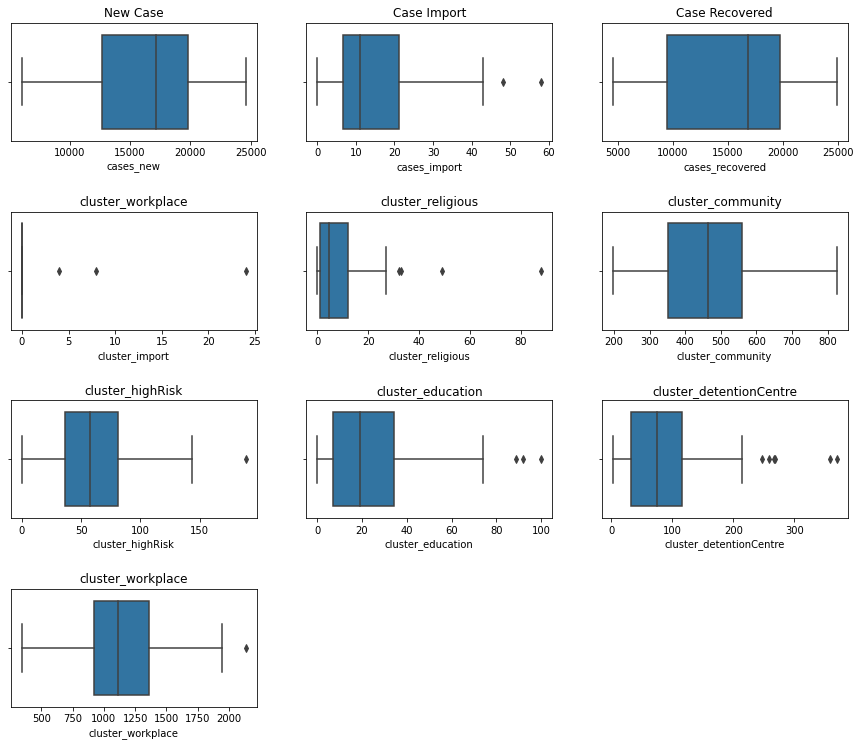

In [ ]:
fig, axes = plt.subplots(4, 3, figsize=(15, 5), sharey=True)
plt.subplots_adjust(left=None, bottom= 0.1, right=None, top=2, wspace=0.2, hspace=0.6)

sns.boxplot(data=malaysia_case_df,x=malaysia_case_df["cases_new"],ax=axes[0][0])
axes[0][0].set_title('New Case')

sns.boxplot(data=malaysia_case_df,x=malaysia_case_df["cases_import"],ax=axes[0][1])
axes[0][1].set_title('Case Import')

sns.boxplot(data=malaysia_case_df,x=malaysia_case_df["cases_recovered"],ax=axes[0][2])
axes[0][2].set_title('Case Recovered')

sns.boxplot(data=malaysia_case_df,x=malaysia_case_df["cluster_import"],ax=axes[1][0])
axes[1][0].set_title('cluster_workplace')

sns.boxplot(data=malaysia_case_df,x=malaysia_case_df["cluster_religious"],ax=axes[1][1])
axes[1][1].set_title('cluster_religious')

sns.boxplot(data=malaysia_case_df,x=malaysia_case_df["cluster_community"],ax=axes[1][2])
axes[1][2].set_title('cluster_community')

sns.boxplot(data=malaysia_case_df,x=malaysia_case_df["cluster_highRisk"],ax=axes[2][0])
axes[2][0].set_title('cluster_highRisk')

sns.boxplot(data=malaysia_case_df,x=malaysia_case_df["cluster_education"],ax=axes[2][1])
axes[2][1].set_title('cluster_education')

sns.boxplot(data=malaysia_case_df,x=malaysia_case_df["cluster_detentionCentre"],ax=axes[2][2])
axes[2][2].set_title('cluster_detentionCentre')

sns.boxplot(data=malaysia_case_df,x=malaysia_case_df["cluster_workplace"],ax=axes[3][0])
axes[3][0].set_title('cluster_workplace')

fig.delaxes(axes[3][1])
fig.delaxes(axes[3][2])

#### State Case Dataset  (MOH)

In [ ]:
state_case_df = pd.read_csv(state_case_dir)
after_start_date = state_case_df["date"] >= start_date
before_end_date = state_case_df["date"] <= end_date
between_two_dates = after_start_date & before_end_date
state_case_df = state_case_df.loc[between_two_dates]
state_case_df.head()

date            state  ...  cases_adult  cases_elderly
8368  2021-07-01            Johor  ...          210             15
8369  2021-07-01            Kedah  ...          171             20
8370  2021-07-01         Kelantan  ...           61              7
8371  2021-07-01           Melaka  ...          251             19
8372  2021-07-01  Negeri Sembilan  ...          362             49

[5 rows x 13 columns]

In [ ]:
state_case_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1472 entries, 8368 to 9839
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   date              1472 non-null   object
 1   state             1472 non-null   object
 2   cases_new         1472 non-null   int64 
 3   cases_import      1472 non-null   int64 
 4   cases_recovered   1472 non-null   int64 
 5   cases_active      1472 non-null   int64 
 6   cases_cluster     1472 non-null   int64 
 7   cases_pvax        1472 non-null   int64 
 8   cases_fvax        1472 non-null   int64 
 9   cases_child       1472 non-null   int64 
 10  cases_adolescent  1472 non-null   int64 
 11  cases_adult       1472 non-null   int64 
 12  cases_elderly     1472 non-null   int64 
dtypes: int64(11), object(2)
memory usage: 161.0+ KB


In [ ]:
state_case_df.describe()

cases_new  cases_import  ...  cases_adult  cases_elderly
count  1472.000000   1472.000000  ...  1472.000000     1472.00000
mean   1014.752717      0.925272  ...   681.723505       79.31250
std    1292.791075      3.372599  ...   903.526435       93.07024
min       0.000000      0.000000  ...     0.000000        0.00000
25%     213.250000      0.000000  ...   143.750000       15.75000
50%     629.000000      0.000000  ...   408.500000       46.00000
75%    1319.000000      0.000000  ...   856.500000      113.00000
max    8792.000000     55.000000  ...  6514.000000      617.00000

[8 rows x 11 columns]

In [ ]:
nRow, nCol = state_case_df.shape
print(f'There are {nRow} rows and {nCol} columns')


There are 1472 rows and 13 columns


In [ ]:
missing_values_df = state_case_df.isna().sum().to_frame()
missing_values_df.rename(columns = {0:'Count of Missing Values'}, inplace=True)
missing_values_df

Count of Missing Values
date                                    0
state                                   0
cases_new                               0
cases_import                            0
cases_recovered                         0
cases_active                            0
cases_cluster                           0
cases_pvax                              0
cases_fvax                              0
cases_child                             0
cases_adolescent                        0
cases_adult                             0
cases_elderly                           0

Text(0.5, 1.0, 'Recovered Case')

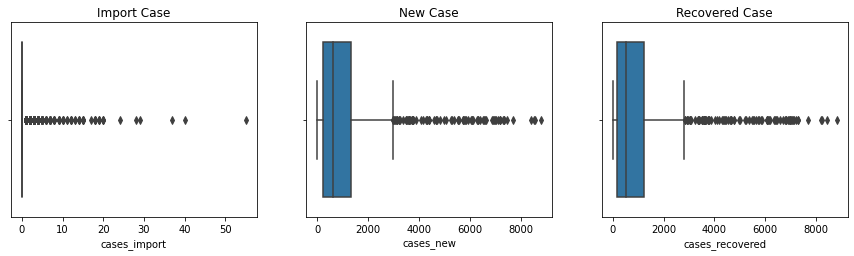

In [ ]:
fig, axes = plt.subplots(1, 3, figsize=(15, 3), sharey=True)
plt.subplots_adjust(left=None, bottom= 0.1, right=None, top=1, wspace=0.2, hspace=0.6)

sns.boxplot(data=state_case_df,x=state_case_df["cases_import"],ax=axes[0])
axes[0].set_title('Import Case')
sns.boxplot(data=state_case_df,x=state_case_df["cases_new"],ax=axes[1])
axes[1].set_title('New Case')
sns.boxplot(data=state_case_df,x=state_case_df["cases_recovered"],ax=axes[2])
axes[2].set_title('Recovered Case')

#### Clusters Dataset (MOH)

In [ ]:
clusters_df = pd.read_csv(clusters_dir)
after_start_date = clusters_df["date_announced"] >= start_date
before_end_date = clusters_df["date_announced"] <= end_date
between_two_dates = after_start_date & before_end_date
clusters_df = clusters_df.loc[between_two_dates]
clusters_df['date'] = clusters_df.date_announced
clusters_df.head()

cluster     state  ... recovered        date
2845  Kluster Industri Perusahaan Selesa Jaya  Selangor  ...        13  2021-07-01
2846                    Kluster Kampung Bagus  Kelantan  ...         8  2021-07-01
2847                  Kluster Taman SP Mahang  Kelantan  ...         8  2021-07-01
2848                Kluster Dah Tanjung Setol     Kedah  ...        31  2021-07-01
2849            Kluster Kampung Redang Gunong  Kelantan  ...        10  2021-07-01

[5 rows x 15 columns]

In [ ]:
clusters_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2632 entries, 2845 to 5476
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   cluster          2632 non-null   object
 1   state            2632 non-null   object
 2   district         2632 non-null   object
 3   date_announced   2632 non-null   object
 4   date_last_onset  2632 non-null   object
 5   category         2632 non-null   object
 6   status           2632 non-null   object
 7   cases_new        2632 non-null   int64 
 8   cases_total      2632 non-null   int64 
 9   cases_active     2632 non-null   int64 
 10  tests            2632 non-null   int64 
 11  icu              2632 non-null   int64 
 12  deaths           2632 non-null   int64 
 13  recovered        2632 non-null   int64 
 14  date             2632 non-null   object
dtypes: int64(7), object(8)
memory usage: 329.0+ KB


In [ ]:
clusters_df.describe()

cases_new  cases_total  ...       deaths    recovered
count  2632.000000  2632.000000  ...  2632.000000  2632.000000
mean      0.025836    71.213146  ...     0.346505    68.758739
std       0.884050   111.208160  ...     1.253196   107.388155
min       0.000000     5.000000  ...     0.000000     0.000000
25%       0.000000    20.000000  ...     0.000000    19.000000
50%       0.000000    38.000000  ...     0.000000    37.000000
75%       0.000000    79.000000  ...     0.000000    76.000000
max      44.000000  2041.000000  ...    25.000000  1952.000000

[8 rows x 7 columns]

In [ ]:
nRow, nCol = clusters_df.shape
print(f'There are {nRow} rows and {nCol} columns')


There are 2632 rows and 15 columns


In [ ]:
missing_values_df = clusters_df.isna().sum().to_frame()
missing_values_df.rename(columns = {0:'Count of Missing Values'}, inplace=True)
missing_values_df

Count of Missing Values
cluster                                0
state                                  0
district                               0
date_announced                         0
date_last_onset                        0
category                               0
status                                 0
cases_new                              0
cases_total                            0
cases_active                           0
tests                                  0
icu                                    0
deaths                                 0
recovered                              0
date                                   0

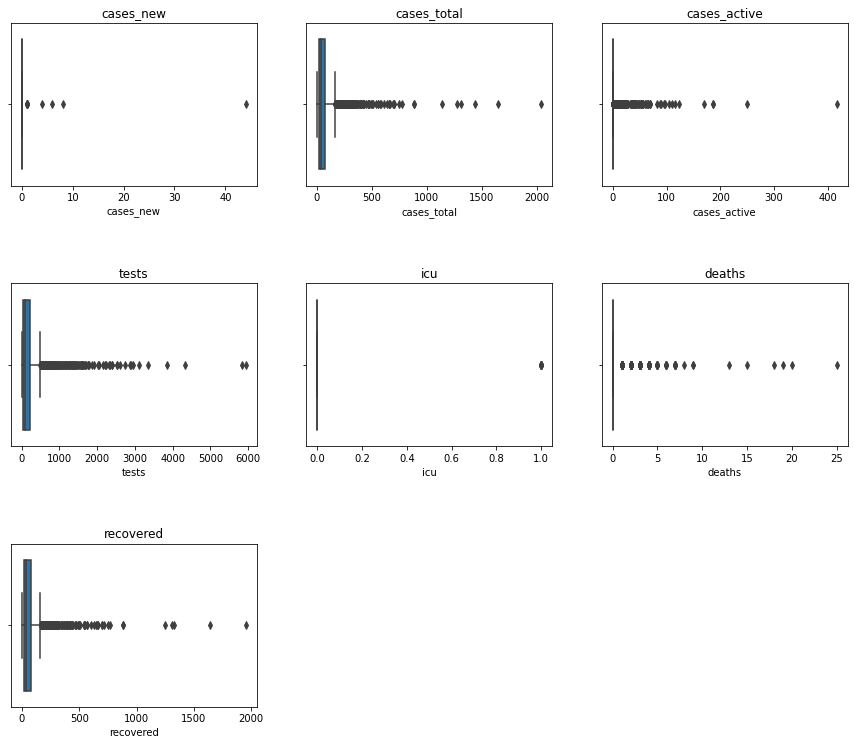

In [ ]:
fig, axes = plt.subplots(3, 3, figsize=(15, 5), sharey=True)
plt.subplots_adjust(left=None, bottom= 0.1, right=None, top=2, wspace=0.2, hspace=0.6)

sns.boxplot(data=clusters_df,x=clusters_df["cases_new"],ax=axes[0][0])
axes[0][0].set_title('cases_new')

sns.boxplot(data=clusters_df,x=clusters_df["cases_total"],ax=axes[0][1])
axes[0][1].set_title('cases_total')

sns.boxplot(data=clusters_df,x=clusters_df["cases_active"],ax=axes[0][2])
axes[0][2].set_title('cases_active')

sns.boxplot(data=clusters_df,x=clusters_df["tests"],ax=axes[1][0])
axes[1][0].set_title('tests')

sns.boxplot(data=clusters_df,x=clusters_df["icu"],ax=axes[1][1])
axes[1][1].set_title('icu')

sns.boxplot(data=clusters_df,x=clusters_df["deaths"],ax=axes[1][2])
axes[1][2].set_title('deaths')

sns.boxplot(data=clusters_df,x=clusters_df["recovered"],ax=axes[2][0])
axes[2][0].set_title('recovered')

fig.delaxes(axes[2][1])
fig.delaxes(axes[2][2])

#### Malaysia Tests Dataset (MOH)

In [ ]:
malaysia_tests_df = pd.read_csv(malaysia_tests_dir)
after_start_date = malaysia_tests_df["date"] >= start_date
before_end_date = malaysia_tests_df["date"] <= end_date
between_two_dates = after_start_date & before_end_date
malaysia_tests_df = malaysia_tests_df.loc[between_two_dates]
malaysia_tests_df.head()

date  rtk-ag    pcr
524  2021-07-01   43219  54811
525  2021-07-02   40860  55642
526  2021-07-03   30817  55023
527  2021-07-04   26064  42657
528  2021-07-05   44941  41819

In [ ]:
malaysia_tests_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 92 entries, 524 to 615
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   date    92 non-null     object
 1   rtk-ag  92 non-null     int64 
 2   pcr     92 non-null     int64 
dtypes: int64(2), object(1)
memory usage: 2.9+ KB


In [ ]:
malaysia_tests_df.describe()

rtk-ag           pcr
count      92.000000     92.000000
mean    73738.445652  64127.184783
std     20510.492231  13173.370793
min     26064.000000  35642.000000
25%     59343.000000  54791.250000
50%     76117.000000  65275.500000
75%     89112.750000  74325.500000
max    127625.000000  90293.000000

In [ ]:
nRow, nCol = malaysia_tests_df.shape
print(f'There are {nRow} rows and {nCol} columns')

There are 92 rows and 3 columns


In [ ]:
missing_values_df = malaysia_tests_df.isna().sum().to_frame()
missing_values_df.rename(columns = {0:'Count of Missing Values'}, inplace=True)
missing_values_df

Count of Missing Values
date                          0
rtk-ag                        0
pcr                           0

Text(0.5, 1.0, 'pcr')

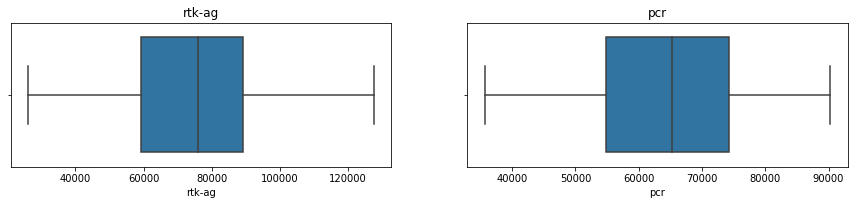

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(15, 5), sharey=True)
plt.subplots_adjust(left=None, bottom= 0.1, right=None, top=0.5, wspace=0.2, hspace=0.6)

sns.boxplot(data=malaysia_tests_df, x = malaysia_tests_df["rtk-ag"],ax=axes[0])
axes[0].set_title('rtk-ag')

sns.boxplot(data=malaysia_tests_df,x = malaysia_tests_df["pcr"],ax=axes[1])
axes[1].set_title('pcr')


#### State Tests Dataset (MOH)

In [ ]:
states_tests_df = pd.read_csv(states_tests_dir)
after_start_date = states_tests_df["date"] >= start_date
before_end_date = states_tests_df["date"] <= end_date
between_two_dates = after_start_date & before_end_date
states_tests_df = states_tests_df.loc[between_two_dates]
states_tests_df.head()

date            state  rtk-ag   pcr
0  2021-07-01            Johor    2749  3670
1  2021-07-01            Kedah    2073  1297
2  2021-07-01         Kelantan    1348  1966
3  2021-07-01           Melaka    1049  2132
4  2021-07-01  Negeri Sembilan    2151  3306

In [ ]:
states_tests_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1472 entries, 0 to 1471
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   date    1472 non-null   object
 1   state   1472 non-null   object
 2   rtk-ag  1472 non-null   int64 
 3   pcr     1472 non-null   int64 
dtypes: int64(2), object(2)
memory usage: 57.5+ KB


In [ ]:
states_tests_df.describe()

rtk-ag           pcr
count   1472.000000   1472.000000
mean    4608.652853   4007.949049
std     5938.037331   3965.451726
min        9.000000     13.000000
25%     1308.250000   1477.000000
50%     2799.500000   3005.500000
75%     5282.000000   4955.750000
max    41143.000000  23350.000000

In [ ]:
nRow, nCol = states_tests_df.shape
print(f'There are {nRow} rows and {nCol} columns')

There are 1472 rows and 4 columns


In [ ]:
missing_values_df = states_tests_df.isna().sum().to_frame()
missing_values_df.rename(columns = {0:'Count of Missing Values'}, inplace=True)
missing_values_df

Count of Missing Values
date                          0
state                         0
rtk-ag                        0
pcr                           0

Text(0.5, 1.0, 'pcr')

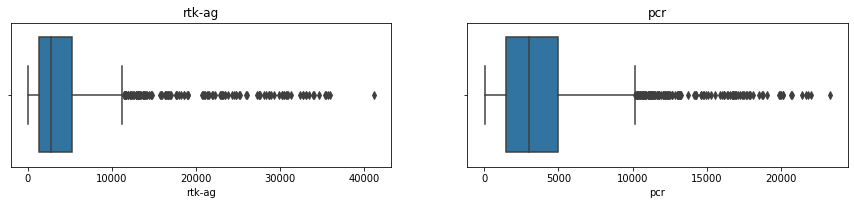

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(15, 5), sharey=True)
plt.subplots_adjust(left=None, bottom= 0.1, right=None, top=0.5, wspace=0.2, hspace=0.6)

sns.boxplot(data=states_tests_df, x = states_tests_df["rtk-ag"],ax=axes[0])
axes[0].set_title('rtk-ag')

sns.boxplot(data=states_tests_df,x = states_tests_df["pcr"],ax=axes[1])
axes[1].set_title('pcr')

#### PKRC Dataset  (MOH)

In [ ]:
pkrc_df = pd.read_csv(pkrc_dir)
after_start_date = pkrc_df["date"] >= start_date
before_end_date = pkrc_df["date"] <= end_date
between_two_dates = after_start_date & before_end_date
pkrc_df = pkrc_df.loc[between_two_dates]
pkrc_df.head()

date            state  beds  ...  pkrc_covid  pkrc_pui  pkrc_noncovid
5163  2021-07-01            Johor  2321  ...         964         0              0
5164  2021-07-01            Kedah   540  ...         348         0              0
5165  2021-07-01         Kelantan  2763  ...         638        73              0
5166  2021-07-01           Melaka  1662  ...         886         0              0
5167  2021-07-01  Negeri Sembilan  2395  ...        1248         0              0

[5 rows x 12 columns]

In [ ]:
pkrc_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1286 entries, 5163 to 6448
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   date             1286 non-null   object
 1   state            1286 non-null   object
 2   beds             1286 non-null   int64 
 3   admitted_pui     1286 non-null   int64 
 4   admitted_covid   1286 non-null   int64 
 5   admitted_total   1286 non-null   int64 
 6   discharge_pui    1286 non-null   int64 
 7   discharge_covid  1286 non-null   int64 
 8   discharge_total  1286 non-null   int64 
 9   pkrc_covid       1286 non-null   int64 
 10  pkrc_pui         1286 non-null   int64 
 11  pkrc_noncovid    1286 non-null   int64 
dtypes: int64(10), object(2)
memory usage: 130.6+ KB


In [ ]:
pkrc_df.describe()

beds  admitted_pui  ...     pkrc_pui  pkrc_noncovid
count   1286.000000   1286.000000  ...  1286.000000    1286.000000
mean    2678.828149      6.069207  ...    60.328927      10.816485
std     2131.159986     12.814293  ...   124.166061      37.835490
min      214.000000      0.000000  ...     0.000000       0.000000
25%     1330.000000      0.000000  ...     0.000000       0.000000
50%     2104.000000      1.000000  ...     6.000000       0.000000
75%     3441.000000      6.000000  ...    60.000000       0.000000
max    10413.000000    168.000000  ...   881.000000     316.000000

[8 rows x 10 columns]

In [ ]:
nRow, nCol = pkrc_df.shape
print(f'There are {nRow} rows and {nCol} columns')

There are 1286 rows and 12 columns


In [ ]:
missing_values_df = pkrc_df.isna().sum().to_frame()
missing_values_df.rename(columns = {0:'Count of Missing Values'}, inplace=True)
missing_values_df

Count of Missing Values
date                                   0
state                                  0
beds                                   0
admitted_pui                           0
admitted_covid                         0
admitted_total                         0
discharge_pui                          0
discharge_covid                        0
discharge_total                        0
pkrc_covid                             0
pkrc_pui                               0
pkrc_noncovid                          0

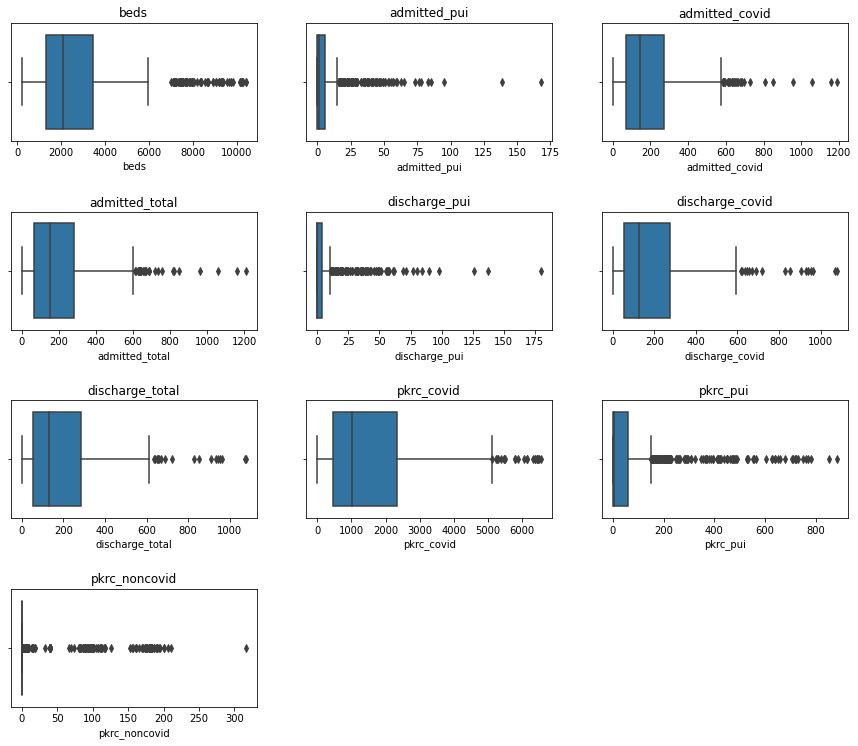

In [ ]:

fig, axes = plt.subplots(4, 3, figsize=(15, 5), sharey=True)
plt.subplots_adjust(left=None, bottom= 0.1, right=None, top=2, wspace=0.2, hspace=0.6)

sns.boxplot(data=pkrc_df, x = pkrc_df["beds"],ax=axes[0][0])
axes[0][0].set_title('beds')
sns.boxplot(data=pkrc_df,x = pkrc_df["admitted_pui"],ax=axes[0][1])
axes[0][1].set_title('admitted_pui')
sns.boxplot(data=pkrc_df, x = pkrc_df["admitted_covid"],ax=axes[0][2])
axes[0][2].set_title("admitted_covid")
sns.boxplot(data=pkrc_df,x = pkrc_df["admitted_total"],ax=axes[1][0])
axes[1][0].set_title('admitted_total')
sns.boxplot(data=pkrc_df, x = pkrc_df["discharge_pui"],ax=axes[1][1])
axes[1][1].set_title('discharge_pui')
sns.boxplot(data=pkrc_df,x = pkrc_df["discharge_covid"],ax=axes[1][2])
axes[1][2].set_title('discharge_covid')
sns.boxplot(data=pkrc_df, x = pkrc_df["discharge_total"],ax=axes[2][0])
axes[2][0].set_title('discharge_total')
sns.boxplot(data=pkrc_df,x = pkrc_df["pkrc_covid"],ax=axes[2][1])
axes[2][1].set_title('pkrc_covid')
sns.boxplot(data=pkrc_df, x = pkrc_df["pkrc_pui"],ax=axes[2][2])
axes[2][2].set_title('pkrc_pui')
sns.boxplot(data=pkrc_df,x = pkrc_df["pkrc_noncovid"],ax=axes[3][0])
axes[3][0].set_title('pkrc_noncovid')

fig.delaxes(axes[3][1])
fig.delaxes(axes[3][2])

#### Hospital Dataset  (MOH)

In [ ]:
hospital_df = pd.read_csv(hospital_dir)
after_start_date = hospital_df["date"] >= start_date
before_end_date = hospital_df["date"] <= end_date
between_two_dates = after_start_date & before_end_date
hospital_df = hospital_df.loc[between_two_dates]
hospital_df.head()

date            state  beds  ...  hosp_covid  hosp_pui  hosp_noncovid
7011  2021-07-01            Johor  5090  ...         732       233           3051
7012  2021-07-01            Kedah  2755  ...         338         2           1650
7013  2021-07-01         Kelantan  2737  ...         297        18           1439
7014  2021-07-01           Melaka  1101  ...         397        23            579
7015  2021-07-01  Negeri Sembilan  1431  ...         861        12            456

[5 rows x 14 columns]

In [ ]:
hospital_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1472 entries, 7011 to 8482
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   date              1472 non-null   object
 1   state             1472 non-null   object
 2   beds              1472 non-null   int64 
 3   beds_covid        1472 non-null   int64 
 4   beds_noncrit      1472 non-null   int64 
 5   admitted_pui      1472 non-null   int64 
 6   admitted_covid    1472 non-null   int64 
 7   admitted_total    1472 non-null   int64 
 8   discharged_pui    1472 non-null   int64 
 9   discharged_covid  1472 non-null   int64 
 10  discharged_total  1472 non-null   int64 
 11  hosp_covid        1472 non-null   int64 
 12  hosp_pui          1472 non-null   int64 
 13  hosp_noncovid     1472 non-null   int64 
dtypes: int64(12), object(2)
memory usage: 172.5+ KB


In [ ]:
hospital_df.describe()

beds   beds_covid  ...     hosp_pui  hosp_noncovid
count  1472.000000  1472.000000  ...  1472.000000    1472.000000
mean   2613.593750  1024.594429  ...    79.489130    1105.161005
std    1731.775145   922.800167  ...    95.865246     683.259633
min     122.000000    25.000000  ...     0.000000       1.000000
25%    1315.000000   485.250000  ...    16.000000     586.250000
50%    2457.000000   835.000000  ...    40.000000    1008.500000
75%    4037.000000  1170.500000  ...   101.250000    1555.500000
max    6568.000000  4713.000000  ...   445.000000    3069.000000

[8 rows x 12 columns]

In [ ]:
nRow, nCol = hospital_df.shape
print(f'There are {nRow} rows and {nCol} columns')

There are 1472 rows and 14 columns


In [ ]:
missing_values_df = hospital_df.isna().sum().to_frame()
missing_values_df.rename(columns = {0:'Count of Missing Values'}, inplace=True)
missing_values_df

Count of Missing Values
date                                    0
state                                   0
beds                                    0
beds_covid                              0
beds_noncrit                            0
admitted_pui                            0
admitted_covid                          0
admitted_total                          0
discharged_pui                          0
discharged_covid                        0
discharged_total                        0
hosp_covid                              0
hosp_pui                                0
hosp_noncovid                           0

Text(0.5, 1.0, 'hosp_noncovid')

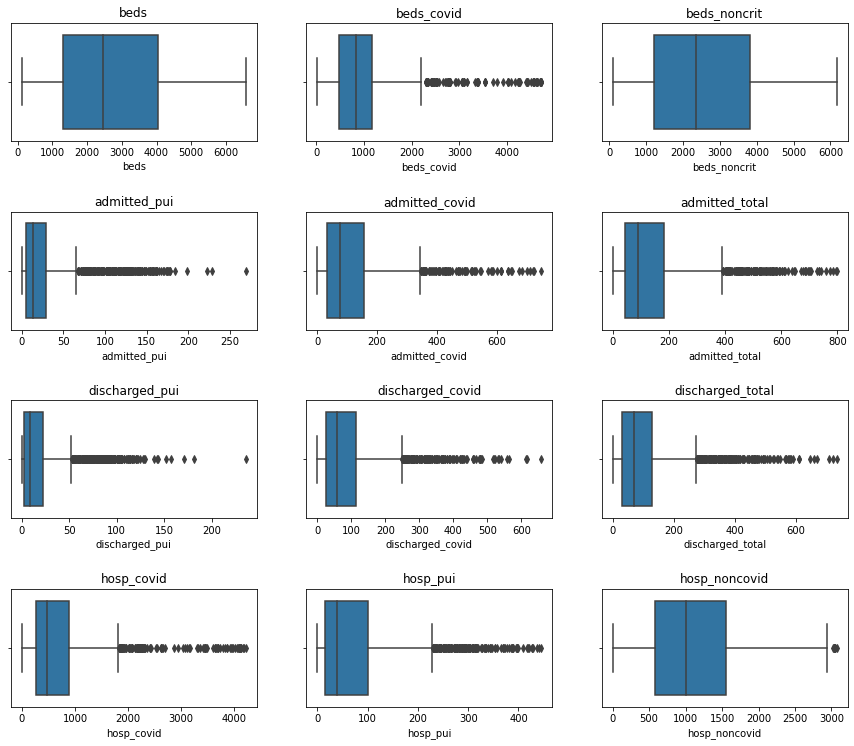

In [ ]:
fig, axes = plt.subplots(4, 3, figsize=(15, 5), sharey=True)
plt.subplots_adjust(left=None, bottom= 0.1, right=None, top=2, wspace=0.2, hspace=0.6)

sns.boxplot(data=hospital_df, x = hospital_df["beds"],ax=axes[0][0])
axes[0][0].set_title('beds')
sns.boxplot(data=hospital_df,x = hospital_df["beds_covid"],ax=axes[0][1])
axes[0][1].set_title('beds_covid')
sns.boxplot(data=hospital_df, x = hospital_df["beds_noncrit"],ax=axes[0][2])
axes[0][2].set_title('beds_noncrit')
sns.boxplot(data=hospital_df, x = hospital_df["admitted_pui"],ax=axes[1][0])
axes[1][0].set_title('admitted_pui')
sns.boxplot(data=hospital_df,x = hospital_df["admitted_covid"],ax=axes[1][1])
axes[1][1].set_title('admitted_covid')
sns.boxplot(data=hospital_df, x = hospital_df["admitted_total"],ax=axes[1][2])
axes[1][2].set_title('admitted_total')
sns.boxplot(data=hospital_df, x = hospital_df["discharged_pui"],ax=axes[2][0])
axes[2][0].set_title('discharged_pui')
sns.boxplot(data=hospital_df,x = hospital_df["discharged_covid"],ax=axes[2][1])
axes[2][1].set_title('discharged_covid')
sns.boxplot(data=hospital_df, x = hospital_df["discharged_total"],ax=axes[2][2])
axes[2][2].set_title('discharged_total')
sns.boxplot(data=hospital_df, x = hospital_df["hosp_covid"],ax=axes[3][0])
axes[3][0].set_title('hosp_covid')
sns.boxplot(data=hospital_df,x = hospital_df["hosp_pui"],ax=axes[3][1])
axes[3][1].set_title('hosp_pui')
sns.boxplot(data=hospital_df, x = hospital_df["hosp_noncovid"],ax=axes[3][2])
axes[3][2].set_title('hosp_noncovid')

#### ICU Dataset  (MOH)

In [ ]:
icu_df = pd.read_csv(icu_dir)
after_start_date = icu_df["date"] >= start_date
before_end_date = icu_df["date"] <= end_date
between_two_dates = after_start_date & before_end_date
icu_df = icu_df.loc[between_two_dates]
icu_df.head()

date            state  ...  vent_used  vent_port_used
7031  2021-07-01            Johor  ...        148               0
7032  2021-07-01            Kedah  ...        125               0
7033  2021-07-01         Kelantan  ...         85               0
7034  2021-07-01           Melaka  ...         31               0
7035  2021-07-01  Negeri Sembilan  ...         84               0

[5 rows x 16 columns]

In [ ]:
icu_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1472 entries, 7031 to 8502
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   date            1472 non-null   object
 1   state           1472 non-null   object
 2   beds_icu        1472 non-null   int64 
 3   beds_icu_rep    1472 non-null   int64 
 4   beds_icu_total  1472 non-null   int64 
 5   beds_icu_covid  1472 non-null   int64 
 6   vent            1472 non-null   int64 
 7   vent_port       1472 non-null   int64 
 8   icu_covid       1472 non-null   int64 
 9   icu_pui         1472 non-null   int64 
 10  icu_noncovid    1472 non-null   int64 
 11  vent_covid      1472 non-null   int64 
 12  vent_pui        1472 non-null   int64 
 13  vent_noncovid   1472 non-null   int64 
 14  vent_used       1472 non-null   int64 
 15  vent_port_used  1472 non-null   int64 
dtypes: int64(14), object(2)
memory usage: 195.5+ KB


In [ ]:
icu_df.describe()

beds_icu  beds_icu_rep  ...    vent_used  vent_port_used
count  1472.000000   1472.000000  ...  1472.000000     1472.000000
mean     63.558424     68.548913  ...    88.833560        7.129076
std      50.571156     50.454296  ...    73.555485       11.802461
min       5.000000      6.000000  ...     0.000000        0.000000
25%      29.000000     30.000000  ...    37.000000        0.000000
50%      53.000000     62.000000  ...    75.000000        0.000000
75%      88.000000     90.000000  ...   124.250000       12.000000
max     247.000000    227.000000  ...   402.000000       64.000000

[8 rows x 14 columns]

In [ ]:
nRow, nCol = icu_df.shape
print(f'There are {nRow} rows and {nCol} columns')

There are 1472 rows and 16 columns


In [ ]:
missing_values_df = icu_df.isna().sum().to_frame()
missing_values_df.rename(columns = {0:'Count of Missing Values'}, inplace=True)
missing_values_df

Count of Missing Values
date                                  0
state                                 0
beds_icu                              0
beds_icu_rep                          0
beds_icu_total                        0
beds_icu_covid                        0
vent                                  0
vent_port                             0
icu_covid                             0
icu_pui                               0
icu_noncovid                          0
vent_covid                            0
vent_pui                              0
vent_noncovid                         0
vent_used                             0
vent_port_used                        0

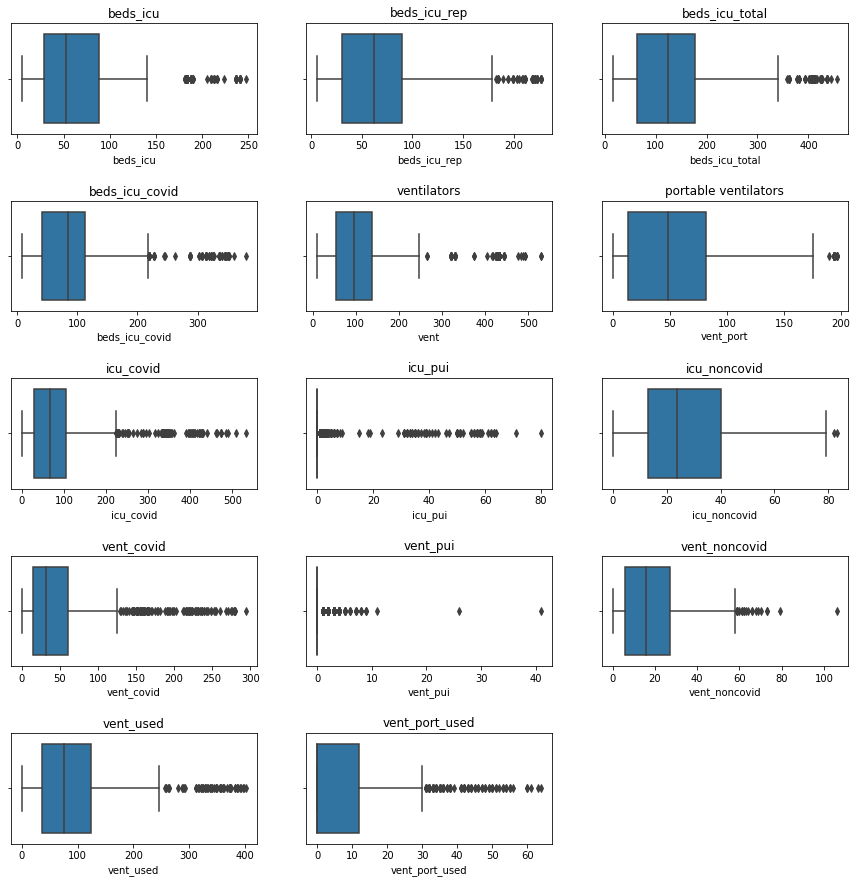

In [ ]:
fig, axes = plt.subplots(5, 3, figsize=(15, 6), sharey=True)
plt.subplots_adjust(left=None, bottom= 0.1, right=None, top=2, wspace=0.2, hspace=0.6)

sns.boxplot(data=icu_df, x = icu_df["beds_icu"],ax=axes[0][0])
axes[0][0].set_title('beds_icu')
sns.boxplot(data=icu_df,x = icu_df["beds_icu_rep"],ax=axes[0][1])
axes[0][1].set_title('beds_icu_rep')
sns.boxplot(data=icu_df, x = icu_df["beds_icu_total"],ax=axes[0][2])
axes[0][2].set_title('beds_icu_total')
sns.boxplot(data=icu_df, x = icu_df["beds_icu_covid"],ax=axes[1][0])
axes[1][0].set_title('beds_icu_covid')
sns.boxplot(data=icu_df,x = icu_df["vent"],ax=axes[1][1])
axes[1][1].set_title('ventilators')
sns.boxplot(data=icu_df, x = icu_df["vent_port"],ax=axes[1][2])
axes[1][2].set_title('portable ventilators')
sns.boxplot(data=icu_df, x = icu_df["icu_covid"],ax=axes[2][0])
axes[2][0].set_title('icu_covid')
sns.boxplot(data=icu_df,x = icu_df["icu_pui"],ax=axes[2][1])
axes[2][1].set_title('icu_pui')
sns.boxplot(data=icu_df, x = icu_df["icu_noncovid"],ax=axes[2][2])
axes[2][2].set_title('icu_noncovid')
sns.boxplot(data=icu_df, x = icu_df["vent_covid"],ax=axes[3][0])
axes[3][0].set_title('vent_covid')
sns.boxplot(data=icu_df,x = icu_df["vent_pui"],ax=axes[3][1])
axes[3][1].set_title('vent_pui')
sns.boxplot(data=icu_df, x = icu_df["vent_noncovid"],ax=axes[3][2])
axes[3][2].set_title('vent_noncovid')
sns.boxplot(data=icu_df, x = icu_df["vent_used"],ax=axes[4][0])
axes[4][0].set_title('vent_used')
sns.boxplot(data=icu_df,x = icu_df["vent_port_used"],ax=axes[4][1])
axes[4][1].set_title('vent_port_used')

fig.delaxes(axes[4][2])

#### Malaysia Death Dataset (MOH)

In [ ]:
malaysia_death_df = pd.read_csv(state_death_dir)
after_start_date = malaysia_death_df["date"] >= start_date
before_end_date = malaysia_death_df["date"] <= end_date
between_two_dates = after_start_date & before_end_date
malaysia_death_df = malaysia_death_df.loc[between_two_dates]
malaysia_death_df.head()

date            state  ...  deaths_fvax  deaths_tat
7536  2021-07-01            Johor  ...            1           1
7537  2021-07-01            Kedah  ...            0           0
7538  2021-07-01         Kelantan  ...            0           0
7539  2021-07-01           Melaka  ...            0           1
7540  2021-07-01  Negeri Sembilan  ...            0           1

[5 rows x 9 columns]

In [ ]:
malaysia_death_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1472 entries, 7536 to 9007
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   date            1472 non-null   object
 1   state           1472 non-null   object
 2   deaths_new      1472 non-null   int64 
 3   deaths_bid      1472 non-null   int64 
 4   deaths_new_dod  1472 non-null   int64 
 5   deaths_bid_dod  1472 non-null   int64 
 6   deaths_pvax     1472 non-null   int64 
 7   deaths_fvax     1472 non-null   int64 
 8   deaths_tat      1472 non-null   int64 
dtypes: int64(7), object(2)
memory usage: 115.0+ KB


In [ ]:
malaysia_death_df.describe()

deaths_new   deaths_bid  ...  deaths_fvax   deaths_tat
count  1472.000000  1472.000000  ...  1472.000000  1472.000000
mean     14.378397     3.146060  ...     1.511549     4.346467
std      25.942784     7.944043  ...     2.532159     9.909012
min       0.000000     0.000000  ...     0.000000     0.000000
25%       1.000000     0.000000  ...     0.000000     1.000000
50%       5.000000     0.000000  ...     0.000000     2.000000
75%      16.000000     2.250000  ...     2.000000     3.000000
max     359.000000    84.000000  ...    17.000000   175.000000

[8 rows x 7 columns]

In [ ]:
nRow, nCol = malaysia_death_df.shape
print(f'There are {nRow} rows and {nCol} columns')

There are 1472 rows and 9 columns


In [ ]:
missing_values_df = malaysia_death_df.isna().sum().to_frame()
missing_values_df.rename(columns = {0:'Count of Missing Values'}, inplace=True)
missing_values_df

Count of Missing Values
date                                  0
state                                 0
deaths_new                            0
deaths_bid                            0
deaths_new_dod                        0
deaths_bid_dod                        0
deaths_pvax                           0
deaths_fvax                           0
deaths_tat                            0

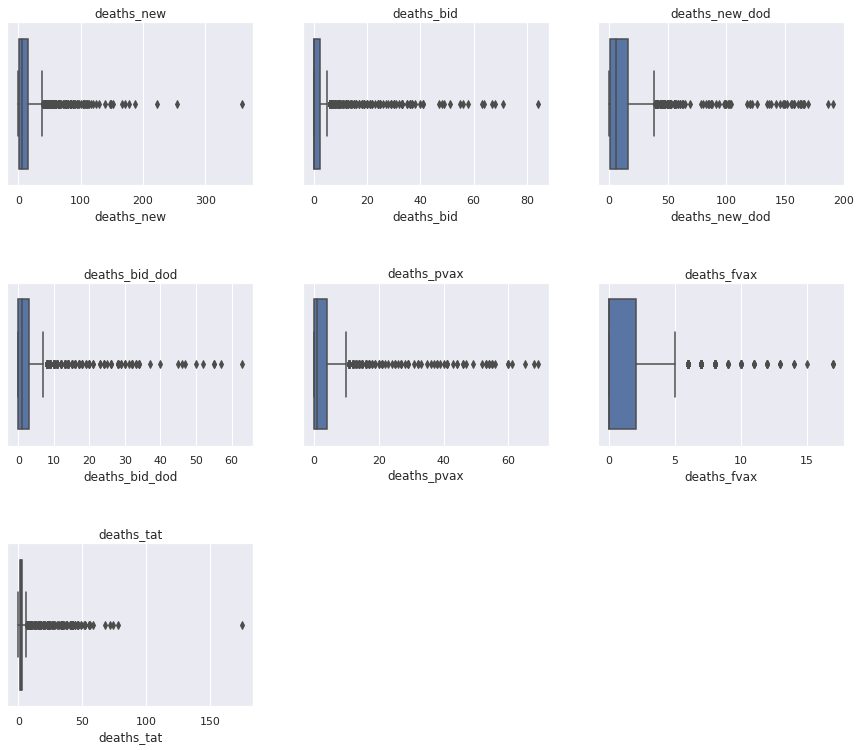

In [ ]:
fig, axes = plt.subplots(3, 3, figsize=(15, 5), sharey=True)
plt.subplots_adjust(left=None, bottom= 0.1, right=None, top=2, wspace=0.2, hspace=0.6)

sns.boxplot(data=malaysia_death_df, x = malaysia_death_df["deaths_new"],ax=axes[0][0])
axes[0][0].set_title('deaths_new')
sns.boxplot(data=malaysia_death_df,x = malaysia_death_df["deaths_bid"],ax=axes[0][1])
axes[0][1].set_title('deaths_bid')
sns.boxplot(data=malaysia_death_df, x = malaysia_death_df["deaths_new_dod"],ax=axes[0][2])
axes[0][2].set_title('deaths_new_dod')
sns.boxplot(data=malaysia_death_df, x = malaysia_death_df["deaths_bid_dod"],ax=axes[1][0])
axes[1][0].set_title('deaths_bid_dod')
sns.boxplot(data=malaysia_death_df,x = malaysia_death_df["deaths_pvax"],ax=axes[1][1])
axes[1][1].set_title('deaths_pvax')
sns.boxplot(data=malaysia_death_df, x = malaysia_death_df["deaths_fvax"],ax=axes[1][2])
axes[1][2].set_title('deaths_fvax')
sns.boxplot(data=malaysia_death_df, x = malaysia_death_df["deaths_tat"],ax=axes[2][0])
axes[2][0].set_title('deaths_tat')

fig.delaxes(axes[2][1])
fig.delaxes(axes[2][2])

#### State Death Dataset  (MOH)

In [ ]:
state_death_df = pd.read_csv(state_death_dir)
after_start_date = state_death_df["date"] >= start_date
before_end_date = state_death_df["date"] <= end_date
between_two_dates = after_start_date & before_end_date
state_death_df = state_death_df.loc[between_two_dates]
state_death_df.head()


date            state  ...  deaths_fvax  deaths_tat
7536  2021-07-01            Johor  ...            1           1
7537  2021-07-01            Kedah  ...            0           0
7538  2021-07-01         Kelantan  ...            0           0
7539  2021-07-01           Melaka  ...            0           1
7540  2021-07-01  Negeri Sembilan  ...            0           1

[5 rows x 9 columns]

In [ ]:
state_death_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1472 entries, 7536 to 9007
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   date            1472 non-null   object
 1   state           1472 non-null   object
 2   deaths_new      1472 non-null   int64 
 3   deaths_bid      1472 non-null   int64 
 4   deaths_new_dod  1472 non-null   int64 
 5   deaths_bid_dod  1472 non-null   int64 
 6   deaths_pvax     1472 non-null   int64 
 7   deaths_fvax     1472 non-null   int64 
 8   deaths_tat      1472 non-null   int64 
dtypes: int64(7), object(2)
memory usage: 115.0+ KB


In [ ]:
state_death_df.describe()

deaths_new   deaths_bid  ...  deaths_fvax   deaths_tat
count  1472.000000  1472.000000  ...  1472.000000  1472.000000
mean     14.378397     3.146060  ...     1.511549     4.346467
std      25.942784     7.944043  ...     2.532159     9.909012
min       0.000000     0.000000  ...     0.000000     0.000000
25%       1.000000     0.000000  ...     0.000000     1.000000
50%       5.000000     0.000000  ...     0.000000     2.000000
75%      16.000000     2.250000  ...     2.000000     3.000000
max     359.000000    84.000000  ...    17.000000   175.000000

[8 rows x 7 columns]

In [ ]:
nRow, nCol = state_death_df.shape
print(f'There are {nRow} rows and {nCol} columns')

There are 1472 rows and 9 columns


In [ ]:
missing_values_df = state_death_df.isna().sum().to_frame()
missing_values_df.rename(columns = {0:'Count of Missing Values'}, inplace=True)
missing_values_df

Count of Missing Values
date                                  0
state                                 0
deaths_new                            0
deaths_bid                            0
deaths_new_dod                        0
deaths_bid_dod                        0
deaths_pvax                           0
deaths_fvax                           0
deaths_tat                            0

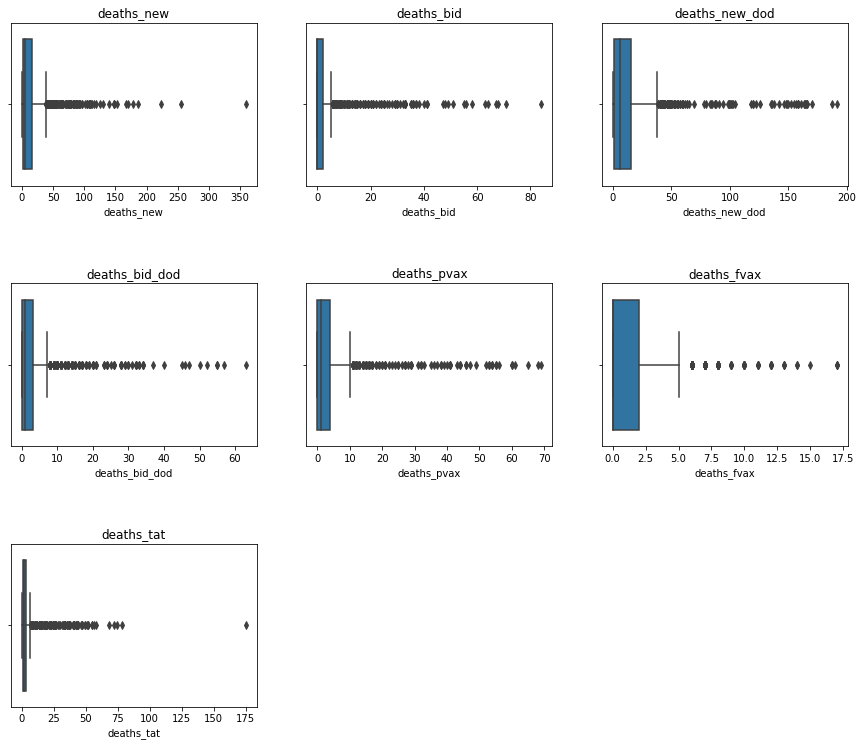

In [ ]:

fig, axes = plt.subplots(3, 3, figsize=(15, 5), sharey=True)
plt.subplots_adjust(left=None, bottom= 0.1, right=None, top=2, wspace=0.2, hspace=0.6)

sns.boxplot(data=state_death_df, x = state_death_df["deaths_new"],ax=axes[0][0])
axes[0][0].set_title('deaths_new')
sns.boxplot(data=state_death_df,x = state_death_df["deaths_bid"],ax=axes[0][1])
axes[0][1].set_title('deaths_bid')
sns.boxplot(data=state_death_df, x = state_death_df["deaths_new_dod"],ax=axes[0][2])
axes[0][2].set_title('deaths_new_dod')
sns.boxplot(data=state_death_df, x = state_death_df["deaths_bid_dod"],ax=axes[1][0])
axes[1][0].set_title('deaths_bid_dod')
sns.boxplot(data=state_death_df,x = state_death_df["deaths_pvax"],ax=axes[1][1])
axes[1][1].set_title('deaths_pvax')
sns.boxplot(data=state_death_df, x = state_death_df["deaths_fvax"],ax=axes[1][2])
axes[1][2].set_title('deaths_fvax')
sns.boxplot(data=state_death_df, x = state_death_df["deaths_tat"],ax=axes[2][0])
axes[2][0].set_title('deaths_tat')

fig.delaxes(axes[2][1])
fig.delaxes(axes[2][2])

#### Vaccination-Adverse Event Following Immunisation (AEFI) Dataset (MOH)

In [ ]:
vax_aefi_df = pd.read_csv(vax_aefi_dir)

In [ ]:
vax_aefi_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 606 entries, 0 to 605
Data columns (total 32 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   date                         606 non-null    object
 1   vaxtype                      606 non-null    object
 2   daily_total                  606 non-null    int64 
 3   daily_serious_npra           606 non-null    int64 
 4   daily_nonserious             606 non-null    int64 
 5   daily_nonserious_npra        606 non-null    int64 
 6   daily_nonserious_mysj_dose1  606 non-null    int64 
 7   daily_nonserious_mysj_dose2  606 non-null    int64 
 8   d1_site_pain                 606 non-null    int64 
 9   d1_site_swelling             606 non-null    int64 
 10  d1_site_redness              606 non-null    int64 
 11  d1_tiredness                 606 non-null    int64 
 12  d1_headache                  606 non-null    int64 
 13  d1_muscle_pain               606 no

In [ ]:
vax_aefi_df.describe()

daily_total  daily_serious_npra  ...   d2_chills     d2_rash
count   606.000000          606.000000  ...  606.000000  606.000000
mean   1615.062706            2.387789  ...   11.287129    3.782178
std    1637.957960            2.977011  ...   24.014047    8.717916
min       0.000000            0.000000  ...    0.000000    0.000000
25%     264.000000            0.000000  ...    0.000000    0.000000
50%    1163.500000            1.000000  ...    3.000000    1.000000
75%    2447.250000            4.000000  ...   10.000000    3.000000
max    8905.000000           21.000000  ...  199.000000   88.000000

[8 rows x 30 columns]

In [ ]:
nRow, nCol = vax_aefi_df.shape
print(f'There are {nRow} rows and {nCol} columns')

There are 606 rows and 32 columns


In [ ]:
missing_values_df = vax_aefi_df.isna().sum().to_frame()
missing_values_df.rename(columns = {0:'Count of Missing Values'}, inplace=True)
missing_values_df

Count of Missing Values
date                                               0
vaxtype                                            0
daily_total                                        0
daily_serious_npra                                 0
daily_nonserious                                   0
daily_nonserious_npra                              0
daily_nonserious_mysj_dose1                        0
daily_nonserious_mysj_dose2                        0
d1_site_pain                                       0
d1_site_swelling                                   0
d1_site_redness                                    0
d1_tiredness                                       0
d1_headache                                        0
d1_muscle_pain                                     0
d1_joint_pain                                      0
d1_weakness                                        0
d1_fever                                           0
d1_vomiting                                        0
d1_chills                                          0
d1_rash                                            0
d2_site_pain                                       0
d2_site_swelling                                   0
d2_site_redness                                    0
d2_tiredness                                       0
d2_headache                                        0
d2_muscle_pain                                     0
d2_joint_pain                                      0
d2_weakness                                        0
d2_fever                                           0
d2_vomiting                                        0
d2_chills                                          0
d2_rash                                            0

Text(0.5, 1.0, 'd2_rash')

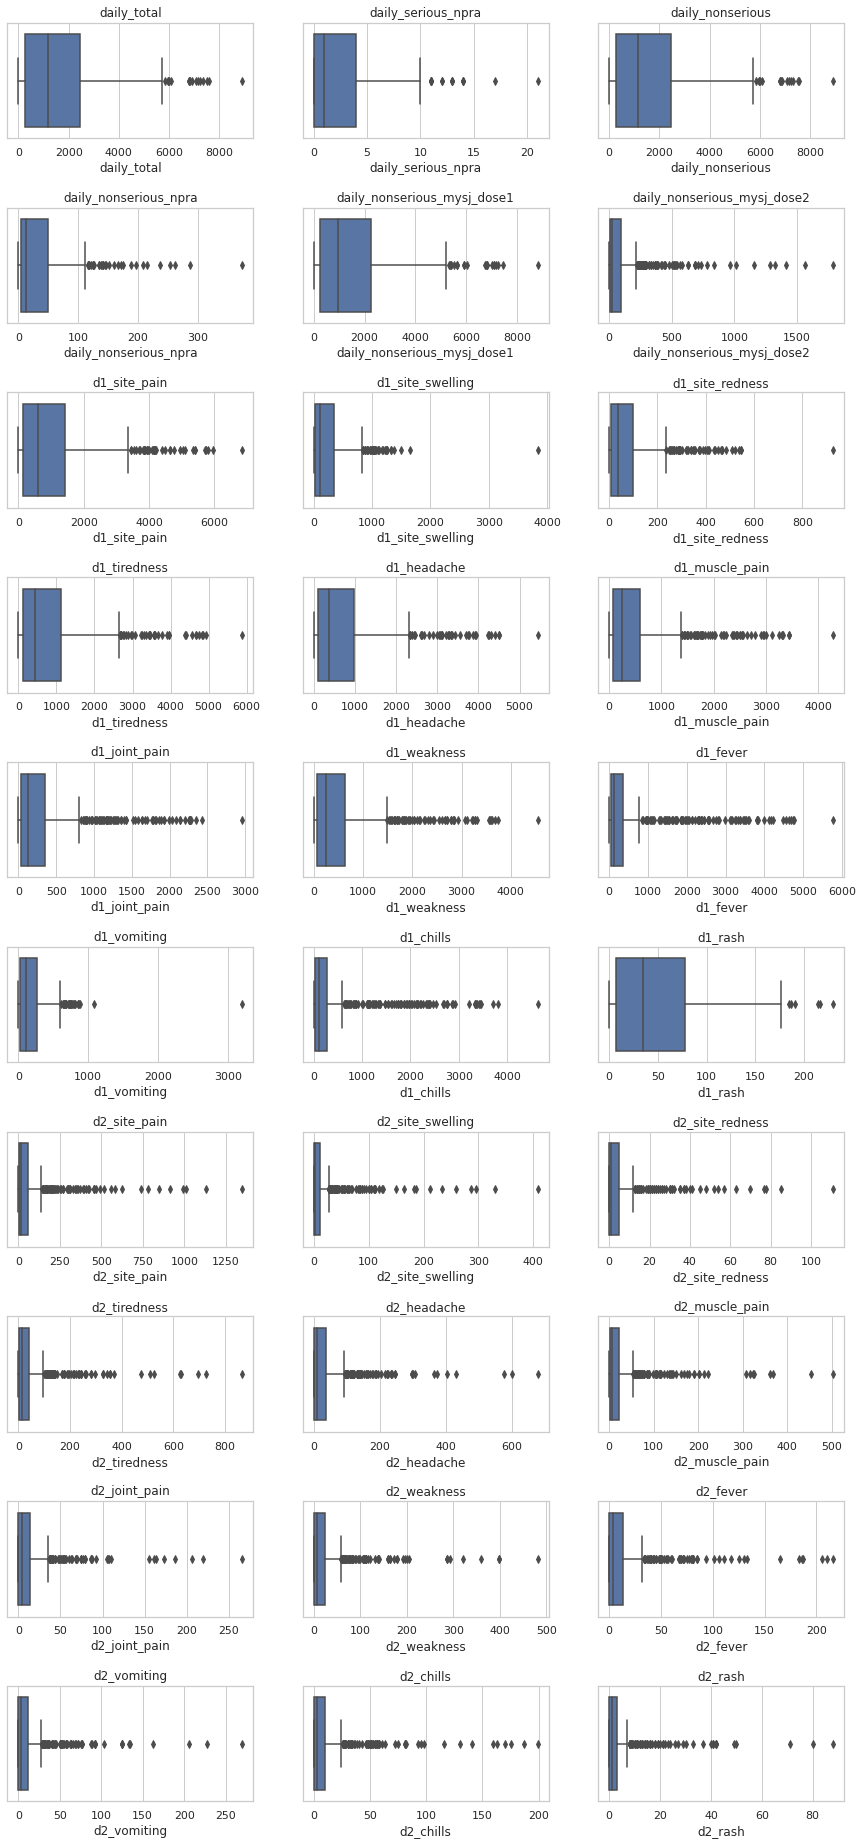

In [ ]:
fig, axes = plt.subplots(10, 3, figsize=(15, 13), sharey=True)
plt.subplots_adjust(left=None, bottom= 0.1, right=None, top=2, wspace=0.2, hspace=0.6)
# daily_total	daily_serious_npra	daily_nonserious	daily_nonserious_npra	daily_nonserious_mysj_dose1	daily_nonserious_mysj_dose2	
# d1_site_pain	d1_site_swelling	d1_site_redness	d1_tiredness	d1_headache	d1_muscle_pain	d1_joint_pain	d1_weakness	d1_fever	d1_vomiting	d1_chills	d1_rash	
# d2_site_pain	d2_site_swelling	d2_site_redness	d2_tiredness	d2_headache	d2_muscle_pain	d2_joint_pain	d2_weakness	d2_fever	d2_vomiting	d2_chills	d2_rash
sns.boxplot(data=vax_aefi_df, x = vax_aefi_df["daily_total"],ax=axes[0][0])
axes[0][0].set_title('daily_total')
sns.boxplot(data=vax_aefi_df,x = vax_aefi_df["daily_serious_npra"],ax=axes[0][1])
axes[0][1].set_title('daily_serious_npra')
sns.boxplot(data=vax_aefi_df, x = vax_aefi_df["daily_nonserious"],ax=axes[0][2])
axes[0][2].set_title('daily_nonserious')
sns.boxplot(data=vax_aefi_df, x = vax_aefi_df["daily_nonserious_npra"],ax=axes[1][0])
axes[1][0].set_title('daily_nonserious_npra')
sns.boxplot(data=vax_aefi_df,x = vax_aefi_df["daily_nonserious_mysj_dose1"],ax=axes[1][1])
axes[1][1].set_title('daily_nonserious_mysj_dose1')
sns.boxplot(data=vax_aefi_df, x = vax_aefi_df["daily_nonserious_mysj_dose2"],ax=axes[1][2])
axes[1][2].set_title('daily_nonserious_mysj_dose2')
sns.boxplot(data=vax_aefi_df, x = vax_aefi_df["d1_site_pain"],ax=axes[2][0])
axes[2][0].set_title('d1_site_pain')
sns.boxplot(data=vax_aefi_df,x = vax_aefi_df["d1_site_swelling"],ax=axes[2][1])
axes[2][1].set_title('d1_site_swelling')
sns.boxplot(data=vax_aefi_df, x = vax_aefi_df["d1_site_redness"],ax=axes[2][2])
axes[2][2].set_title('d1_site_redness')
sns.boxplot(data=vax_aefi_df, x = vax_aefi_df["d1_tiredness"],ax=axes[3][0])
axes[3][0].set_title('d1_tiredness')
sns.boxplot(data=vax_aefi_df,x = vax_aefi_df["d1_headache"],ax=axes[3][1])
axes[3][1].set_title('d1_headache')
sns.boxplot(data=vax_aefi_df, x = vax_aefi_df["d1_muscle_pain"],ax=axes[3][2])
axes[3][2].set_title('d1_muscle_pain')
sns.boxplot(data=vax_aefi_df, x = vax_aefi_df["d1_joint_pain"],ax=axes[4][0])
axes[4][0].set_title('d1_joint_pain')
sns.boxplot(data=vax_aefi_df,x = vax_aefi_df["d1_weakness"],ax=axes[4][1])
axes[4][1].set_title('d1_weakness')
sns.boxplot(data=vax_aefi_df, x = vax_aefi_df["d1_fever"],ax=axes[4][2])
axes[4][2].set_title('d1_fever')
sns.boxplot(data=vax_aefi_df, x = vax_aefi_df["d1_vomiting"],ax=axes[5][0])
axes[5][0].set_title('d1_vomiting')
sns.boxplot(data=vax_aefi_df,x = vax_aefi_df["d1_chills"],ax=axes[5][1])
axes[5][1].set_title('d1_chills')
sns.boxplot(data=vax_aefi_df, x = vax_aefi_df["d1_rash"],ax=axes[5][2])
axes[5][2].set_title('d1_rash')
sns.boxplot(data=vax_aefi_df, x = vax_aefi_df["d2_site_pain"],ax=axes[6][0])
axes[6][0].set_title('d2_site_pain')
sns.boxplot(data=vax_aefi_df,x = vax_aefi_df["d2_site_swelling"],ax=axes[6][1])
axes[6][1].set_title('d2_site_swelling')
sns.boxplot(data=vax_aefi_df, x = vax_aefi_df["d2_site_redness"],ax=axes[6][2])
axes[6][2].set_title('d2_site_redness')
sns.boxplot(data=vax_aefi_df, x = vax_aefi_df["d2_tiredness"],ax=axes[7][0])
axes[7][0].set_title('d2_tiredness')
sns.boxplot(data=vax_aefi_df,x = vax_aefi_df["d2_headache"],ax=axes[7][1])
axes[7][1].set_title('d2_headache')
sns.boxplot(data=vax_aefi_df, x = vax_aefi_df["d2_muscle_pain"],ax=axes[7][2])
axes[7][2].set_title('d2_muscle_pain')
sns.boxplot(data=vax_aefi_df, x = vax_aefi_df["d2_joint_pain"],ax=axes[8][0])
axes[8][0].set_title('d2_joint_pain')
sns.boxplot(data=vax_aefi_df,x = vax_aefi_df["d2_weakness"],ax=axes[8][1])
axes[8][1].set_title('d2_weakness')
sns.boxplot(data=vax_aefi_df, x = vax_aefi_df["d2_fever"],ax=axes[8][2])
axes[8][2].set_title('d2_fever')
sns.boxplot(data=vax_aefi_df, x = vax_aefi_df["d2_vomiting"],ax=axes[9][0])
axes[9][0].set_title('d2_vomiting')
sns.boxplot(data=vax_aefi_df,x = vax_aefi_df["d2_chills"],ax=axes[9][1])
axes[9][1].set_title('d2_chills')
sns.boxplot(data=vax_aefi_df, x = vax_aefi_df["d2_rash"],ax=axes[9][2])
axes[9][2].set_title('d2_rash')


#### CheckIn Dataset  (MOH)

In [ ]:
checkIn_df = pd.read_csv(checkIn_dir)
after_start_date = checkIn_df["date"] >= start_date
before_end_date = checkIn_df["date"] <= end_date
between_two_dates = after_start_date & before_end_date
checkIn_df = checkIn_df.loc[between_two_dates]
checkIn_df.head()

date            state  checkins  unique_ind  unique_loc
3392  2021-07-01            Johor   2093025     1046923       80161
3393  2021-07-01            Kedah    764979      423792       35235
3394  2021-07-01         Kelantan    302379      172269       21977
3395  2021-07-01           Melaka    490636      257934       20042
3396  2021-07-01  Negeri Sembilan    596917      314375       22793

In [ ]:
checkIn_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1472 entries, 3392 to 4863
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   date        1472 non-null   object
 1   state       1472 non-null   object
 2   checkins    1472 non-null   int64 
 3   unique_ind  1472 non-null   int64 
 4   unique_loc  1472 non-null   int64 
dtypes: int64(3), object(2)
memory usage: 69.0+ KB


In [ ]:
checkIn_df.describe()

checkins    unique_ind     unique_loc
count  1.472000e+03  1.472000e+03    1472.000000
mean   1.248161e+06  6.014325e+05   41020.016984
std    1.265140e+06  6.147211e+05   34624.528477
min    2.741600e+04  1.532600e+04     779.000000
25%    3.472105e+05  1.903275e+05   19702.750000
50%    7.948835e+05  4.135215e+05   33082.500000
75%    1.585620e+06  6.670960e+05   55098.500000
max    6.930122e+06  3.108472e+06  182243.000000

In [ ]:
nRow, nCol = checkIn_df.shape
print(f'There are {nRow} rows and {nCol} columns')

There are 1472 rows and 5 columns


In [ ]:
missing_values_df = checkIn_df.isna().sum().to_frame()
missing_values_df.rename(columns = {0:'Count of Missing Values'}, inplace=True)
missing_values_df

Count of Missing Values
date                              0
state                             0
checkins                          0
unique_ind                        0
unique_loc                        0

Text(0.5, 1.0, 'unique_loc')

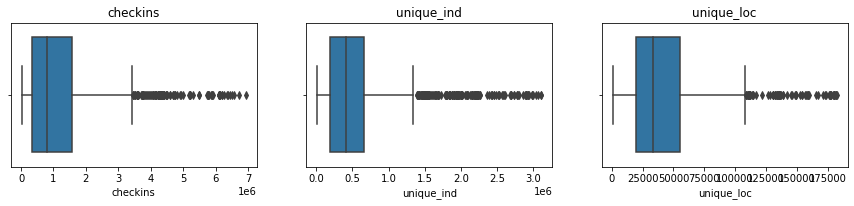

In [ ]:
fig, axes = plt.subplots(1, 3, figsize=(15, 5), sharey=True)
plt.subplots_adjust(left=None, bottom= 0.1, right=None, top=0.5, wspace=0.2, hspace=0.6)

sns.boxplot(data=checkIn_df, x = checkIn_df["checkins"],ax=axes[0])
axes[0].set_title('checkins')
sns.boxplot(data=checkIn_df,x = checkIn_df["unique_ind"],ax=axes[1])
axes[1].set_title('unique_ind')
sns.boxplot(data=checkIn_df, x = checkIn_df["unique_loc"],ax=axes[2])
axes[2].set_title('unique_loc')

#### Malaysia Vaccination Dataset  (CITF)

In [ ]:
malaysia_vaccination_df = pd.read_csv(malaysia_vaccination_dir)
after_start_date = malaysia_vaccination_df["date"] >= start_date
before_end_date = malaysia_vaccination_df["date"] <= end_date
between_two_dates = after_start_date & before_end_date
malaysia_vaccination_df = malaysia_vaccination_df.loc[between_two_dates]
malaysia_vaccination_df.head()

date  daily_partial  daily_full  ...  astra2  cansino  pending
127  2021-07-01         183388       86441  ...      11        0        6
128  2021-07-02         169999       70548  ...      15        0        2
129  2021-07-03         144632       78992  ...       7        0        2
130  2021-07-04         134914       80440  ...       6        0        0
131  2021-07-05         206358      120497  ...     699        0        5

[5 rows x 21 columns]

In [ ]:
malaysia_vaccination_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 92 entries, 127 to 218
Data columns (total 21 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   date                 92 non-null     object
 1   daily_partial        92 non-null     int64 
 2   daily_full           92 non-null     int64 
 3   daily                92 non-null     int64 
 4   daily_partial_child  92 non-null     int64 
 5   daily_full_child     92 non-null     int64 
 6   daily_booster        92 non-null     int64 
 7   cumul_partial        92 non-null     int64 
 8   cumul_full           92 non-null     int64 
 9   cumul                92 non-null     int64 
 10  cumul_partial_child  92 non-null     int64 
 11  cumul_full_child     92 non-null     int64 
 12  cumul_booster        92 non-null     int64 
 13  pfizer1              92 non-null     int64 
 14  pfizer2              92 non-null     int64 
 15  sinovac1             92 non-null     int64 
 16  sinovac

In [ ]:
malaysia_vaccination_df.describe()

daily_partial     daily_full  ...      cansino     pending
count      92.000000      92.000000  ...    92.000000   92.000000
mean   194870.445652  199702.369565  ...  1459.641304   46.576087
std     75774.191337   67155.036589  ...  2198.434231  113.710857
min     64296.000000   70548.000000  ...     0.000000    0.000000
25%    144095.250000  159090.250000  ...     0.000000    4.000000
50%    183549.000000  189949.500000  ...     0.000000   13.000000
75%    237986.000000  241025.750000  ...  2610.750000   41.000000
max    374548.000000  363748.000000  ...  7593.000000  964.000000

[8 rows x 20 columns]

In [ ]:
nRow, nCol = malaysia_vaccination_df.shape
print(f'There are {nRow} rows and {nCol} columns')

There are 92 rows and 21 columns


In [ ]:
missing_values_df = malaysia_vaccination_df.isna().sum().to_frame()
missing_values_df.rename(columns = {0:'Count of Missing Values'}, inplace=True)
missing_values_df

Count of Missing Values
date                                       0
daily_partial                              0
daily_full                                 0
daily                                      0
daily_partial_child                        0
daily_full_child                           0
daily_booster                              0
cumul_partial                              0
cumul_full                                 0
cumul                                      0
cumul_partial_child                        0
cumul_full_child                           0
cumul_booster                              0
pfizer1                                    0
pfizer2                                    0
sinovac1                                   0
sinovac2                                   0
astra1                                     0
astra2                                     0
cansino                                    0
pending                                    0

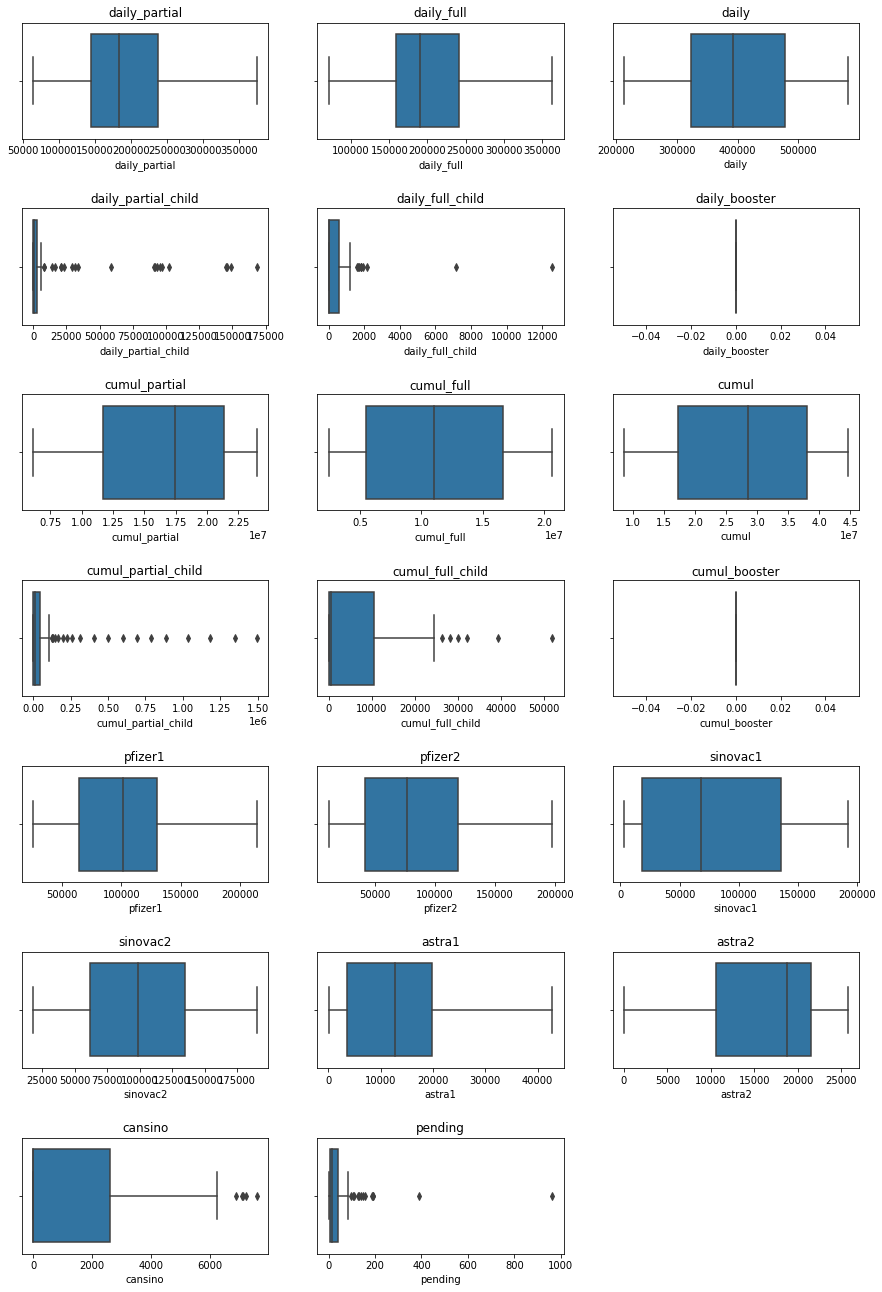

In [ ]:
fig, axes = plt.subplots(7, 3, figsize=(15, 9), sharey=True)
plt.subplots_adjust(left=None, bottom= 0.1, right=None, top=2, wspace=0.2, hspace=0.6)
# daily_partial	daily_full	daily	daily_partial_child	daily_full_child	daily_booster	cumul_partial	cumul_full	
# cumul	cumul_partial_child	cumul_full_child	cumul_booster	pfizer1	pfizer2	sinovac1	sinovac2	astra1	astra2	cansino	pending
sns.boxplot(data=malaysia_vaccination_df, x = malaysia_vaccination_df["daily_partial"],ax=axes[0][0])
axes[0][0].set_title('daily_partial')
sns.boxplot(data=malaysia_vaccination_df,x = malaysia_vaccination_df["daily_full"],ax=axes[0][1])
axes[0][1].set_title('daily_full')
sns.boxplot(data=malaysia_vaccination_df, x = malaysia_vaccination_df["daily"],ax=axes[0][2])
axes[0][2].set_title('daily')
sns.boxplot(data=malaysia_vaccination_df, x = malaysia_vaccination_df["daily_partial_child"],ax=axes[1][0])
axes[1][0].set_title('daily_partial_child')
sns.boxplot(data=malaysia_vaccination_df,x = malaysia_vaccination_df["daily_full_child"],ax=axes[1][1])
axes[1][1].set_title('daily_full_child')
sns.boxplot(data=malaysia_vaccination_df, x = malaysia_vaccination_df["daily_booster"],ax=axes[1][2])
axes[1][2].set_title('daily_booster')
sns.boxplot(data=malaysia_vaccination_df, x = malaysia_vaccination_df["cumul_partial"],ax=axes[2][0])
axes[2][0].set_title('cumul_partial')
sns.boxplot(data=malaysia_vaccination_df,x = malaysia_vaccination_df["cumul_full"],ax=axes[2][1])
axes[2][1].set_title('cumul_full')
sns.boxplot(data=malaysia_vaccination_df, x = malaysia_vaccination_df["cumul"],ax=axes[2][2])
axes[2][2].set_title('cumul')
sns.boxplot(data=malaysia_vaccination_df, x = malaysia_vaccination_df["cumul_partial_child"],ax=axes[3][0])
axes[3][0].set_title('cumul_partial_child')
sns.boxplot(data=malaysia_vaccination_df,x = malaysia_vaccination_df["cumul_full_child"],ax=axes[3][1])
axes[3][1].set_title('cumul_full_child')
sns.boxplot(data=malaysia_vaccination_df, x = malaysia_vaccination_df["cumul_booster"],ax=axes[3][2])
axes[3][2].set_title('cumul_booster')
sns.boxplot(data=malaysia_vaccination_df, x = malaysia_vaccination_df["pfizer1"],ax=axes[4][0])
axes[4][0].set_title('pfizer1')
sns.boxplot(data=malaysia_vaccination_df,x = malaysia_vaccination_df["pfizer2"],ax=axes[4][1])
axes[4][1].set_title('pfizer2')
sns.boxplot(data=malaysia_vaccination_df, x = malaysia_vaccination_df["sinovac1"],ax=axes[4][2])
axes[4][2].set_title('sinovac1')
sns.boxplot(data=malaysia_vaccination_df, x = malaysia_vaccination_df["sinovac2"],ax=axes[5][0])
axes[5][0].set_title('sinovac2')
sns.boxplot(data=malaysia_vaccination_df,x = malaysia_vaccination_df["astra1"],ax=axes[5][1])
axes[5][1].set_title('astra1')
sns.boxplot(data=malaysia_vaccination_df, x = malaysia_vaccination_df["astra2"],ax=axes[5][2])
axes[5][2].set_title('astra2')
sns.boxplot(data=malaysia_vaccination_df, x = malaysia_vaccination_df["cansino"],ax=axes[6][0])
axes[6][0].set_title('cansino')
sns.boxplot(data=malaysia_vaccination_df,x = malaysia_vaccination_df["pending"],ax=axes[6][1])
axes[6][1].set_title('pending')

fig.delaxes(axes[6][2])

#### States Vaccination Dataset  (CITF)

In [ ]:
state_vaccination_df = pd.read_csv(state_vaccination_dir)
after_start_date = state_vaccination_df["date"] >= start_date
before_end_date = state_vaccination_df["date"] <= end_date
between_two_dates = after_start_date & before_end_date
state_vaccination_df = state_vaccination_df.loc[between_two_dates]
state_vaccination_df.head()

date            state  daily_partial  ...  astra2  cansino  pending
2032  2021-07-01            Johor           7689  ...       0        0        0
2033  2021-07-01            Kedah           4008  ...       0        0        0
2034  2021-07-01         Kelantan           3101  ...       0        0        0
2035  2021-07-01           Melaka           5479  ...       0        0        0
2036  2021-07-01  Negeri Sembilan           6900  ...       0        0        4

[5 rows x 22 columns]

In [ ]:
state_vaccination_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1472 entries, 2032 to 3503
Data columns (total 22 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   date                 1472 non-null   object
 1   state                1472 non-null   object
 2   daily_partial        1472 non-null   int64 
 3   daily_full           1472 non-null   int64 
 4   daily                1472 non-null   int64 
 5   daily_partial_child  1472 non-null   int64 
 6   daily_full_child     1472 non-null   int64 
 7   daily_booster        1472 non-null   int64 
 8   cumul_partial        1472 non-null   int64 
 9   cumul_full           1472 non-null   int64 
 10  cumul                1472 non-null   int64 
 11  cumul_partial_child  1472 non-null   int64 
 12  cumul_full_child     1472 non-null   int64 
 13  cumul_booster        1472 non-null   int64 
 14  pfizer1              1472 non-null   int64 
 15  pfizer2              1472 non-null   int64 
 16  sin

In [ ]:
state_vaccination_df.describe()

daily_partial     daily_full  ...      cansino      pending
count    1472.000000    1472.000000  ...  1472.000000  1472.000000
mean    12179.402853   12481.398098  ...    91.227582     2.911005
std     14714.737883   14919.059985  ...   564.948326    27.873261
min         0.000000       0.000000  ...     0.000000     0.000000
25%      2227.250000    2250.250000  ...     0.000000     0.000000
50%      8226.500000    7827.500000  ...     0.000000     0.000000
75%     16108.750000   17126.750000  ...     0.000000     0.000000
max    110174.000000  110531.000000  ...  7563.000000   960.000000

[8 rows x 20 columns]

In [ ]:
nRow, nCol = malaysia_vaccination_df.shape
print(f'There are {nRow} rows and {nCol} columns')

There are 92 rows and 21 columns


In [ ]:

missing_values_df = malaysia_vaccination_df.isna().sum().to_frame()
missing_values_df.rename(columns = {0:'Count of Missing Values'}, inplace=True)
missing_values_df

Count of Missing Values
date                                       0
daily_partial                              0
daily_full                                 0
daily                                      0
daily_partial_child                        0
daily_full_child                           0
daily_booster                              0
cumul_partial                              0
cumul_full                                 0
cumul                                      0
cumul_partial_child                        0
cumul_full_child                           0
cumul_booster                              0
pfizer1                                    0
pfizer2                                    0
sinovac1                                   0
sinovac2                                   0
astra1                                     0
astra2                                     0
cansino                                    0
pending                                    0

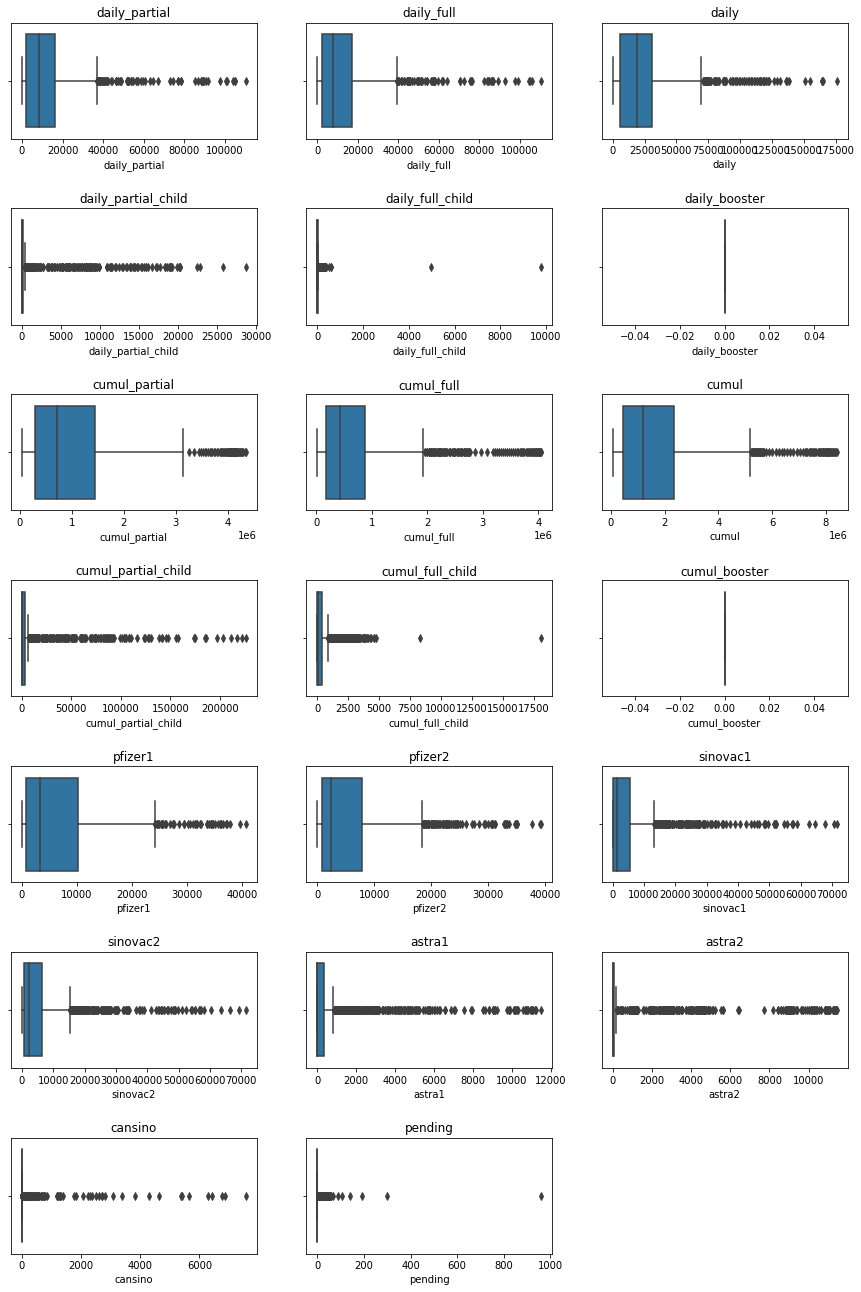

In [ ]:
fig, axes = plt.subplots(7, 3, figsize=(15, 9), sharey=True)
plt.subplots_adjust(left=None, bottom= 0.1, right=None, top=2, wspace=0.2, hspace=0.6)

sns.boxplot(data=state_vaccination_df, x = state_vaccination_df["daily_partial"],ax=axes[0][0])
axes[0][0].set_title('daily_partial')
sns.boxplot(data=state_vaccination_df,x = state_vaccination_df["daily_full"],ax=axes[0][1])
axes[0][1].set_title('daily_full')
sns.boxplot(data=state_vaccination_df, x = state_vaccination_df["daily"],ax=axes[0][2])
axes[0][2].set_title('daily')
sns.boxplot(data=state_vaccination_df, x = state_vaccination_df["daily_partial_child"],ax=axes[1][0])
axes[1][0].set_title('daily_partial_child')
sns.boxplot(data=state_vaccination_df,x = state_vaccination_df["daily_full_child"],ax=axes[1][1])
axes[1][1].set_title('daily_full_child')
sns.boxplot(data=state_vaccination_df, x = state_vaccination_df["daily_booster"],ax=axes[1][2])
axes[1][2].set_title('daily_booster')
sns.boxplot(data=state_vaccination_df, x = state_vaccination_df["cumul_partial"],ax=axes[2][0])
axes[2][0].set_title('cumul_partial')
sns.boxplot(data=state_vaccination_df,x = state_vaccination_df["cumul_full"],ax=axes[2][1])
axes[2][1].set_title('cumul_full')
sns.boxplot(data=state_vaccination_df, x = state_vaccination_df["cumul"],ax=axes[2][2])
axes[2][2].set_title('cumul')
sns.boxplot(data=state_vaccination_df, x = state_vaccination_df["cumul_partial_child"],ax=axes[3][0])
axes[3][0].set_title('cumul_partial_child')
sns.boxplot(data=state_vaccination_df,x = state_vaccination_df["cumul_full_child"],ax=axes[3][1])
axes[3][1].set_title('cumul_full_child')
sns.boxplot(data=state_vaccination_df, x = state_vaccination_df["cumul_booster"],ax=axes[3][2])
axes[3][2].set_title('cumul_booster')
sns.boxplot(data=state_vaccination_df, x = state_vaccination_df["pfizer1"],ax=axes[4][0])
axes[4][0].set_title('pfizer1')
sns.boxplot(data=state_vaccination_df,x = state_vaccination_df["pfizer2"],ax=axes[4][1])
axes[4][1].set_title('pfizer2')
sns.boxplot(data=state_vaccination_df, x = state_vaccination_df["sinovac1"],ax=axes[4][2])
axes[4][2].set_title('sinovac1')
sns.boxplot(data=state_vaccination_df, x = state_vaccination_df["sinovac2"],ax=axes[5][0])
axes[5][0].set_title('sinovac2')
sns.boxplot(data=state_vaccination_df,x = state_vaccination_df["astra1"],ax=axes[5][1])
axes[5][1].set_title('astra1')
sns.boxplot(data=state_vaccination_df, x = state_vaccination_df["astra2"],ax=axes[5][2])
axes[5][2].set_title('astra2')
sns.boxplot(data=state_vaccination_df, x = state_vaccination_df["cansino"],ax=axes[6][0])
axes[6][0].set_title('cansino')
sns.boxplot(data=state_vaccination_df,x = state_vaccination_df["pending"],ax=axes[6][1])
axes[6][1].set_title('pending')

fig.delaxes(axes[6][2])

#### Malaysia Vaccination Registration Dataset  (CITF)

In [ ]:
malaysia_registration_df = pd.read_csv(malaysia_registration_dir)
after_start_date = malaysia_registration_df["date"] >= start_date
before_end_date = malaysia_registration_df["date"] <= end_date
between_two_dates = after_start_date & before_end_date
malaysia_registration_df = malaysia_registration_df.loc[between_two_dates]
malaysia_registration_df.head()

date     state     total   phase2  ...  children  elderly   comorb     oku
7   2021-07-01  Malaysia  16946192  5417533  ...    883075  2872868  4091177  317580
8   2021-07-02  Malaysia  17046402  5443203  ...    895217  2884342  4110719  319980
9   2021-07-03  Malaysia  17139248  5466092  ...    907356  2894331  4128168  322350
10  2021-07-04  Malaysia  17244667  5493357  ...    921829  2905809  4149063  325126
11  2021-07-05  Malaysia  17351578  5520897  ...    933232  2917571  4170188  327808

[5 rows x 11 columns]

In [ ]:
malaysia_registration_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 92 entries, 7 to 98
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   date      92 non-null     object
 1   state     92 non-null     object
 2   total     92 non-null     int64 
 3   phase2    92 non-null     int64 
 4   mysj      92 non-null     int64 
 5   call      92 non-null     int64 
 6   web       92 non-null     int64 
 7   children  92 non-null     int64 
 8   elderly   92 non-null     int64 
 9   comorb    92 non-null     int64 
 10  oku       92 non-null     int64 
dtypes: int64(9), object(2)
memory usage: 8.6+ KB


In [ ]:
malaysia_registration_df.describe()

total        phase2  ...        comorb            oku
count  9.200000e+01  9.200000e+01  ...  9.200000e+01      92.000000
mean   2.170192e+07  6.333170e+06  ...  4.738525e+06  485775.032609
std    2.395140e+06  4.140459e+05  ...  2.817022e+05   87014.317179
min    1.694619e+07  5.417533e+06  ...  4.091177e+06  317580.000000
25%    1.968480e+07  6.024353e+06  ...  4.537568e+06  411400.250000
50%    2.223436e+07  6.459310e+06  ...  4.838558e+06  505275.000000
75%    2.384216e+07  6.697039e+06  ...  4.983313e+06  565008.750000
max    2.471122e+07  6.783563e+06  ...  5.019404e+06  590651.000000

[8 rows x 9 columns]

In [ ]:
nRow, nCol = malaysia_registration_df.shape
print(f'There are {nRow} rows and {nCol} columns')

There are 92 rows and 11 columns


In [ ]:
missing_values_df = malaysia_registration_df.isna().sum().to_frame()
missing_values_df.rename(columns = {0:'Count of Missing Values'}, inplace=True)
missing_values_df

Count of Missing Values
date                            0
state                           0
total                           0
phase2                          0
mysj                            0
call                            0
web                             0
children                        0
elderly                         0
comorb                          0
oku                             0

Text(0.5, 1.0, 'oku')

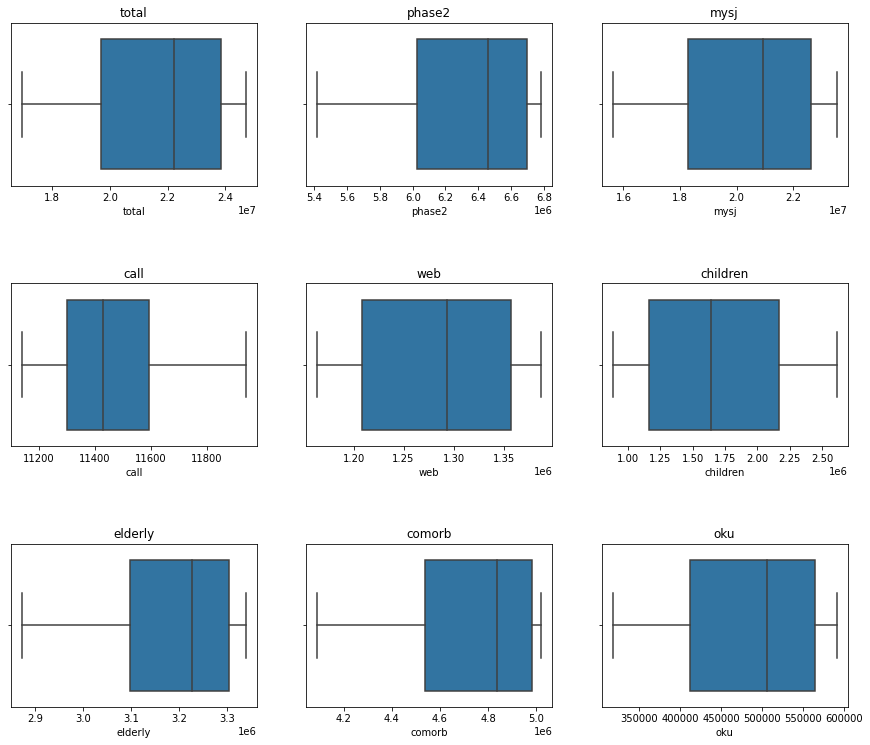

In [ ]:
fig, axes = plt.subplots(3, 3, figsize=(15, 5), sharey=True)
plt.subplots_adjust(left=None, bottom= 0.1, right=None, top=2, wspace=0.2, hspace=0.6)

sns.boxplot(data=malaysia_registration_df, x = malaysia_registration_df["total"],ax=axes[0][0])
axes[0][0].set_title('total')
sns.boxplot(data=malaysia_registration_df,x = malaysia_registration_df["phase2"],ax=axes[0][1])
axes[0][1].set_title('phase2')
sns.boxplot(data=malaysia_registration_df, x = malaysia_registration_df["mysj"],ax=axes[0][2])
axes[0][2].set_title('mysj')
sns.boxplot(data=malaysia_registration_df, x = malaysia_registration_df["call"],ax=axes[1][0])
axes[1][0].set_title('call')
sns.boxplot(data=malaysia_registration_df,x = malaysia_registration_df["web"],ax=axes[1][1])
axes[1][1].set_title('web')
sns.boxplot(data=malaysia_registration_df, x = malaysia_registration_df["children"],ax=axes[1][2])
axes[1][2].set_title('children')
sns.boxplot(data=malaysia_registration_df, x = malaysia_registration_df["elderly"],ax=axes[2][0])
axes[2][0].set_title('elderly')
sns.boxplot(data=malaysia_registration_df,x = malaysia_registration_df["comorb"],ax=axes[2][1])
axes[2][1].set_title('comorb')
sns.boxplot(data=malaysia_registration_df, x = malaysia_registration_df["oku"],ax=axes[2][2])
axes[2][2].set_title('oku')


#### States Vaccination Registration Dataset  (CITF)

In [ ]:
state_registration_df = pd.read_csv(state_registration_dir)
after_start_date = state_registration_df["date"] >= start_date
before_end_date = state_registration_df["date"] <= end_date
between_two_dates = after_start_date & before_end_date
state_registration_df = state_registration_df.loc[between_two_dates]
state_registration_df.head()

date            state    total  ...  elderly  comorb    oku
112  2021-07-01            Johor  2129303  ...   384310  494894  42370
113  2021-07-01            Kedah   978855  ...   188487  274625  21349
114  2021-07-01         Kelantan   648221  ...   124028  179693  13607
115  2021-07-01           Melaka   536340  ...   101506  144672  14423
116  2021-07-01  Negeri Sembilan   664022  ...   129414  187270  14799

[5 rows x 11 columns]

In [ ]:
state_registration_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1472 entries, 112 to 1583
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   date      1472 non-null   object
 1   state     1472 non-null   object
 2   total     1472 non-null   int64 
 3   phase2    1472 non-null   int64 
 4   mysj      1472 non-null   int64 
 5   call      1472 non-null   int64 
 6   web       1472 non-null   int64 
 7   children  1472 non-null   int64 
 8   elderly   1472 non-null   int64 
 9   comorb    1472 non-null   int64 
 10  oku       1472 non-null   int64 
dtypes: int64(9), object(2)
memory usage: 138.0+ KB


In [ ]:
state_registration_df.describe()

total        phase2  ...        comorb            oku
count  1.472000e+03  1.472000e+03  ...  1.472000e+03    1472.000000
mean   1.356370e+06  3.958231e+05  ...  2.961578e+05   30360.939538
std    1.221749e+06  3.153849e+05  ...  2.344114e+05   27857.498785
min    5.805700e+04  1.707900e+04  ...  1.394300e+04    1171.000000
25%    6.723248e+05  2.168640e+05  ...  1.670418e+05   15293.250000
50%    1.052603e+06  3.252470e+05  ...  2.449355e+05   24964.000000
75%    1.743330e+06  5.193808e+05  ...  3.705725e+05   35882.500000
max    5.685378e+06  1.381219e+06  ...  1.033336e+06  133870.000000

[8 rows x 9 columns]

In [ ]:
nRow, nCol = state_registration_df.shape
print(f'There are {nRow} rows and {nCol} columns')

There are 1472 rows and 11 columns


In [ ]:
missing_values_df = state_registration_df.isna().sum().to_frame()
missing_values_df.rename(columns = {0:'Count of Missing Values'}, inplace=True)
missing_values_df

Count of Missing Values
date                            0
state                           0
total                           0
phase2                          0
mysj                            0
call                            0
web                             0
children                        0
elderly                         0
comorb                          0
oku                             0

Text(0.5, 1.0, 'oku')

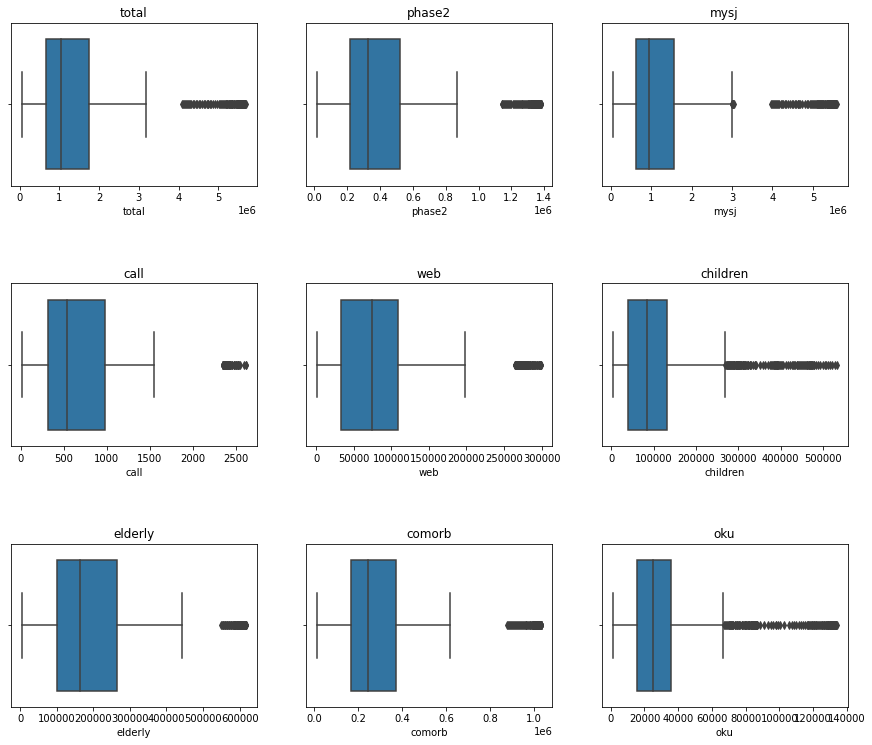

In [ ]:
fig, axes = plt.subplots(3, 3, figsize=(15, 5), sharey=True)
plt.subplots_adjust(left=None, bottom= 0.1, right=None, top=2, wspace=0.2, hspace=0.6)

sns.boxplot(data=state_registration_df, x = state_registration_df["total"],ax=axes[0][0])
axes[0][0].set_title('total')
sns.boxplot(data=state_registration_df,x = state_registration_df["phase2"],ax=axes[0][1])
axes[0][1].set_title('phase2')
sns.boxplot(data=state_registration_df, x = state_registration_df["mysj"],ax=axes[0][2])
axes[0][2].set_title('mysj')
sns.boxplot(data=state_registration_df, x = state_registration_df["call"],ax=axes[1][0])
axes[1][0].set_title('call')
sns.boxplot(data=state_registration_df,x = state_registration_df["web"],ax=axes[1][1])
axes[1][1].set_title('web')
sns.boxplot(data=state_registration_df, x = state_registration_df["children"],ax=axes[1][2])
axes[1][2].set_title('children')
sns.boxplot(data=state_registration_df, x = state_registration_df["elderly"],ax=axes[2][0])
axes[2][0].set_title('elderly')
sns.boxplot(data=state_registration_df,x = state_registration_df["comorb"],ax=axes[2][1])
axes[2][1].set_title('comorb')
sns.boxplot(data=state_registration_df, x = state_registration_df["oku"],ax=axes[2][2])
axes[2][2].set_title('oku')

#### R-Naught Value Dataset 

In [ ]:
r_naught_df = pd.read_csv(r_naught_dir)
r_naught_df['date'] = pd.to_datetime(r_naught_df['date'], format='%d/%m/%Y')
after_start_date = r_naught_df["date"] >= start_date
before_end_date = r_naught_df["date"] <= end_date
between_two_dates = after_start_date & before_end_date
r_naught_df = r_naught_df.loc[between_two_dates]
r_naught_df = r_naught_df._convert(numeric=True)
r_naught_df = r_naught_df.replace(np.nan, 0)
r_naught_df.head()

date  Malaysia  Selangor  Sabah  ...  Perak  Terengganu  Sarawak  Perlis
0 2021-07-01      1.06      1.07   0.96  ...   1.00        0.75     0.94     0.0
1 2021-07-02      1.07      1.07   0.96  ...   1.00        0.75     0.94     0.0
2 2021-07-03      1.07      1.08   1.01  ...   0.95        0.77     0.93     0.0
3 2021-07-04      1.06      1.08   1.02  ...   1.05        1.17     1.04     0.0
4 2021-07-05      1.07      1.09   1.04  ...   0.95        0.88     0.89     0.0

[5 rows x 18 columns]

In [ ]:
r_naught_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 92 entries, 0 to 91
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   date             92 non-null     datetime64[ns]
 1   Malaysia         92 non-null     float64       
 2   Selangor         92 non-null     float64       
 3   Sabah            92 non-null     float64       
 4   P. Pinang        92 non-null     float64       
 5   Johor            92 non-null     float64       
 6   Kelantan         92 non-null     float64       
 7   Melaka           92 non-null     float64       
 8   WP Kuala Lumpur  92 non-null     float64       
 9   WP Labuan        92 non-null     float64       
 10  WP Putrajaya     92 non-null     float64       
 11  Negeri Sembilan  92 non-null     float64       
 12  Kedah            92 non-null     float64       
 13  Pahang           92 non-null     float64       
 14  Perak            92 non-null     float64    

In [ ]:
r_naught_df.describe()

Malaysia   Selangor      Sabah  ...  Terengganu    Sarawak     Perlis
count  92.000000  92.000000  92.000000  ...   92.000000  92.000000  92.000000
mean    1.038152   1.002174   1.081196  ...    1.113478   1.069565   0.702065
std     0.079930   0.119208   0.126464  ...    0.145741   0.121175   0.580802
min     0.880000   0.810000   0.830000  ...    0.750000   0.850000   0.000000
25%     0.970000   0.880000   0.957500  ...    1.030000   0.950000   0.000000
50%     1.050000   1.010000   1.105000  ...    1.075000   1.085000   0.985000
75%     1.090000   1.105000   1.190000  ...    1.250000   1.162500   1.202500
max     1.200000   1.200000   1.250000  ...    1.440000   1.310000   1.530000

[8 rows x 17 columns]

In [ ]:
nRow, nCol = r_naught_df.shape
print(f'There are {nRow} rows and {nCol} columns')

There are 92 rows and 18 columns


In [ ]:
missing_values_df = r_naught_df.isna().sum().to_frame()
missing_values_df.rename(columns = {0:'Count of Missing Values'}, inplace=True)
missing_values_df

Count of Missing Values
date                                   0
Malaysia                               0
Selangor                               0
Sabah                                  0
P. Pinang                              0
Johor                                  0
Kelantan                               0
Melaka                                 0
WP Kuala Lumpur                        0
WP Labuan                              0
WP Putrajaya                           0
Negeri Sembilan                        0
Kedah                                  0
Pahang                                 0
Perak                                  0
Terengganu                             0
Sarawak                                0
Perlis                                 0

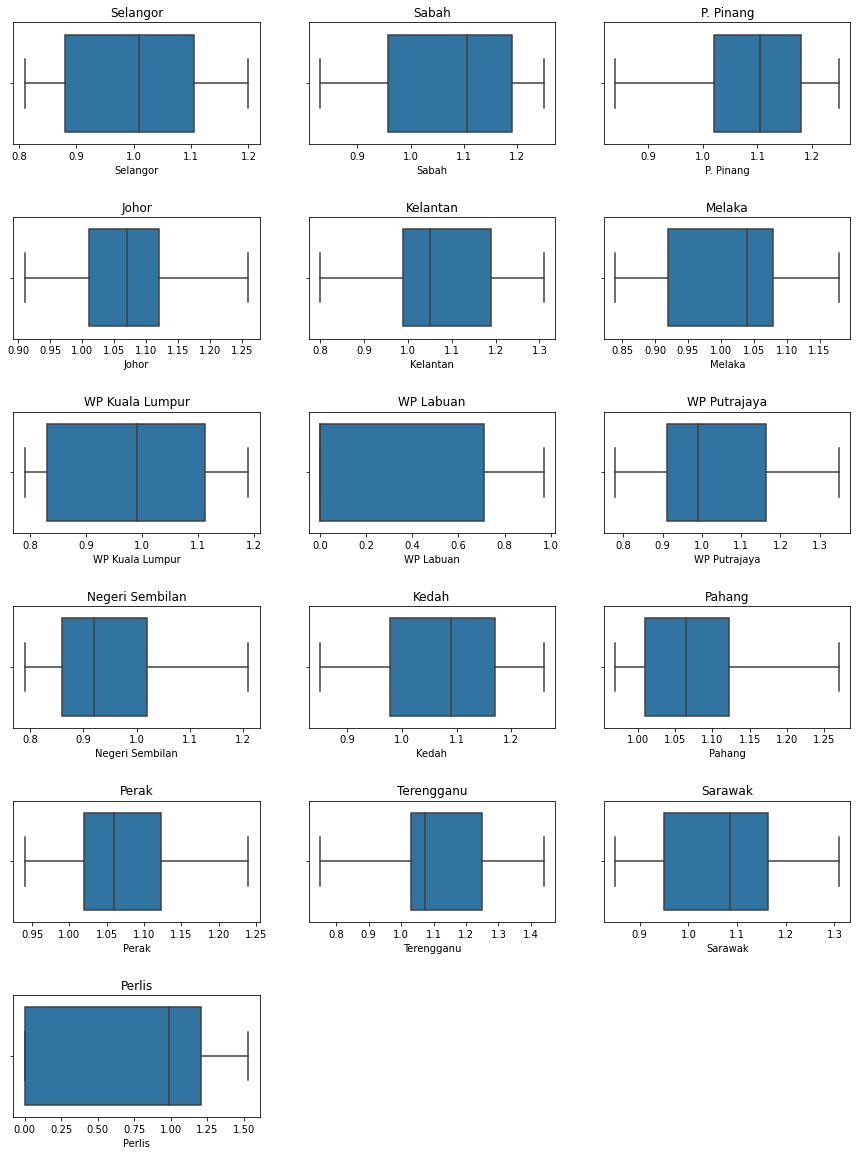

In [ ]:
fig, axes = plt.subplots(6, 3, figsize=(15, 8), sharey=True)
plt.subplots_adjust(left=None, bottom= 0.1, right=None, top=2, wspace=0.2, hspace=0.6)

sns.boxplot(data=r_naught_df, x = r_naught_df["Selangor"],ax=axes[0][0])
axes[0][0].set_title('Selangor')
sns.boxplot(data=r_naught_df,x = r_naught_df["Sabah"],ax=axes[0][1])
axes[0][1].set_title('Sabah')
sns.boxplot(data=r_naught_df, x = r_naught_df["P. Pinang"],ax=axes[0][2])
axes[0][2].set_title('P. Pinang')
sns.boxplot(data=r_naught_df, x = r_naught_df["Johor"],ax=axes[1][0])
axes[1][0].set_title('Johor')
sns.boxplot(data=r_naught_df,x = r_naught_df["Kelantan"],ax=axes[1][1])
axes[1][1].set_title('Kelantan')
sns.boxplot(data=r_naught_df, x = r_naught_df["Melaka"],ax=axes[1][2])
axes[1][2].set_title('Melaka')
sns.boxplot(data=r_naught_df, x = r_naught_df["WP Kuala Lumpur"],ax=axes[2][0])
axes[2][0].set_title('WP Kuala Lumpur')
sns.boxplot(data=r_naught_df,x = r_naught_df["WP Labuan"],ax=axes[2][1])
axes[2][1].set_title('WP Labuan')
sns.boxplot(data=r_naught_df, x = r_naught_df["WP Putrajaya"],ax=axes[2][2])
axes[2][2].set_title('WP Putrajaya')
sns.boxplot(data=r_naught_df, x = r_naught_df["Negeri Sembilan"],ax=axes[3][0])
axes[3][0].set_title('Negeri Sembilan')
sns.boxplot(data=r_naught_df,x = r_naught_df["Kedah"],ax=axes[3][1])
axes[3][1].set_title('Kedah')
sns.boxplot(data=r_naught_df, x = r_naught_df["Pahang"],ax=axes[3][2])
axes[3][2].set_title('Pahang')
sns.boxplot(data=r_naught_df, x = r_naught_df["Perak"],ax=axes[4][0])
axes[4][0].set_title('Perak')
sns.boxplot(data=r_naught_df,x = r_naught_df["Terengganu"],ax=axes[4][1])
axes[4][1].set_title('Terengganu')
sns.boxplot(data=r_naught_df, x = r_naught_df["Sarawak"],ax=axes[4][2])
axes[4][2].set_title('Sarawak')
sns.boxplot(data=r_naught_df, x = r_naught_df["Perlis"],ax=axes[5][0])
axes[5][0].set_title('Perlis')

fig.delaxes(axes[5][1])
fig.delaxes(axes[5][2])

#### Google Trends Dataset 

##### Search Trend of "Coronavirus" in Malaysia

In [ ]:
malaysia_trends_coronavirus_df = pd.read_csv(malaysia_trends_coronavirus_dir)
malaysia_trends_coronavirus_df['Date'] = pd.to_datetime(malaysia_trends_coronavirus_df['Date'], format='%d/%m/%Y')
malaysia_trends_coronavirus_df.head()


Date  Interest Score
0 2020-10-25              36
1 2020-11-01              33
2 2020-11-08              31
3 2020-11-15              30
4 2020-11-22              28

In [ ]:
malaysia_trends_coronavirus_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52 entries, 0 to 51
Data columns (total 2 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Date            52 non-null     datetime64[ns]
 1   Interest Score  52 non-null     int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 960.0 bytes


In [ ]:
malaysia_trends_coronavirus_df.describe()

Interest Score
count       52.000000
mean        26.980769
std         13.048162
min         12.000000
25%         19.750000
50%         25.000000
75%         31.500000
max        100.000000

In [ ]:
nRow, nCol = malaysia_trends_coronavirus_df.shape
print(f'There are {nRow} rows and {nCol} columns')

There are 52 rows and 2 columns


In [ ]:
missing_values_df = malaysia_trends_coronavirus_df.isna().sum().to_frame()
missing_values_df.rename(columns = {0:'Count of Missing Values'}, inplace=True)
missing_values_df

Count of Missing Values
Date                                  0
Interest Score                        0

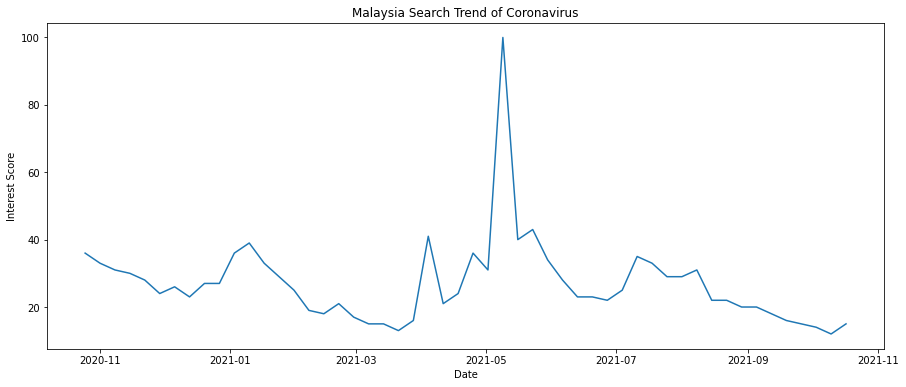

In [ ]:
plt.figure(figsize=(15, 6))
x = malaysia_trends_coronavirus_df['Date']
y = malaysia_trends_coronavirus_df['Interest Score']
plt.plot(x, y)
plt.title("Malaysia Search Trend of Coronavirus")
plt.xlabel("Date")
plt.ylabel("Interest Score")
plt.show()

##### Comparison of the Search Trend of 5 Vaccines in Malaysia

In [ ]:
malaysia_trends_vaccine_comparison_df = pd.read_csv(malaysia_trends_vaccine_comparison_dir)
malaysia_trends_vaccine_comparison_df['Date'] = pd.to_datetime(malaysia_trends_vaccine_comparison_df['Date'], format='%d/%m/%Y')
malaysia_trends_vaccine_comparison_df.head()

Date  ...  Interest Score (Pfizer)
0 2020-10-25  ...                      0.5
1 2020-11-01  ...                      0.5
2 2020-11-08  ...                      6.0
3 2020-11-15  ...                      3.0
4 2020-11-22  ...                      2.0

[5 rows x 6 columns]

In [ ]:
malaysia_trends_vaccine_comparison_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52 entries, 0 to 51
Data columns (total 6 columns):
 #   Column                        Non-Null Count  Dtype         
---  ------                        --------------  -----         
 0   Date                          52 non-null     datetime64[ns]
 1   Interest Score (Moderna)      52 non-null     float64       
 2   Interest Score (Sinovac)      52 non-null     float64       
 3   Interest Score (AstraZeneca)  52 non-null     float64       
 4   Interest Score (Cansino)      52 non-null     float64       
 5   Interest Score (Pfizer)       52 non-null     float64       
dtypes: datetime64[ns](1), float64(5)
memory usage: 2.6 KB


In [ ]:
malaysia_trends_vaccine_comparison_df.describe()

Interest Score (Moderna)  ...  Interest Score (Pfizer)
count                 52.000000  ...                52.000000
mean                   0.894231  ...                 7.442308
std                    0.412269  ...                 6.293985
min                    0.000000  ...                 0.500000
25%                    0.500000  ...                 3.000000
50%                    1.000000  ...                 5.000000
75%                    1.000000  ...                10.000000
max                    2.000000  ...                25.000000

[8 rows x 5 columns]

In [ ]:
nRow, nCol = malaysia_trends_vaccine_comparison_df.shape
print(f'There are {nRow} rows and {nCol} columns')

There are 52 rows and 6 columns


In [ ]:
missing_values_df = malaysia_trends_vaccine_comparison_df.isna().sum().to_frame()
missing_values_df.rename(columns = {0:'Count of Missing Values'}, inplace=True)
missing_values_df

Count of Missing Values
Date                                                0
Interest Score (Moderna)                            0
Interest Score (Sinovac)                            0
Interest Score (AstraZeneca)                        0
Interest Score (Cansino)                            0
Interest Score (Pfizer)                             0

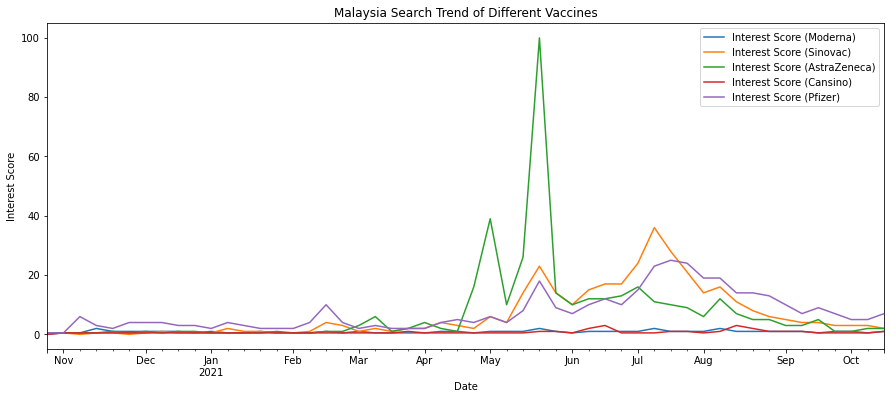

In [ ]:
malaysia_trends_vaccine_comparison_df.plot(x="Date",y=['Interest Score (Moderna)','Interest Score (Sinovac)',
                                                       'Interest Score (AstraZeneca)','Interest Score (Cansino)',
                                                       'Interest Score (Pfizer)'],figsize=(15, 6))
plt.title("Malaysia Search Trend of Different Vaccines")
plt.xlabel("Date")
plt.ylabel("Interest Score")
plt.show()

##### Search Trend of "AstraZeneca" in Each State in Malaysia

In [ ]:
states_trends_astrazeneca_df =  pd.read_csv(states_trends_astrazeneca_dir)
states_trends_astrazeneca_df


State  Interest Score
0            Selangor             100
1        Pulau Pinang              79
2   W.P. Kuala Lumpur              77
3      W.P. Putrajaya              64
4               Johor              52
5             Sarawak              43
6     Negeri Sembilan              40
7               Perak              37
8              Melaka              36
9               Kedah              30
10             Pahang              26
11           Kelantan              26
12              Sabah              26
13         Terengganu              25
14             Perlis              20
15        W.P. Labuan               8

In [ ]:
states_trends_astrazeneca_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16 entries, 0 to 15
Data columns (total 2 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   State           16 non-null     object
 1   Interest Score  16 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 384.0+ bytes


In [ ]:
states_trends_astrazeneca_df.describe()

Interest Score
count       16.000000
mean        43.062500
std         25.074472
min          8.000000
25%         26.000000
50%         36.500000
75%         55.000000
max        100.000000

In [ ]:
nRow, nCol = states_trends_astrazeneca_df.shape
print(f'There are {nRow} rows and {nCol} columns')

There are 16 rows and 2 columns


In [ ]:
missing_values_df = states_trends_astrazeneca_df.isna().sum().to_frame()
missing_values_df.rename(columns = {0:'Count of Missing Values'}, inplace=True)
missing_values_df

Count of Missing Values
State                                 0
Interest Score                        0

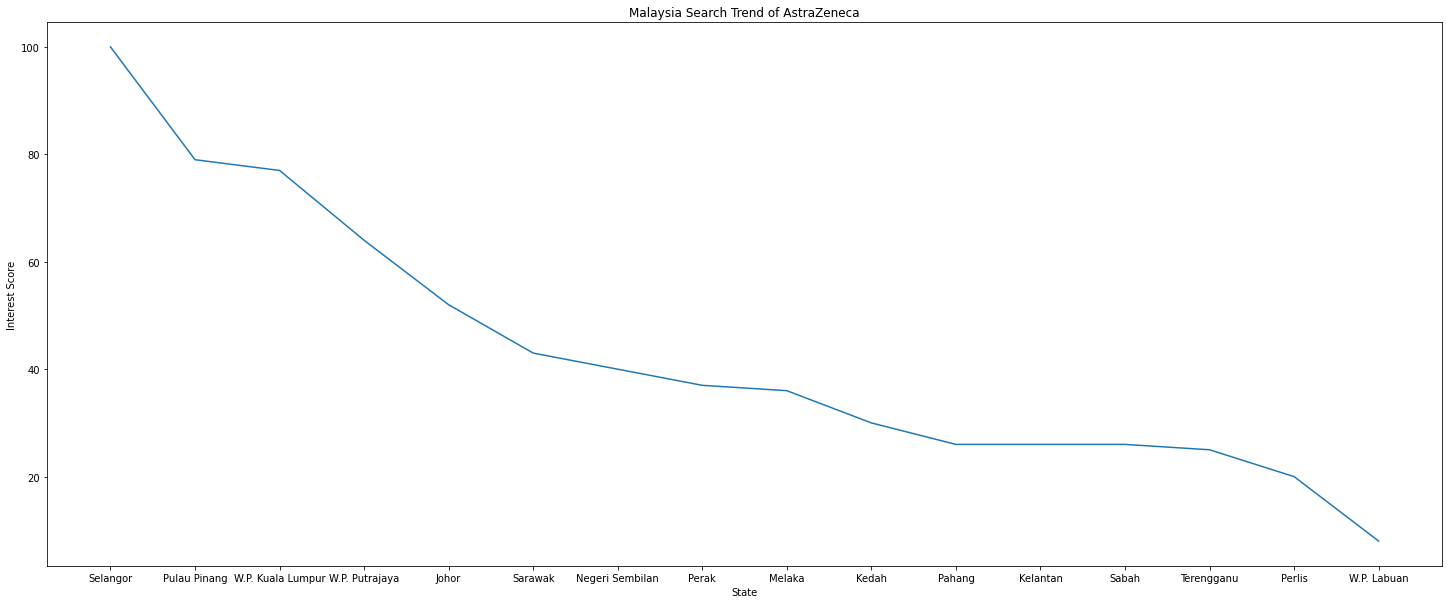

In [ ]:
plt.figure(figsize=(25, 10))
x = states_trends_astrazeneca_df['State']
y = states_trends_astrazeneca_df['Interest Score']
plt.plot(x, y)
plt.title("Malaysia Search Trend of AstraZeneca")
plt.xlabel("State")
plt.ylabel("Interest Score")
plt.show()

##### Search Trend of "Cansino" in Each State in Malaysia

In [ ]:
states_trends_cansino_df = pd.read_csv(states_trends_cansino_dir)
states_trends_cansino_df


State  Interest Score
0               Sabah             100
1               Perak              58
2   W.P. Kuala Lumpur              53
3             Sarawak              45
4        Pulau Pinang              45
5            Selangor              37
6     Negeri Sembilan              34
7               Johor              32
8              Pahang              28
9            Kelantan              24
10              Kedah              23
11             Melaka              21
12         Terengganu              20
13     W.P. Putrajaya              17
14             Perlis               0
15        W.P. Labuan               0

In [ ]:
states_trends_cansino_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16 entries, 0 to 15
Data columns (total 2 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   State           16 non-null     object
 1   Interest Score  16 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 384.0+ bytes


In [ ]:
states_trends_cansino_df.describe()

Interest Score
count       16.000000
mean        33.562500
std         24.177038
min          0.000000
25%         20.750000
50%         30.000000
75%         45.000000
max        100.000000

In [ ]:
nRow, nCol = states_trends_cansino_df.shape
print(f'There are {nRow} rows and {nCol} columns')

There are 16 rows and 2 columns


In [ ]:
missing_values_df = states_trends_cansino_df.isna().sum().to_frame()
missing_values_df.rename(columns = {0:'Count of Missing Values'}, inplace=True)
missing_values_df

Count of Missing Values
State                                 0
Interest Score                        0

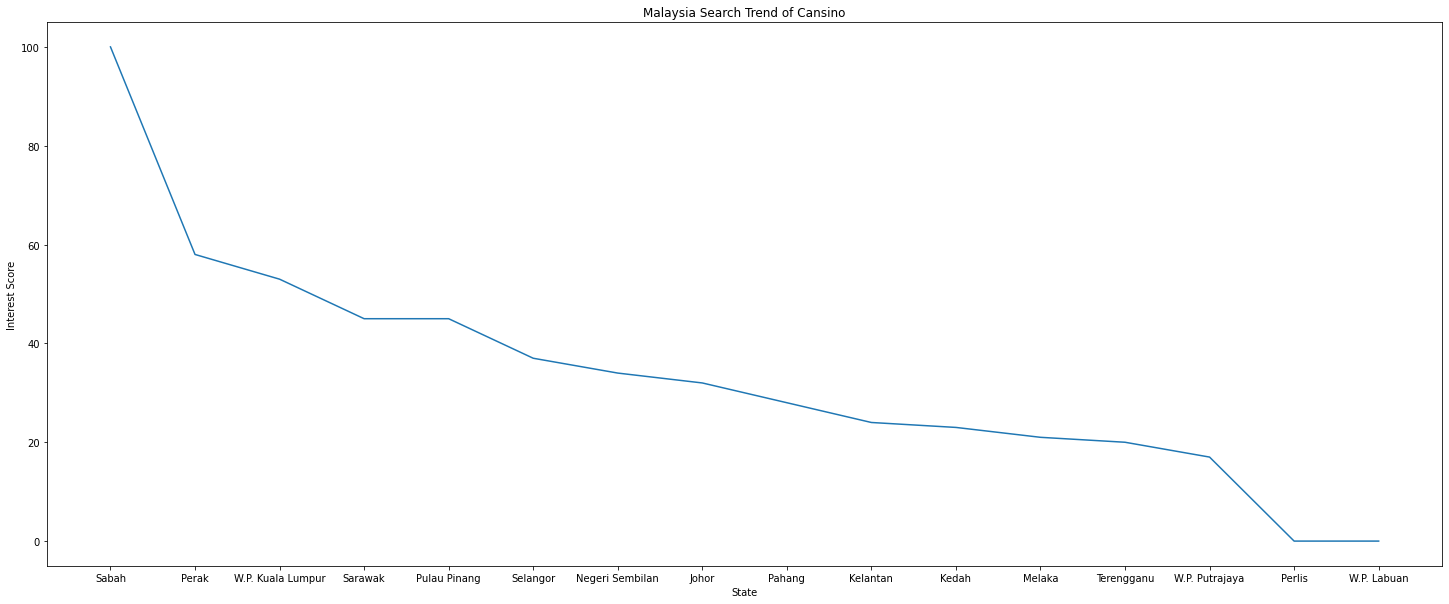

In [ ]:
plt.figure(figsize=(25, 10))
x = states_trends_cansino_df['State']
y = states_trends_cansino_df['Interest Score']
plt.plot(x, y)
plt.title("Malaysia Search Trend of Cansino")
plt.xlabel("State")
plt.ylabel("Interest Score")
plt.show()

##### Search Trend of "Moderna" in Each State in Malaysia

In [ ]:
states_trends_moderna_df = pd.read_csv(states_trends_moderna_dir)
states_trends_moderna_df

State  Interest Score
0        Pulau Pinang             100
1            Selangor              80
2   W.P. Kuala Lumpur              78
3              Melaka              73
4               Johor              73
5               Perak              52
6               Sabah              38
7             Sarawak              36
8     Negeri Sembilan              30
9      W.P. Putrajaya              29
10         Terengganu              27
11           Kelantan              17
12             Pahang              15
13              Kedah              14
14             Perlis               0
15        W.P. Labuan               0

In [ ]:
states_trends_moderna_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16 entries, 0 to 15
Data columns (total 2 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   State           16 non-null     object
 1   Interest Score  16 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 384.0+ bytes


In [ ]:
states_trends_moderna_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16 entries, 0 to 15
Data columns (total 2 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   State           16 non-null     object
 1   Interest Score  16 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 384.0+ bytes


In [ ]:
nRow, nCol = states_trends_moderna_df.shape
print(f'There are {nRow} rows and {nCol} columns')

There are 16 rows and 2 columns


In [ ]:
missing_values_df = states_trends_moderna_df.isna().sum().to_frame()
missing_values_df.rename(columns = {0:'Count of Missing Values'}, inplace=True)
missing_values_df

Count of Missing Values
State                                 0
Interest Score                        0

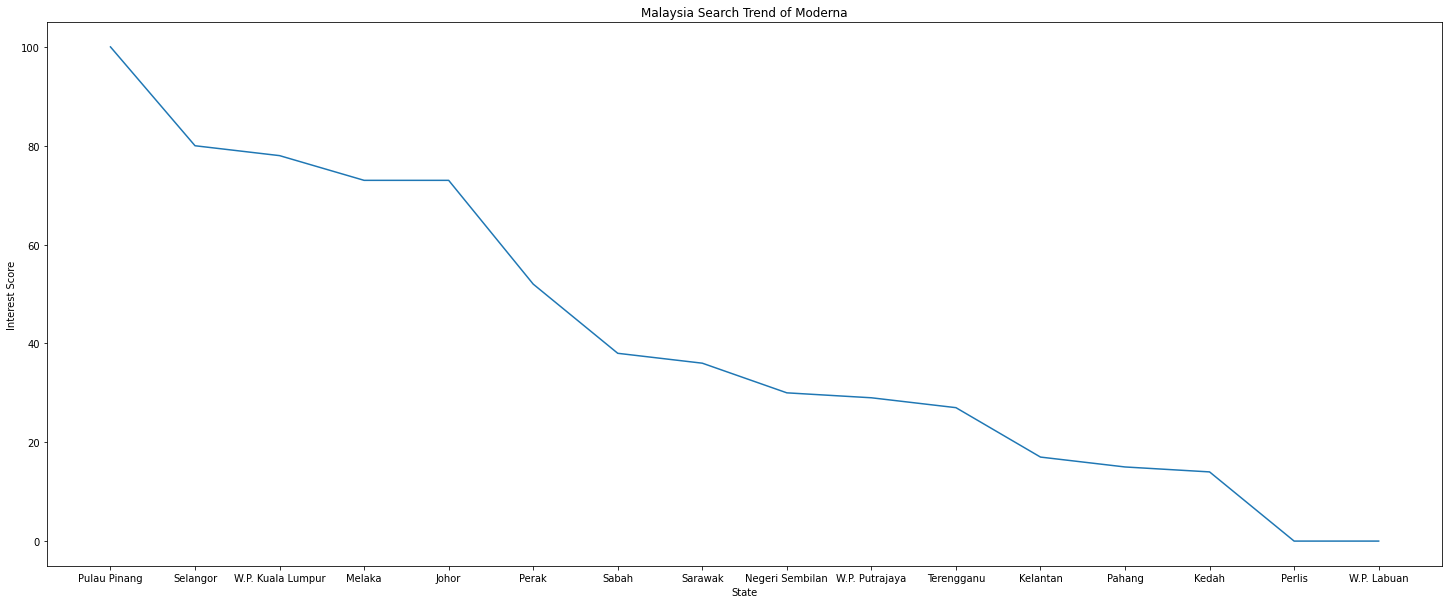

In [ ]:
plt.figure(figsize=(25, 10))
x = states_trends_moderna_df['State']
y = states_trends_moderna_df['Interest Score']
plt.plot(x, y)
plt.title("Malaysia Search Trend of Moderna")
plt.xlabel("State")
plt.ylabel("Interest Score")
plt.show()

##### Search Trend of "Pfizer" in Each State in Malaysia

In [ ]:
states_trends_pfizer_df = pd.read_csv(states_trends_pfizer_dir)
states_trends_pfizer_df

State  Interest Score
0        Pulau Pinang             100
1            Selangor              93
2      W.P. Putrajaya              89
3     Negeri Sembilan              88
4   W.P. Kuala Lumpur              81
5               Sabah              79
6               Perak              79
7         W.P. Labuan              76
8               Johor              76
9               Kedah              71
10             Melaka              71
11            Sarawak              66
12             Pahang              65
13         Terengganu              65
14             Perlis              59
15           Kelantan              49

In [ ]:
states_trends_pfizer_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16 entries, 0 to 15
Data columns (total 2 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   State           16 non-null     object
 1   Interest Score  16 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 384.0+ bytes


In [ ]:
states_trends_pfizer_df.describe()

Interest Score
count       16.000000
mean        75.437500
std         13.231119
min         49.000000
25%         65.750000
50%         76.000000
75%         82.750000
max        100.000000

In [ ]:
nRow, nCol = states_trends_pfizer_df.shape
print(f'There are {nRow} rows and {nCol} columns')

There are 16 rows and 2 columns


In [ ]:
missing_values_df = states_trends_pfizer_df.isna().sum().to_frame()
missing_values_df.rename(columns = {0:'Count of Missing Values'}, inplace=True)
missing_values_df

Count of Missing Values
State                                 0
Interest Score                        0

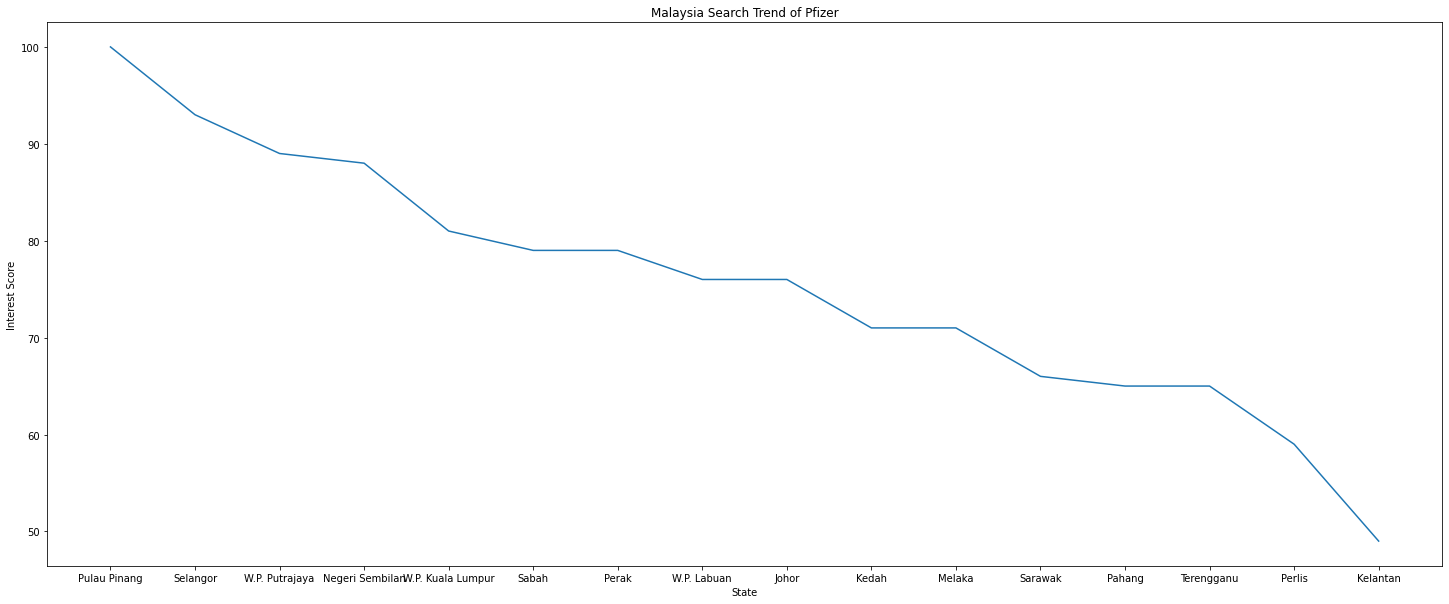

In [ ]:
plt.figure(figsize=(25, 10))
x = states_trends_pfizer_df['State']
y = states_trends_pfizer_df['Interest Score']
plt.plot(x, y)
plt.title("Malaysia Search Trend of Pfizer")
plt.xlabel("State")
plt.ylabel("Interest Score")
plt.show()

##### Search Trend of "Sinovac" in Each State in Malaysia

In [ ]:
states_trends_sinovac_df = pd.read_csv(states_trends_sinovac_dir)
states_trends_sinovac_df

State  Interest Score
0            Selangor             100
1        Pulau Pinang              89
2   W.P. Kuala Lumpur              74
3             Sarawak              72
4              Melaka              72
5     Negeri Sembilan              67
6               Johor              62
7               Sabah              61
8               Perak              57
9          Terengganu              55
10              Kedah              54
11             Pahang              49
12     W.P. Putrajaya              46
13        W.P. Labuan              42
14           Kelantan              41
15             Perlis              30

In [ ]:
states_trends_sinovac_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16 entries, 0 to 15
Data columns (total 2 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   State           16 non-null     object
 1   Interest Score  16 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 384.0+ bytes


In [ ]:
states_trends_sinovac_df.describe()

Interest Score
count       16.000000
mean        60.687500
std         18.153856
min         30.000000
25%         48.250000
50%         59.000000
75%         72.000000
max        100.000000

In [ ]:
nRow, nCol = states_trends_sinovac_df.shape
print(f'There are {nRow} rows and {nCol} columns')

There are 16 rows and 2 columns


In [ ]:
missing_values_df = states_trends_sinovac_df.isna().sum().to_frame()
missing_values_df.rename(columns = {0:'Count of Missing Values'}, inplace=True)
missing_values_df

Count of Missing Values
State                                 0
Interest Score                        0

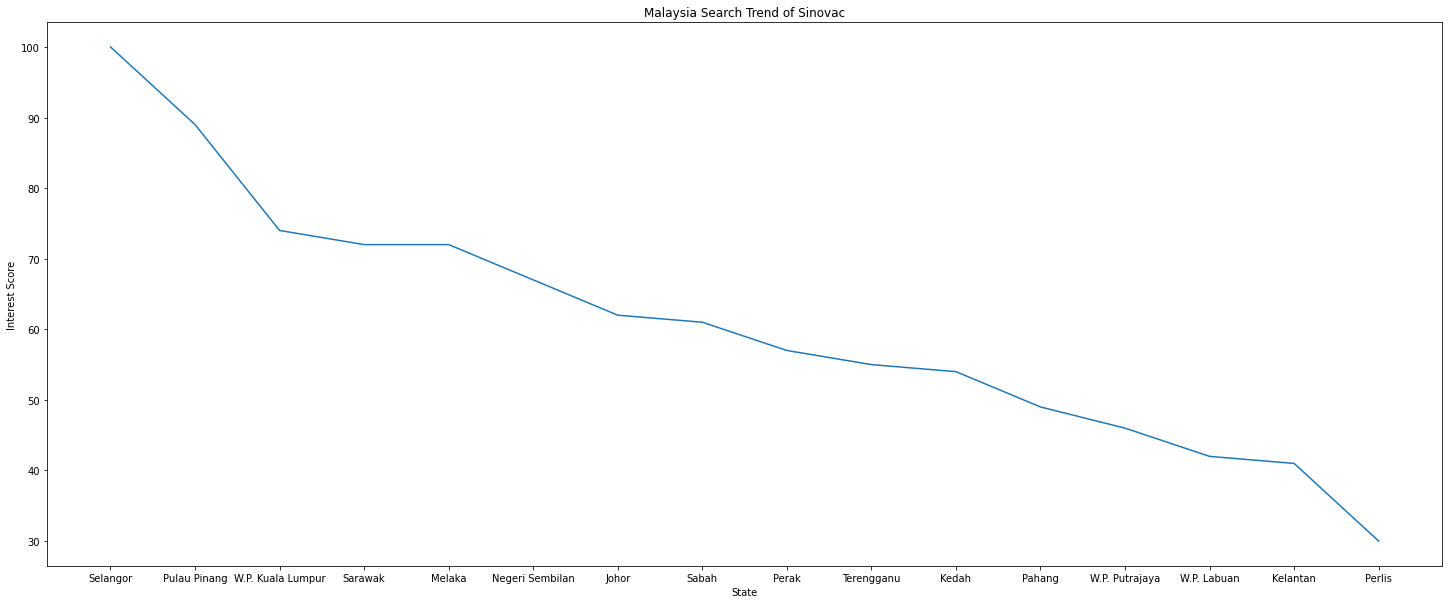

In [ ]:
plt.figure(figsize=(25, 10))
x = states_trends_sinovac_df['State']
y = states_trends_sinovac_df['Interest Score']
plt.plot(x, y)
plt.title("Malaysia Search Trend of Sinovac")
plt.xlabel("State")
plt.ylabel("Interest Score")
plt.show()

##### Search Trend of "Symptoms" in Each State in Malaysia

In [ ]:
states_trends_symptoms_df = pd.read_csv(states_trends_symptoms_dir)
states_trends_symptoms_df

State  Interest Score
0               Johor             100
1        Pulau Pinang              93
2     Negeri Sembilan              85
3             Sarawak              78
4               Perak              71
5               Kedah              67
6               Sabah              60
7              Pahang              60
8            Selangor              51
9              Melaka              49
10           Kelantan              49
11  W.P. Kuala Lumpur              47
12         Terengganu               9
13        W.P. Labuan               0
14     W.P. Putrajaya               0
15             Perlis               0

In [ ]:
states_trends_symptoms_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16 entries, 0 to 15
Data columns (total 2 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   State           16 non-null     object
 1   Interest Score  16 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 384.0+ bytes


In [ ]:
states_trends_symptoms_df.describe()

Interest Score
count        16.00000
mean         51.18750
std          33.12445
min           0.00000
25%          37.50000
50%          55.50000
75%          72.75000
max         100.00000

In [ ]:
nRow, nCol = states_trends_symptoms_df.shape
print(f'There are {nRow} rows and {nCol} columns')

There are 16 rows and 2 columns


In [ ]:
missing_values_df = states_trends_symptoms_df.isna().sum().to_frame()
missing_values_df.rename(columns = {0:'Count of Missing Values'}, inplace=True)
missing_values_df

Count of Missing Values
State                                 0
Interest Score                        0

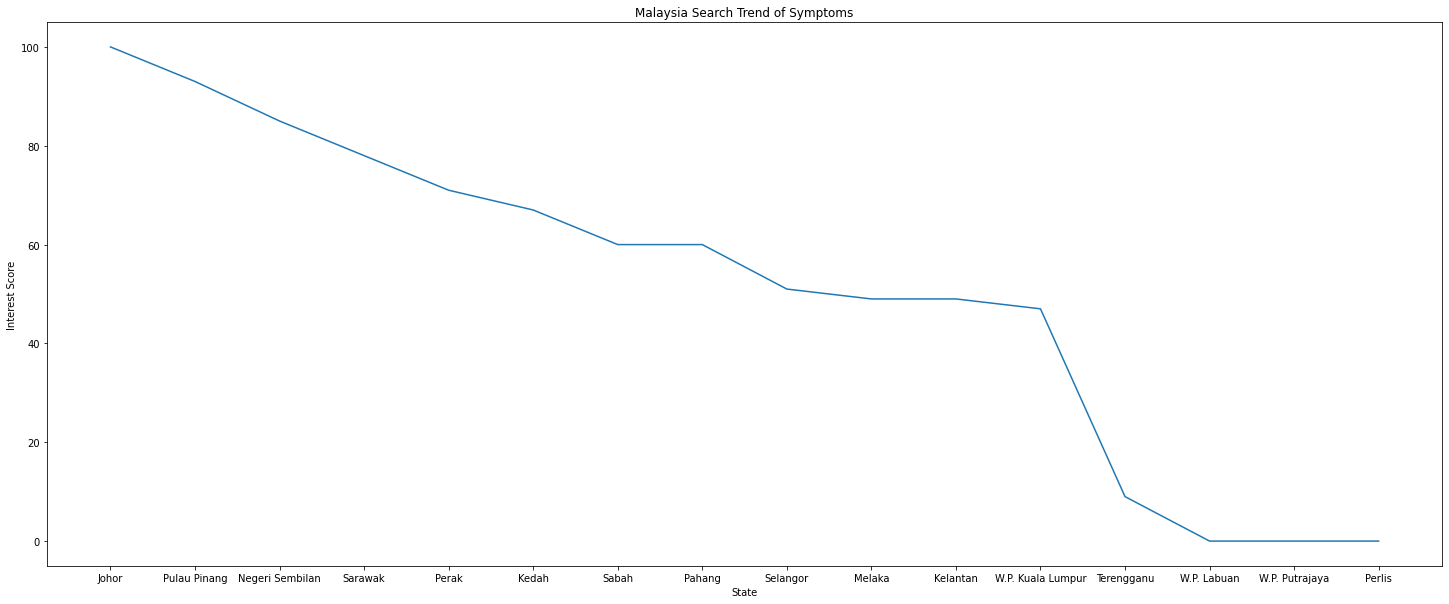

In [ ]:
plt.figure(figsize=(25, 10))
x = states_trends_symptoms_df['State']
y = states_trends_symptoms_df['Interest Score']
plt.plot(x, y)
plt.title("Malaysia Search Trend of Symptoms")
plt.xlabel("State")
plt.ylabel("Interest Score")
plt.show()

##### Search Trend of "Vaccine" in Each State in Malaysia

In [ ]:
states_trends_vaccine_df = pd.read_csv(states_trends_vaccine_dir)
states_trends_vaccine_df

State  Interest Score
0            Selangor             100
1        Pulau Pinang              94
2   W.P. Kuala Lumpur              92
3               Johor              82
4     Negeri Sembilan              81
5             Sarawak              78
6              Melaka              78
7      W.P. Putrajaya              76
8              Pahang              75
9               Sabah              75
10              Kedah              74
11             Perlis              74
12              Perak              72
13           Kelantan              70
14         Terengganu              69
15        W.P. Labuan              50

In [ ]:
states_trends_vaccine_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16 entries, 0 to 15
Data columns (total 2 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   State           16 non-null     object
 1   Interest Score  16 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 384.0+ bytes


In [ ]:
states_trends_vaccine_df.describe()

Interest Score
count       16.000000
mean        77.500000
std         11.477514
min         50.000000
25%         73.500000
50%         75.500000
75%         81.250000
max        100.000000

In [ ]:
nRow, nCol = states_trends_vaccine_df.shape
print(f'There are {nRow} rows and {nCol} columns')

There are 16 rows and 2 columns


In [ ]:
missing_values_df = states_trends_vaccine_df.isna().sum().to_frame()
missing_values_df.rename(columns = {0:'Count of Missing Values'}, inplace=True)
missing_values_df


Count of Missing Values
State                                 0
Interest Score                        0

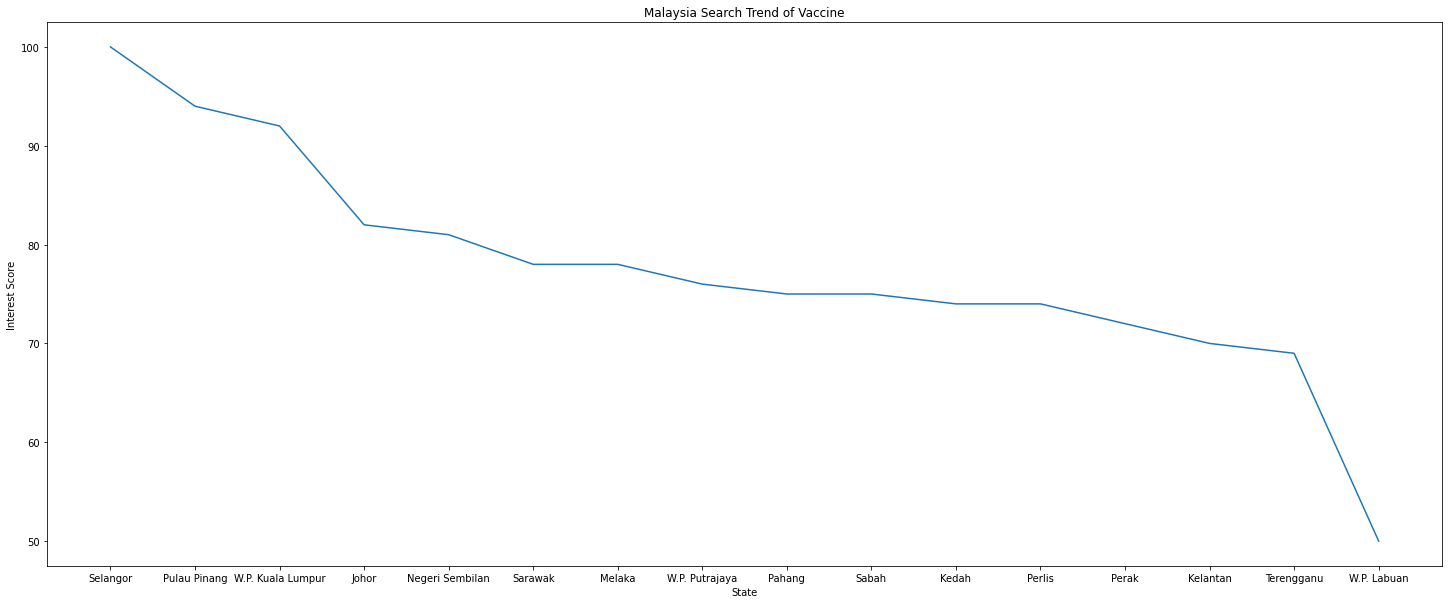

In [ ]:
plt.figure(figsize=(25, 10))
x = states_trends_vaccine_df['State']
y = states_trends_vaccine_df['Interest Score']
plt.plot(x, y)
plt.title("Malaysia Search Trend of Vaccine")
plt.xlabel("State")
plt.ylabel("Interest Score")
plt.show()

## Question 1

In the first question, we are curious in the relationships between Covid-19 vaccination dataset and Covid-19 daily new cases dataset within July untilSeptember for each state in Malaysia.  Before that,  we look at the biggerpicture of  using the whole  Malaysia’s data.  We get  to know  the effect  ofvaccination  to  the  daily  new  cases.   The  plot  below  has  shown  that  the vaccination  has  been  helped  reducing  the  daily  new  cases  significantly  inMalaysia.  The scatter plot has a **strong correlation** but it is not linear.  Thedaily new cases increase and the vaccination rate increased, after a certainpoint the vaccination has played its important role to decrease the daily newcases.

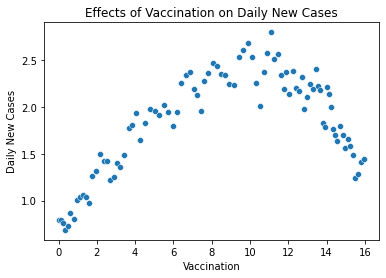

In [ ]:
df = pd.DataFrame()
df['vaccine'] = state_vaccination_df.daily.cumsum()
df =(df-df.min())/(df.max()-df.min())
df['date'] = state_vaccination_df.date
df['state'] = state_vaccination_df.state
df.set_index('date',inplace=True)

df2 = pd.DataFrame()
df2['cases_new'] = state_case_df.cases_new
df2 =(df2-df2.min())/(df2.max()-df2.min())
df2['date'] = state_case_df.date

df2.set_index('date',inplace=True)
df = pd.concat([df, df2], axis=1)
df3= df.copy()
df = df.groupby('date').sum()
plt.title('Effects of Vaccination on Daily New Cases')
plt.xlabel('Vaccination')
plt.ylabel('Daily New Cases')
sns.set(rc={'figure.figsize':(8,8)})
sns.set(style='whitegrid')
sns.scatterplot(data=df, x="vaccine", y="cases_new")

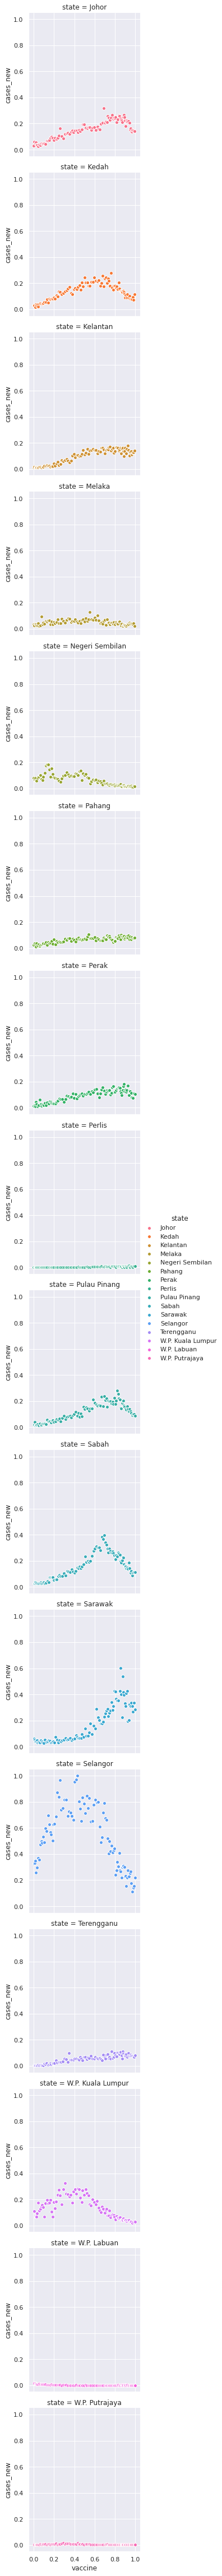

In [ ]:
# Form a facetgrid using columns with a hue
state = ['Johor', 'Kedah', 'Kelantan', 'Melaka', 'Negeri Sembilan', 'Pahang', 'Perak', 'Perlis', 'Pulau Pinang', 'Sabah', 'Sarawak', 'Selangor', 'Terengganu', 'W.P. Kuala Lumpur', 'W.P. Labuan', 'W.P. Putrajaya']
sns.set(rc={'figure.figsize':(8,8)})
graph = sns.FacetGrid(df3, row ="state", row_order=state ,hue ="state",height=4, aspect=1)
# map the above form facetgrid with some attributes
graph.map(plt.scatter, "vaccine", "cases_new", edgecolor ="w").add_legend()
# show the states plot and the vacination effect 
plt.show()

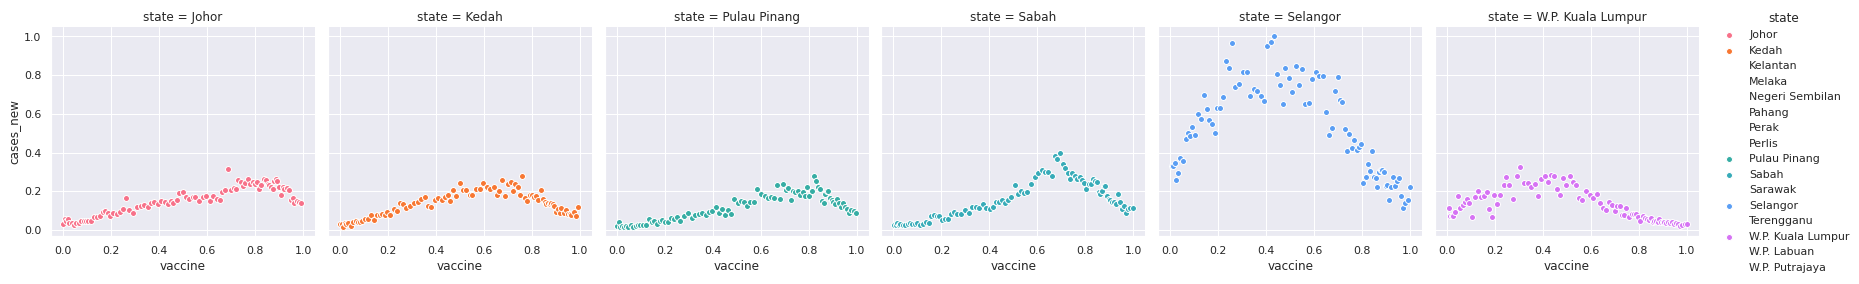

In [ ]:
affective_state = ['Johor', 'Kedah', 'Pulau Pinang', 'Sabah', 'Selangor', 'W.P. Kuala Lumpur']
sns.set(rc={'figure.figsize':(8,8)})
graph = sns.FacetGrid(df3, col ="state", col_order=affective_state ,hue ="state",height=4, aspect=1)
# map the above form facetgrid with some attributes
graph.map(plt.scatter, "vaccine", "cases_new", edgecolor ="w").add_legend()
# show the most affective state by vaccination
plt.show()

Obviously, the states daily new cases that has been affected a lot by vaccination are Johor, Kedah, Pulau Penang, Sabah, Selangor and W.P. KualaLumpur.  The states mentioned are having strong correlation between vaccination and daily new cases for each state from July until September.  Thisis probably related to the population density and the r-naught value of thestates mentioned above.

## Question 2

The filter criteria that we used to determine state that need attention is see if the  average  of  daily  newcovid-19 cases and daily new deaths due to covid-19 that is higher than the median  new  cases  and  deaths  in  Malaysia.

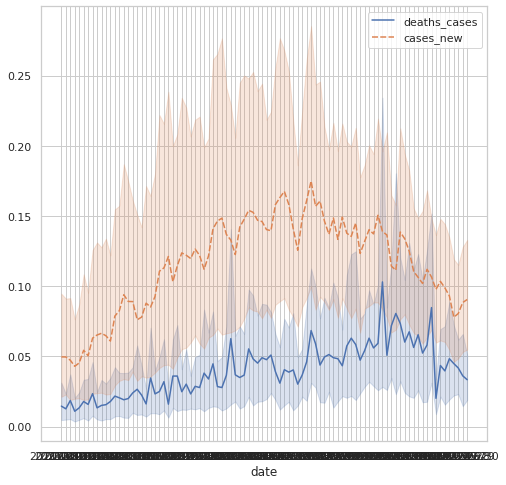

In [ ]:
dc = pd.DataFrame()
dc['deaths_cases'] = state_death_df.deaths_new
dc =(dc-dc.min())/(dc.max()-dc.min())
dc['date'] = state_death_df.date
dc['state'] = state_death_df.state
dc.set_index('date',inplace=True)

nc_dc = pd.concat([dc, df2], axis=1)
mean = nc_dc.groupby('state').mean()
sns.set(style='whitegrid')
sns.lineplot(data=nc_dc)

#From the graph below we can see that the deaths cases are increasing when the daily new cases are also increasing. 
#Therefore, it is very important to raise everyone's attention to the number of daily new cases and deaths which reflect the mortality rate in covid-19 pandemic.

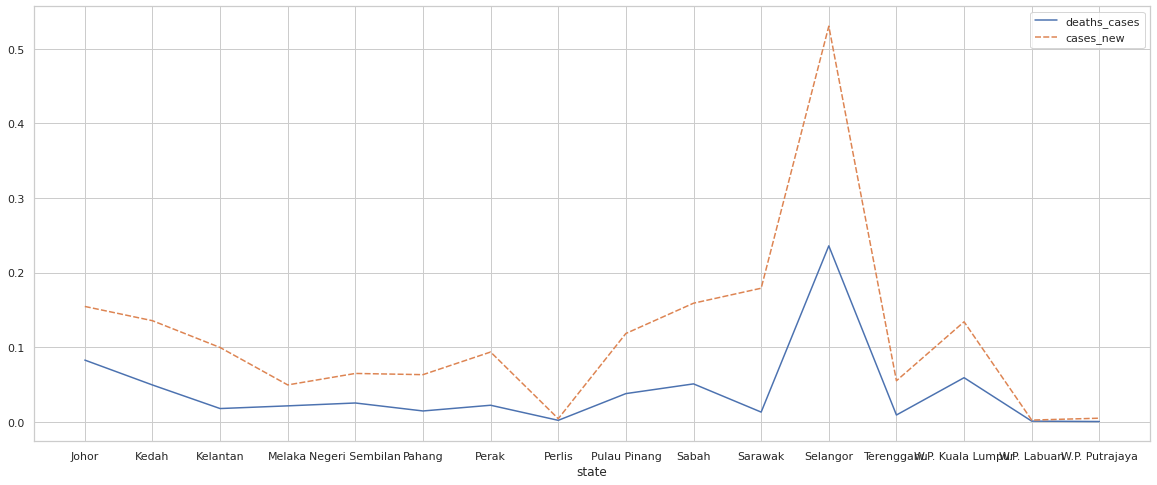

In [ ]:
sns.set(rc={'figure.figsize':(20,8)})
sns.set(style='whitegrid')
sns.lineplot(data=mean)
#From the plot we can see some of the state is having high number of daily new cases as well as deaths, especially Selangor

In [ ]:
mean.loc[(mean['deaths_cases'] >= 0.019) & (mean['cases_new'] >= 0.09)]

deaths_cases  cases_new
state                                     
Johor                  0.082657   0.154564
Kedah                  0.049292   0.135457
Perak                  0.022102   0.093466
Pulau Pinang           0.037726   0.118331
Sabah                  0.050745   0.158899
Selangor               0.235800   0.530263
W.P. Kuala Lumpur      0.059041   0.133993

The  result  states  are  neededand  advised  to  pay  more  attention  by  increasing  the  vaccination  rate  or reinforce the Movement Control Order (MCO). The state residents are alsoneed to increase the awareness on the current covid-19 pandemic situation and infectious disease.

## Question 3

In [ ]:
distinct14 = sns.color_palette(cc.glasbey, n_colors=14)
pkrc_df = pd.read_csv(pkrc_dir)
after_start_date = pkrc_df["date"] >= start_date
before_end_date = pkrc_df["date"] <= end_date
between_two_dates = after_start_date & before_end_date
pkrc_df = pkrc_df.loc[between_two_dates]
pkrc_df.head()

date            state  beds  ...  pkrc_covid  pkrc_pui  pkrc_noncovid
5163  2021-07-01            Johor  2321  ...         964         0              0
5164  2021-07-01            Kedah   540  ...         348         0              0
5165  2021-07-01         Kelantan  2763  ...         638        73              0
5166  2021-07-01           Melaka  1662  ...         886         0              0
5167  2021-07-01  Negeri Sembilan  2395  ...        1248         0              0

[5 rows x 12 columns]

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0, 0.5, 'Number of Individuals Admitted to PKRC')

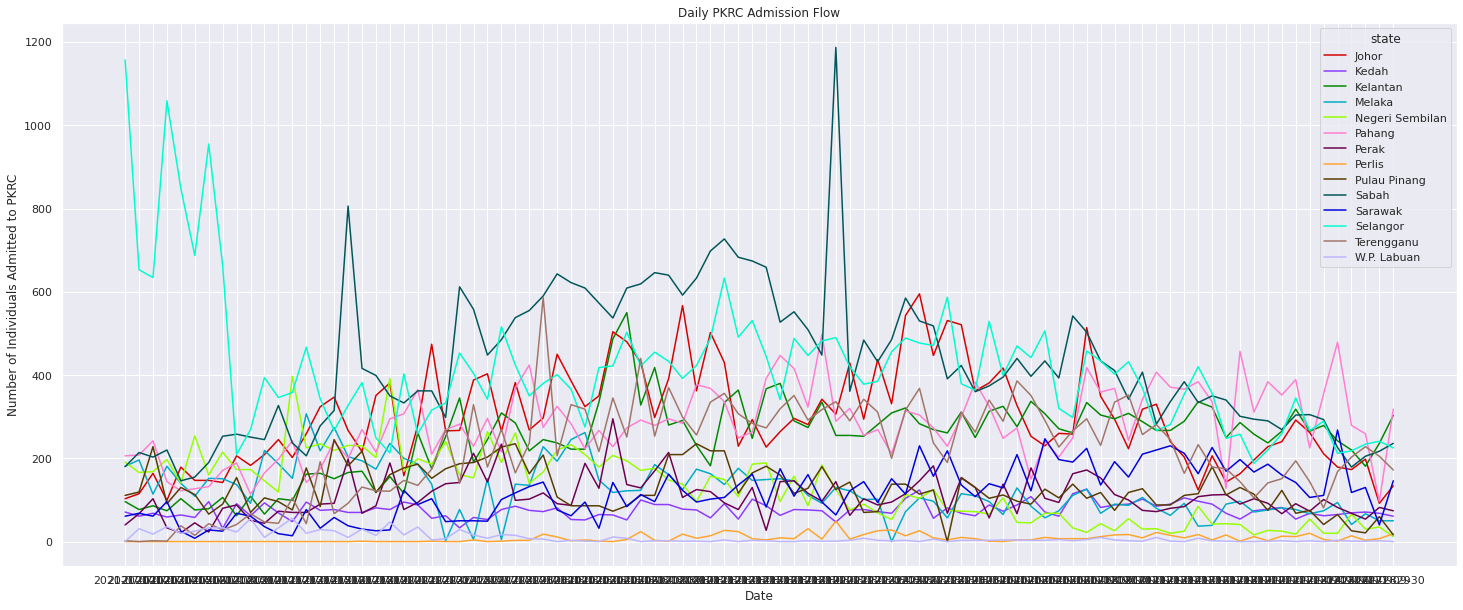

In [ ]:
sns.set(rc={'figure.figsize':(25,10)})
ax = sns.lineplot('date', 'admitted_covid', ci=None, hue='state', data=pkrc_df, palette = distinct14)
ax.set_title('Daily PKRC Admission Flow')
ax.set_xlabel('Date')
ax.set_ylabel('Number of Individuals Admitted to PKRC')

Based on the line graph of daily PKRC admission flow above, we can see that Sabah, Selangor, Johor, and Pahang have higher number of COVID-19 patients admitted to PKRC than other states over the three months. Sabah has the highest number of admitted patients per day. In general, the patients admission rate of each state fluctuated over the three months but has shown a downward trend and lower rate toward September compared to July.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0, 0.5, 'Number of Individuals Discharged from PKRC')

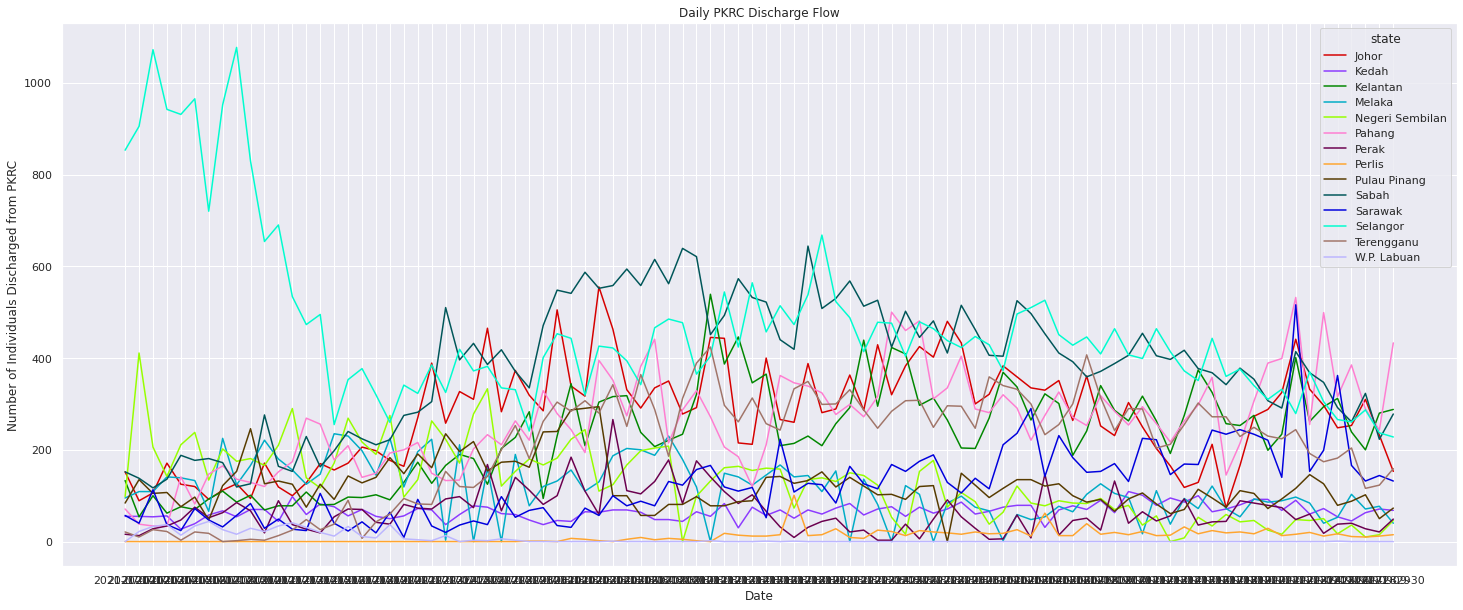

In [ ]:
sns.set(rc={'figure.figsize':(25,10)})
ax = sns.lineplot('date', 'discharge_covid', ci=None, hue='state', data=pkrc_df, palette = distinct14)
ax.set_title('Daily PKRC Discharge Flow')
ax.set_xlabel('Date')
ax.set_ylabel('Number of Individuals Discharged from PKRC')

Based on the line graph of daily PKRC discharge flow above, we can see that Selangor, Sabah, Johor, and Pahang have higher number of COVID-19 patients discharged from PKRC than other states over the three months. This may be because they already have more patients. Selangor has the highest number of discharged patients per day. In general, the patients admission rate of each state fluctuated over the three months and has similar pattern to the admission rate.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0, 0.5, 'Number of Individuals in PKRC')

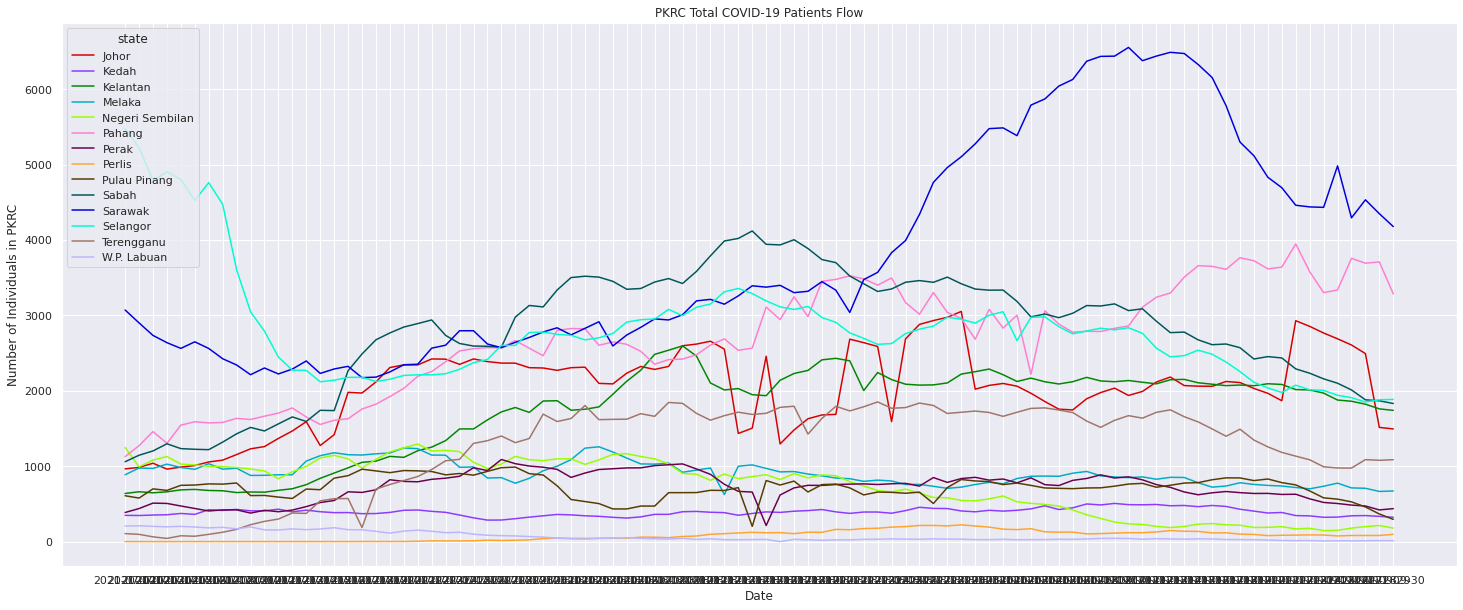

In [ ]:
sns.set(rc={'figure.figsize':(25,10)})
ax = sns.lineplot('date', 'pkrc_covid', ci=None, hue='state', data=pkrc_df, palette = distinct14)
ax.set_title('PKRC Total COVID-19 Patients Flow')
ax.set_xlabel('Date')
ax.set_ylabel('Number of Individuals in PKRC')

Based on the line graph of PKRC total COVID-19 patients flow above, we can see that Sarawak, Pahang, Sabah, and Selangor have higher total number of COVID-19 patients PKRC than other states over the three months. Sarawak has the highest total number of COVID-19 patients PKRC per day. In general, the total number of COVID-19 patients of each state fluctuated over the three months except for Perlis, W.P. Labuan, and Kedah.

**Hospital**

In [ ]:
# 16 states
# Johor, Kedah, Kelantan, Melaka, Negeri Sembilan, Pahang, Perak, Perlis, 
# Pulau Pinang, Sabah, Sarawak, Selangor, Terengganu, W.P. Kuala Lumpur, W.P. Labuan, W.P. Putrajaya
distinct16 = sns.color_palette(cc.glasbey, n_colors=16)
hospital_df = pd.read_csv(hospital_dir)
after_start_date = hospital_df["date"] >= start_date
before_end_date = hospital_df["date"] <= end_date
between_two_dates = after_start_date & before_end_date
hospital_df = hospital_df.loc[between_two_dates]
hospital_df.head()

date            state  beds  ...  hosp_covid  hosp_pui  hosp_noncovid
7011  2021-07-01            Johor  5090  ...         732       233           3051
7012  2021-07-01            Kedah  2755  ...         338         2           1650
7013  2021-07-01         Kelantan  2737  ...         297        18           1439
7014  2021-07-01           Melaka  1101  ...         397        23            579
7015  2021-07-01  Negeri Sembilan  1431  ...         861        12            456

[5 rows x 14 columns]

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0, 0.5, 'Number of Individuals Admitted to Hospital')

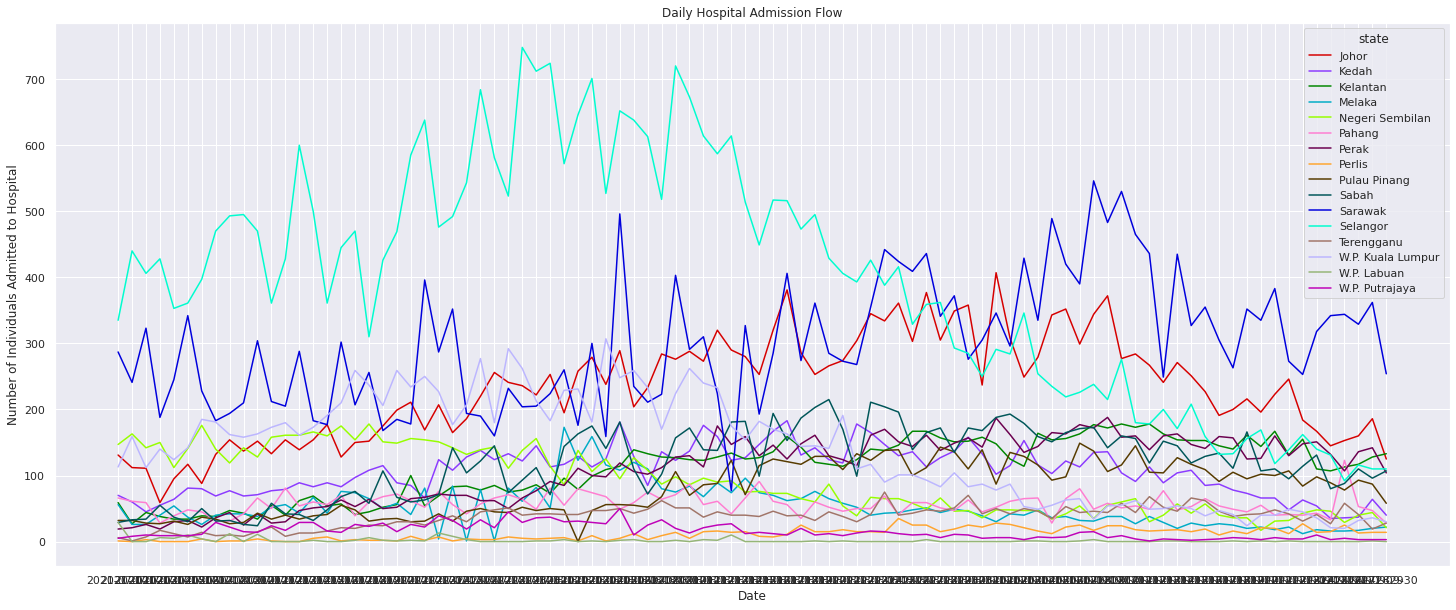

In [ ]:
sns.set(rc={'figure.figsize':(25,10)})
ax = sns.lineplot('date', 'admitted_covid', ci=None, hue='state', data=hospital_df, palette = distinct16)
ax.set_title('Daily Hospital Admission Flow')
ax.set_xlabel('Date')
ax.set_ylabel('Number of Individuals Admitted to Hospital')

Based on the line graph of daily hospital admission flow above, we can see that Selangor, Sarawak, and Johor have higher number of COVID-19 patients admitted to hospital than other states over the three months. Selangor has the highest number of admitted patients per day. These 3 states are now declining toward September while other states maintain the steady rate for the daily number of patients admitted.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0, 0.5, 'Number of Individuals Discharged from Hospital')

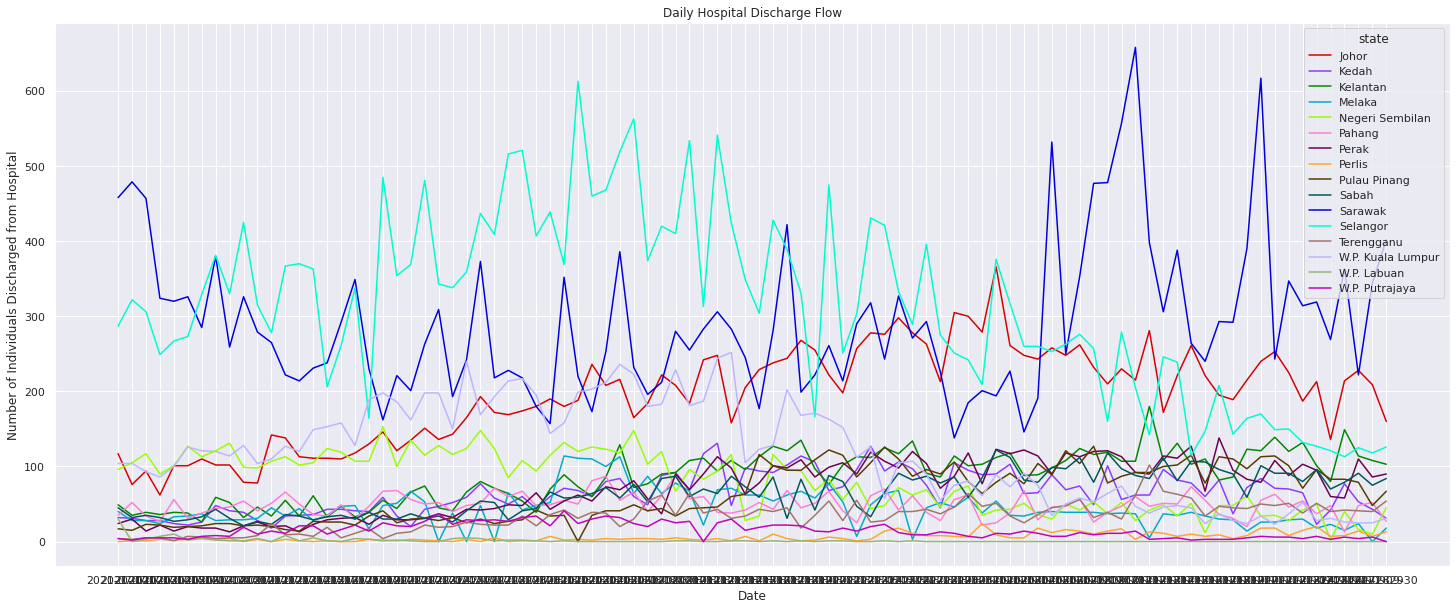

In [ ]:
sns.set(rc={'figure.figsize':(25,10)})
ax = sns.lineplot('date', 'discharged_covid', ci=None, hue='state', data=hospital_df, palette = distinct16)
ax.set_title('Daily Hospital Discharge Flow')
ax.set_xlabel('Date')
ax.set_ylabel('Number of Individuals Discharged from Hospital')

Based on the line graph of daily hospital discharge flow above, we can see that Selangor, Sarawak, and Johor have higher number of COVID-19 patients discharged from hospital than other states over the three months. This may be because they already have more patients. Sarawak has the highest number of discharged patients per day. In general, the patients admission rate of each state fluctuated over the three months and has similar pattern to the admission rate.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0, 0.5, 'Number of Individuals in Hospital')

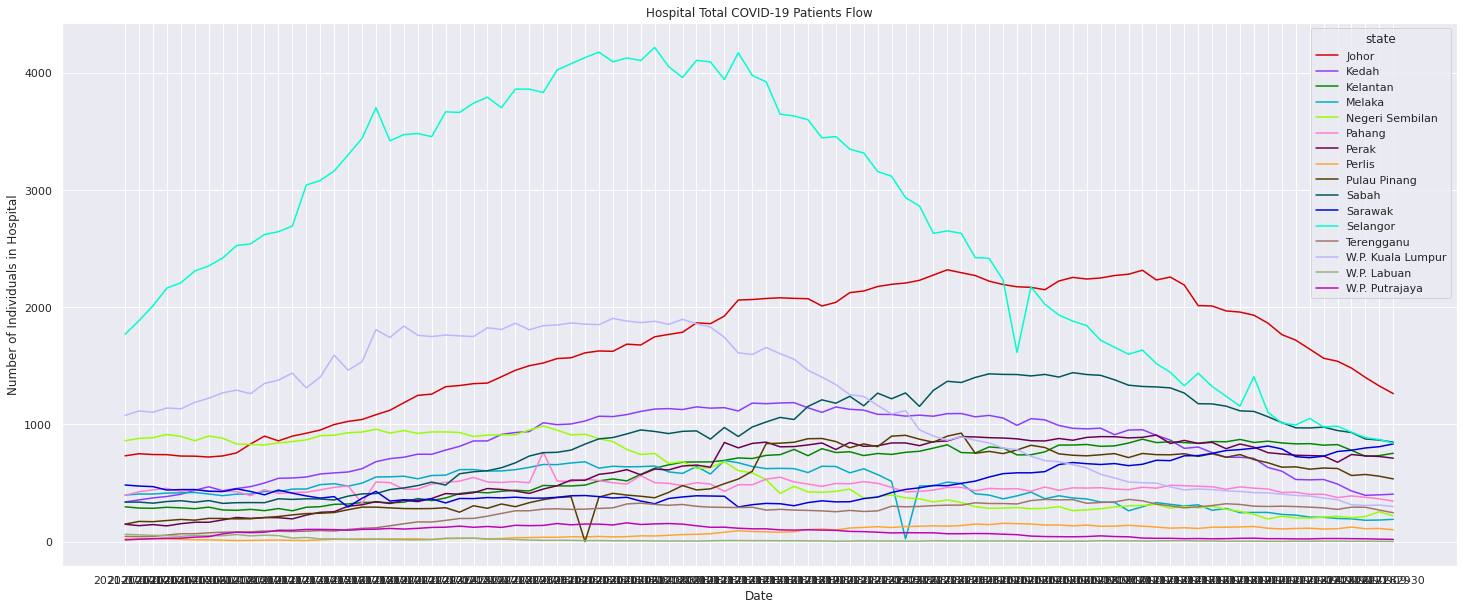

In [ ]:
sns.set(rc={'figure.figsize':(25,10)})
ax = sns.lineplot('date', 'hosp_covid', ci=None, hue='state', data=hospital_df, palette = distinct16)
ax.set_title('Hospital Total COVID-19 Patients Flow')
ax.set_xlabel('Date')
ax.set_ylabel('Number of Individuals in Hospital')

Based on the line graph of hospital total COVID-19 patients flow above, we can see that Selangor and Johor have higher total number of COVID-19 patients PKRC than other states over the three months. W.P. Kuala Lumpur has higher total patients until mid of August than other states, and starts to drop visibly toward September. Selangor has the highest total number of COVID-19 patients hospital per day. In general, the total number of COVID-19 patients of each state fluctuated over the three months except for Perlis, W.P. Putrajaya, and W.P. Labuan.



**ICU**

In [ ]:
# 16 states
# Johor, Kedah, Kelantan, Melaka, Negeri Sembilan, Pahang, Perak, Perlis, 
# Pulau Pinang, Sabah, Sarawak, Selangor, Terengganu, W.P. Kuala Lumpur, W.P. Labuan, W.P. Putrajaya
icu_df = pd.read_csv(icu_dir)
after_start_date = icu_df["date"] >= start_date
before_end_date = icu_df["date"] <= end_date
between_two_dates = after_start_date & before_end_date
icu_df = icu_df.loc[between_two_dates]
icu_df.head()

date            state  ...  vent_used  vent_port_used
7031  2021-07-01            Johor  ...        148               0
7032  2021-07-01            Kedah  ...        125               0
7033  2021-07-01         Kelantan  ...         85               0
7034  2021-07-01           Melaka  ...         31               0
7035  2021-07-01  Negeri Sembilan  ...         84               0

[5 rows x 16 columns]

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0, 0.5, 'Number of Individuals under Intensive Care')

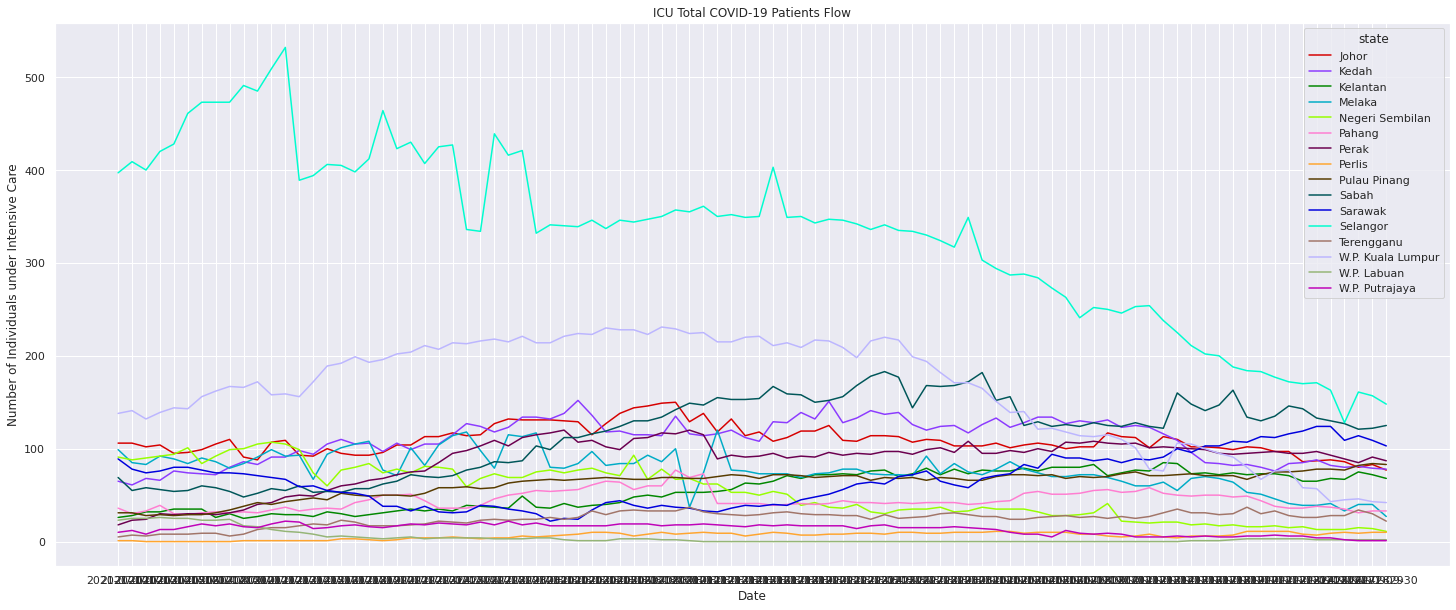

In [ ]:
sns.set(rc={'figure.figsize':(25,10)})
ax = sns.lineplot('date', 'icu_covid', ci=None, hue='state', data=icu_df, palette = distinct16)
ax.set_title('ICU Total COVID-19 Patients Flow')
ax.set_xlabel('Date')
ax.set_ylabel('Number of Individuals under Intensive Care')

Based on the line graph of daily ICU total COVID-19 patients flow above, we can see that Selangor has a overwhelming higher number of COVID-19 patients admitted to ICU than other states over the three months. Selangor also has the highest number of admitted patients per day. In general, the total number of ICU COVID-19 patients of all states are now dropping or staying steady toward September except Sabah.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0, 0.5, 'Number of Individuals on Mechanical Ventilation under Intensive Care')

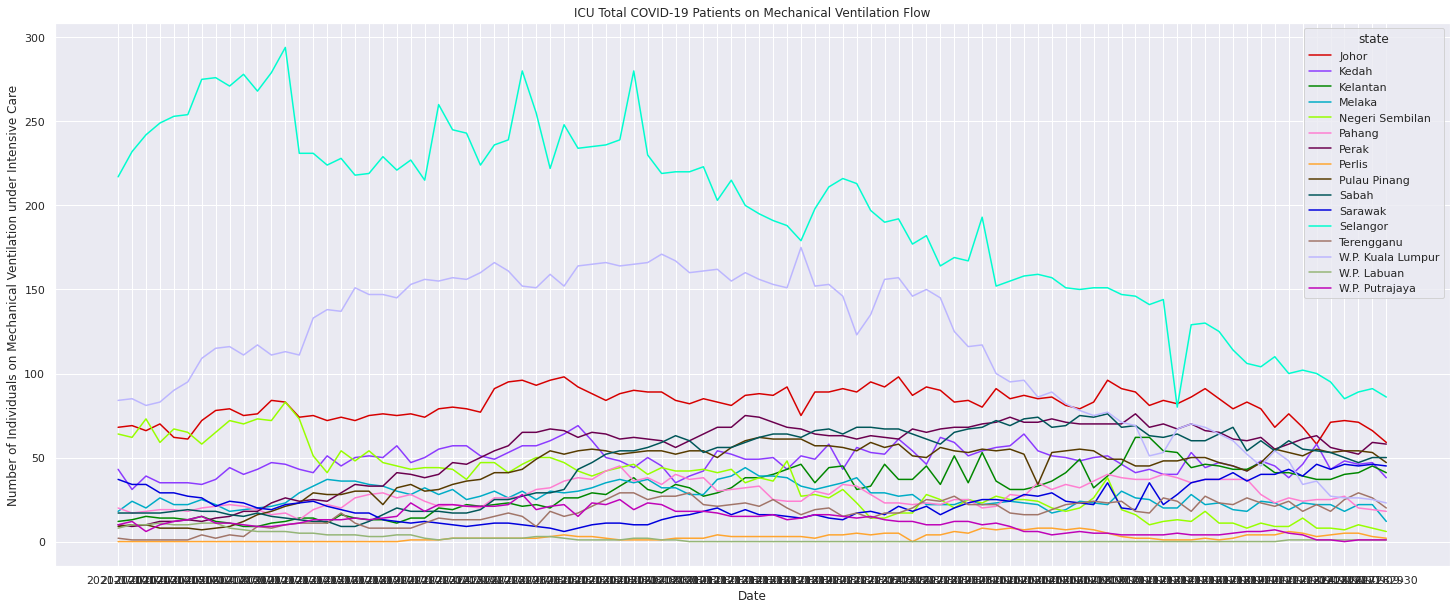

In [ ]:
sns.set(rc={'figure.figsize':(25,10)})
ax = sns.lineplot('date', 'vent_covid', ci=None, hue='state', data=icu_df, palette = distinct16)
ax.set_title('ICU Total COVID-19 Patients on Mechanical Ventilation Flow')
ax.set_xlabel('Date')
ax.set_ylabel('Number of Individuals on Mechanical Ventilation under Intensive Care')

Based on the line graph of daily ICU total COVID-19 patient on mechanical ventilation flow above, we can see that Selangor and W.P. Kuala Lumpur have higher number of COVID-19 patients needed the ventilator assistance than other states over the three months. Selangor has the highest number of patients on ventilation per day. In general, the patients admission rate of each state fluctuated over the three months and remained steady whereas Selangor and W.P. Kuala Lumpur are now declining toward September.

In conclusion, according to the graphs above, the states that require more attention are Selangor,Johor, Sabah, W.P. Kuala Lumpus, Sarawak, and Pahang. Although the reasons behind them having more patients may be because they have more population, it is still obvious that they need more attention from government to put in efforts and works to improve the situation.

## Question 4

In [ ]:
state_registration_df_copy = state_registration_df.copy()
state_registration_df_copy.drop(state_registration_df_copy.columns.difference(['date','state','total']), 1, inplace=True)
state_registration_df_copy['date'] = pd.to_datetime(state_registration_df_copy['date'], format = '%Y-%m-%d')
state_registration_df_copy.head()

date            state    total
112 2021-07-01            Johor  2129303
113 2021-07-01            Kedah   978855
114 2021-07-01         Kelantan   648221
115 2021-07-01           Melaka   536340
116 2021-07-01  Negeri Sembilan   664022

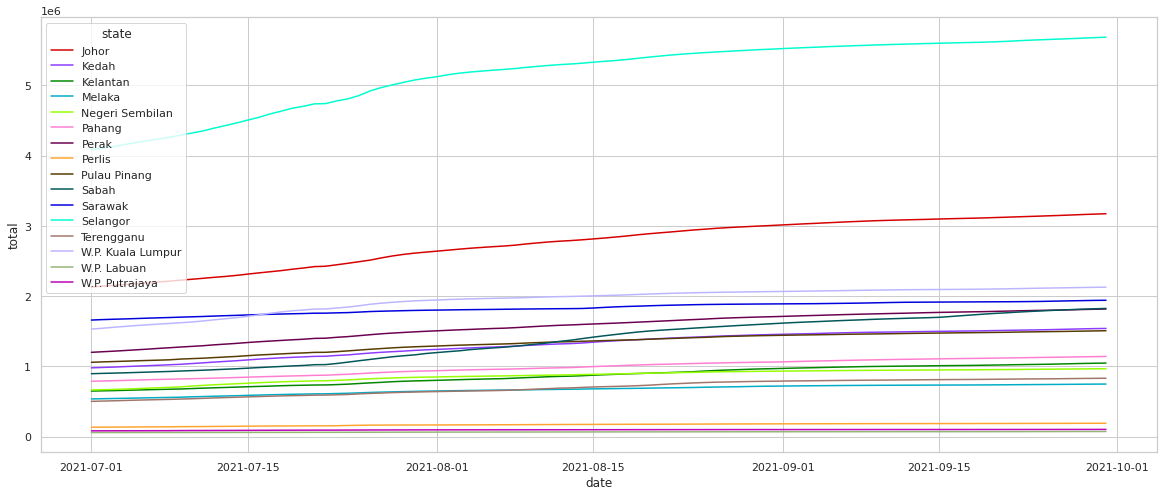

In [ ]:
sns.set(rc={'figure.figsize':(20,8)})
sns.set(style='whitegrid')
distinct16 = sns.color_palette(cc.glasbey, n_colors=16)
sns.lineplot(data=state_registration_df_copy, x="date", y="total", hue="state",palette = distinct16)


From the chart, it can be seen that the selangor has been the top in the population of registered citizens. It might because the people lived in Selangor are having more accurate information about vaccine and more educated.

In [ ]:
state_vaccination_df_copy = state_vaccination_df.copy()
state_vaccination_df_copy.drop(state_vaccination_df_copy.columns.difference(['date','state','daily']), 1, inplace=True)
state_vaccination_df_copy['date'] = pd.to_datetime(state_vaccination_df_copy['date'], format = '%Y-%m-%d')
state_vaccination_df_copy.head()

date            state  daily
2032 2021-07-01            Johor  19432
2033 2021-07-01            Kedah   9781
2034 2021-07-01         Kelantan   9659
2035 2021-07-01           Melaka   7765
2036 2021-07-01  Negeri Sembilan  11010

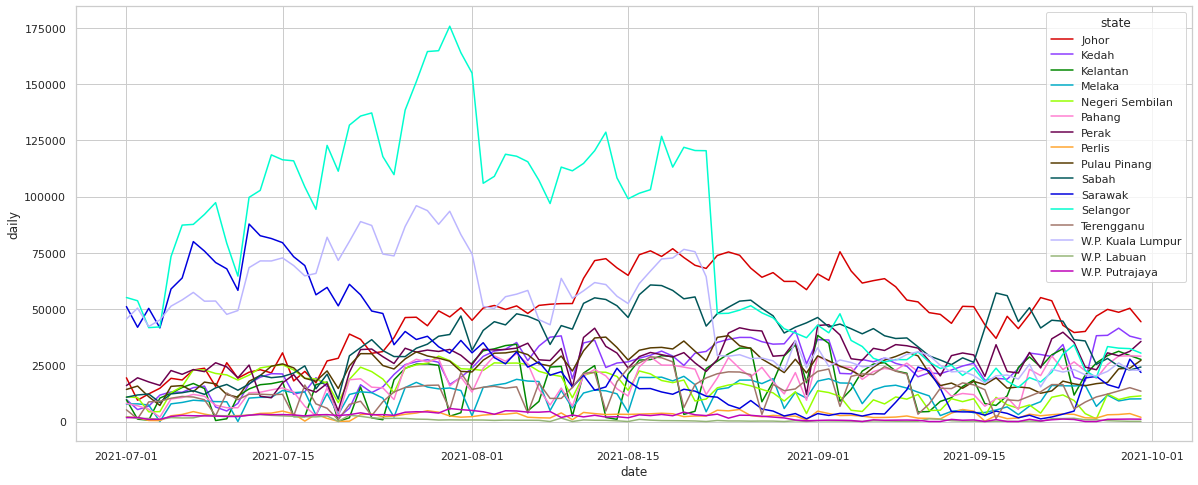

In [ ]:
sns.set(rc={'figure.figsize':(20,8)})
sns.set(style='whitegrid')
distinct16 = sns.color_palette(cc.glasbey, n_colors=16)
sns.lineplot(data=state_vaccination_df_copy, x="date", y="daily", hue="state",palette = distinct16)


From the chart, we can see the Selangor had been the top before September in daily new vaccination but there is a sudden drop before entered September. It might be becuase of the government was having several vaccination boost plan in Selangor before September and most of the citizens were fully vaccinated before September. 

## Question 5

In [ ]:
malaysia_r_naught_df = r_naught_df.copy()
=malaysia_r_naught_df['date'] = pd.to_datetime(malaysia_r_naught_df['date'], format = '%Y-%m-%d')
malaysia_r_naught_df.set_index('date', inplace=True)

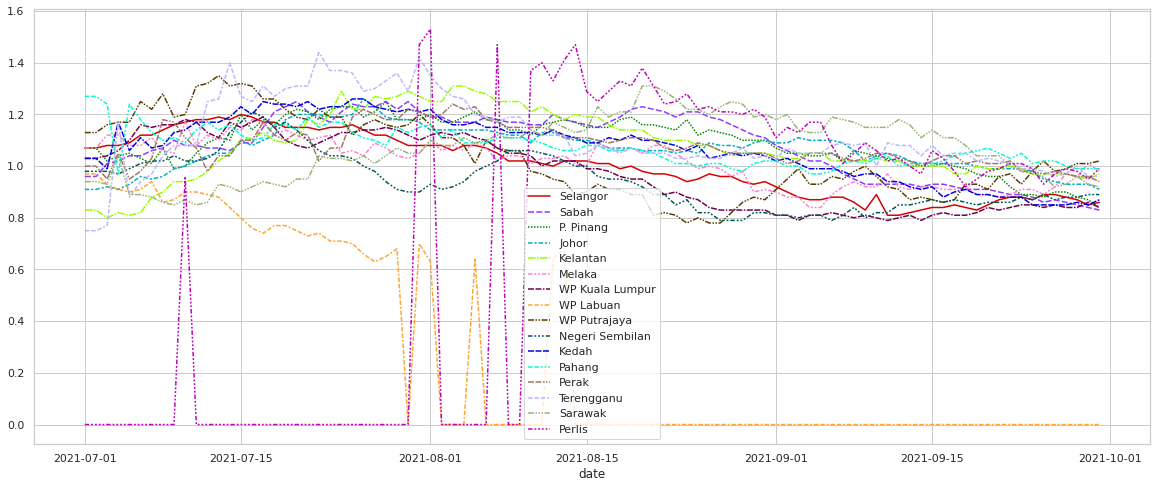

In [ ]:
distinct16 = sns.color_palette(cc.glasbey, n_colors=16)
sns.lineplot(data=malaysia_r_naught_df.drop(columns=['Malaysia']), palette = distinct16)

## Question 6

**Malaysia Overall Trends**

Malaysia Google trends data meaning and description:
* Showing interest over time
* Numbers represent search interest relative to the highest point on the chart for the given region and time.
* A value of 100 is the peak popularity for the term. A value of 50 means that the term is half as popular. 
* A score of 0 means there was not enough data for this term.

In [ ]:
malaysia_trends_coronavirus_df = pd.read_csv(malaysia_trends_coronavirus_dir)
malaysia_trends_coronavirus_df['Date'] = pd.to_datetime(malaysia_trends_coronavirus_df['Date'], format='%d/%m/%Y')
malaysia_trends_coronavirus_df.head()

Date  Interest Score
0 2020-10-25              36
1 2020-11-01              33
2 2020-11-08              31
3 2020-11-15              30
4 2020-11-22              28

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0, 0.5, 'Interest Score')

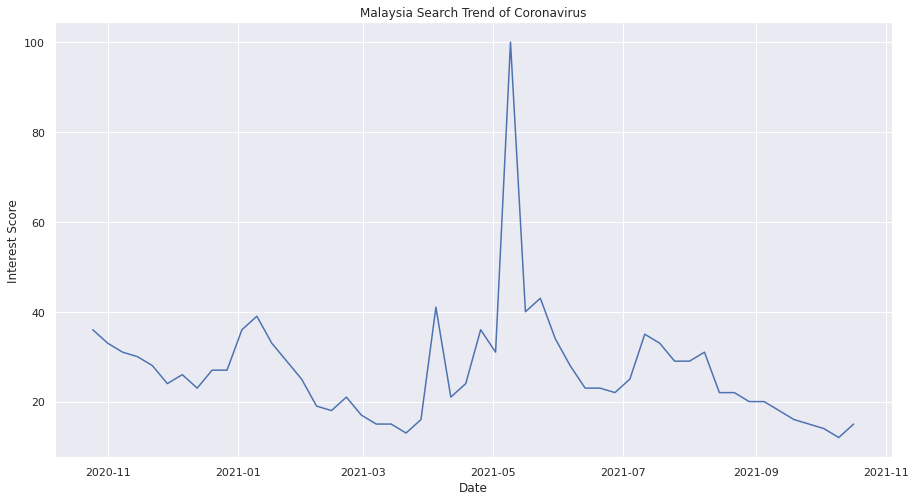

In [ ]:
sns.set(rc={'figure.figsize':(15,8)})
x = malaysia_trends_coronavirus_df['Date']
y = malaysia_trends_coronavirus_df['Interest Score']
ax = sns.lineplot(x,y)
ax.set_title("Malaysia Search Trend of Coronavirus")
ax.set_xlabel("Date")
ax.set_ylabel("Interest Score")

Based on the graph above, we can see that the search trend fluctuated over the one year (20th Oct 2020 - 20th Oct 2021), people living in Malaysia searched about "coronavirus" the most around the May of 2021. It is noticeable that people's interest in coronavirus/COVID-19 will be higher when the confirmed cases are higher because people will like to know the details of the recent situation even more.

In [ ]:
malaysia_trends_vaccine_comparison_df = pd.read_csv(malaysia_trends_vaccine_comparison_dir)
malaysia_trends_vaccine_comparison_df['Date'] = pd.to_datetime(malaysia_trends_vaccine_comparison_df['Date'], format='%d/%m/%Y')
malaysia_trends_vaccine_comparison_df.head()

Date  ...  Interest Score (Pfizer)
0 2020-10-25  ...                      0.5
1 2020-11-01  ...                      0.5
2 2020-11-08  ...                      6.0
3 2020-11-15  ...                      3.0
4 2020-11-22  ...                      2.0

[5 rows x 6 columns]

/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:3775: UserWarning: catplot is a figure-level function and does not accept target axes. You may wish to try pointplot
  warnings.warn(msg, UserWarning)


Text(0.5, 0.98, 'Malaysia Search Trend of Different Vaccines')

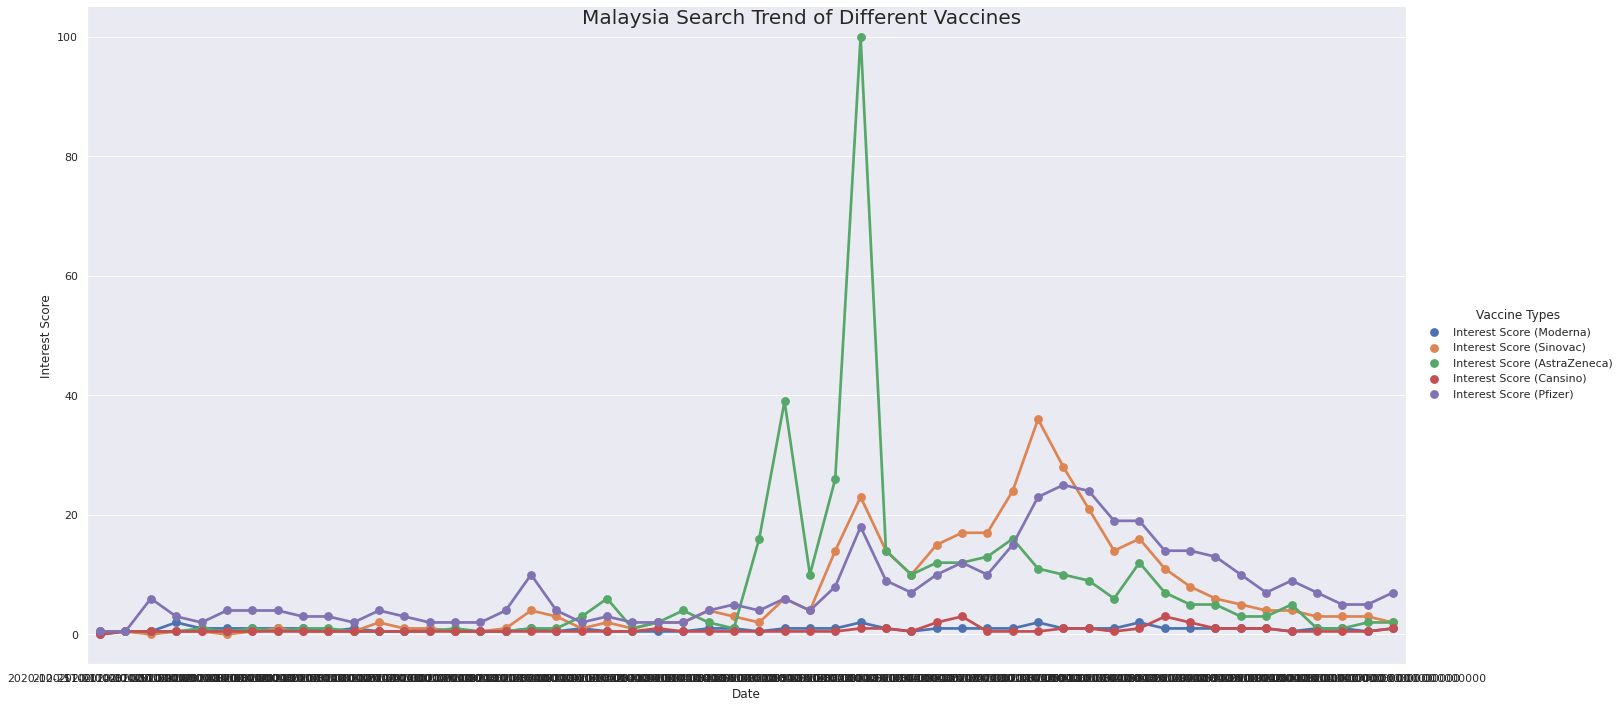

In [ ]:
melted_df = malaysia_trends_vaccine_comparison_df.melt('Date', var_name='Vaccine Types',  value_name='Interest Score')
ax = sns.catplot(ax=ax, x="Date", y="Interest Score", hue='Vaccine Types', data=melted_df, ci=None, kind='point',height=10,aspect=2)
ax.fig.suptitle("Malaysia Search Trend of Different Vaccines",fontsize=20, fontdict={"weight": "bold"})

Based on the graph above, we can see that the overall search trend for 5 types of vaccines: Moderna, Sinovac, AstraZeneca, Cansino, and Pfizer in one year span. We noticed that most poeple were interested in AstraZeneca vaccines, followed by Sinovac vaccines and Pfizer vaccines. There were less interest towards Moderna and Cansino vaccines. This may be due to the different quantities of each type of vaccine imported and used by the Malaysia government.

**Malaysia States Trends**

States Google trends data meaning and description:
* Showing interest by subregion
* See in which location your term was most popular during the specified time frame.
* Values are calculated on a scale from 0 to 100, where 100 is the location with the most popularity as a fraction of total searches in that location, a value of 50 indicates a location which is half as popular. 
* A value of 0 indicates a location where there was not enough data for this term.
* Note: A higher value means a higher proportion of all queries, not a higher absolute query count. 
* So a tiny country where 80% of the queries are for "bananas" will get twice the score of a giant country where only 40% of the queries are for "bananas".

Astraneca

In [ ]:
states_trends_astrazeneca_df =  pd.read_csv(states_trends_astrazeneca_dir)
states_trends_astrazeneca_df

State  Interest Score
0            Selangor             100
1        Pulau Pinang              79
2   W.P. Kuala Lumpur              77
3      W.P. Putrajaya              64
4               Johor              52
5             Sarawak              43
6     Negeri Sembilan              40
7               Perak              37
8              Melaka              36
9               Kedah              30
10             Pahang              26
11           Kelantan              26
12              Sabah              26
13         Terengganu              25
14             Perlis              20
15        W.P. Labuan               8

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0, 0.5, 'Interest Score')

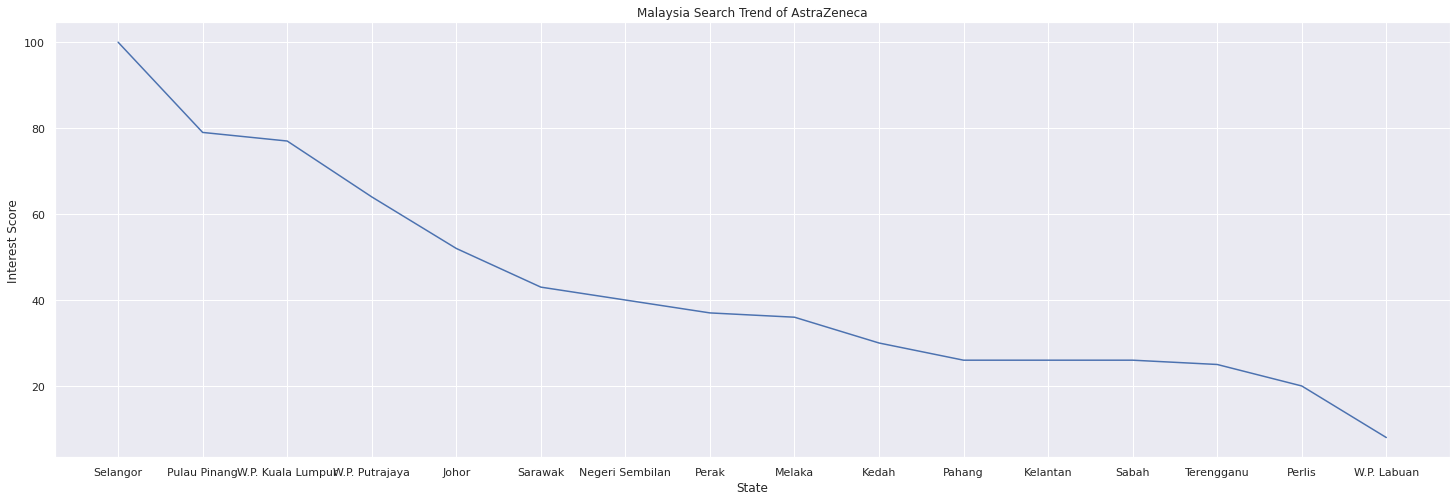

In [ ]:
sns.set(rc={'figure.figsize':(25,8)})
x = states_trends_astrazeneca_df['State']
y = states_trends_astrazeneca_df['Interest Score']
ax = sns.lineplot(x,y)
ax.set_title("Malaysia Search Trend of AstraZeneca")
ax.set_xlabel("State")
ax.set_ylabel("Interest Score")

The graph above showed that Selangor and W.P. Labuan has searched the keyword "AstraZeneca" the most and the least respectively.

**Cansino**

In [ ]:
states_trends_cansino_df =  pd.read_csv(states_trends_cansino_dir)
states_trends_cansino_df

State  Interest Score
0               Sabah             100
1               Perak              58
2   W.P. Kuala Lumpur              53
3             Sarawak              45
4        Pulau Pinang              45
5            Selangor              37
6     Negeri Sembilan              34
7               Johor              32
8              Pahang              28
9            Kelantan              24
10              Kedah              23
11             Melaka              21
12         Terengganu              20
13     W.P. Putrajaya              17
14             Perlis               0
15        W.P. Labuan               0

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0, 0.5, 'Interest Score')

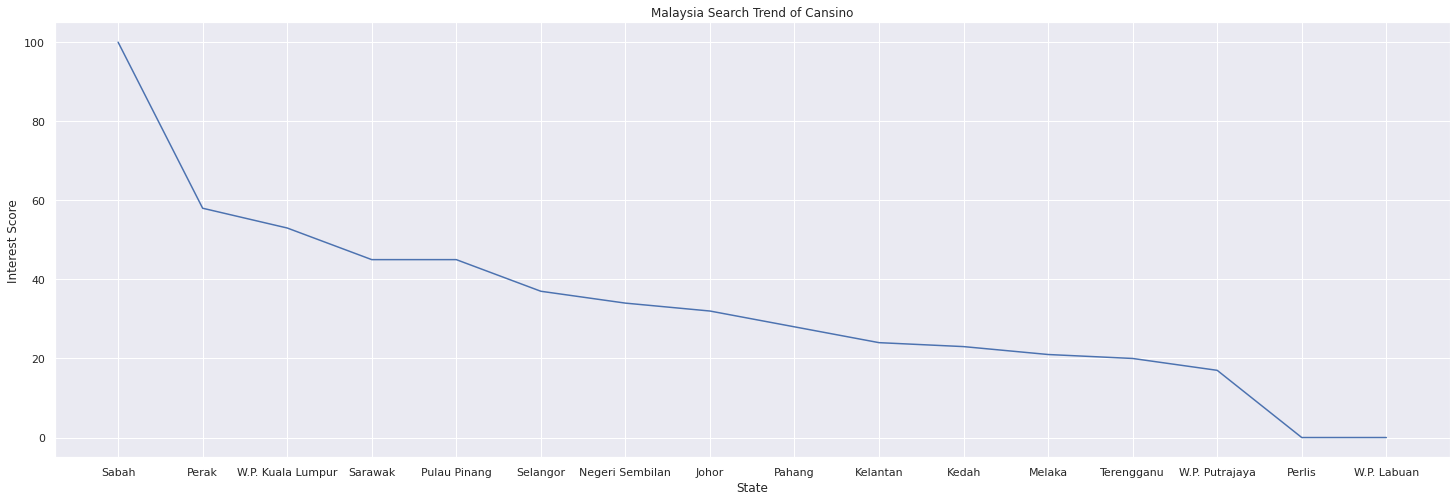

In [ ]:
sns.set(rc={'figure.figsize':(25,8)})
x = states_trends_cansino_df['State']
y = states_trends_cansino_df['Interest Score']
ax = sns.lineplot(x,y)
ax.set_title("Malaysia Search Trend of Cansino")
ax.set_xlabel("State")
ax.set_ylabel("Interest Score")

The graph above showed that Sabah and W.P. Labuan has searched the keyword "Cansino" the most and the least respectively.

**Moderna**

In [ ]:
states_trends_moderna_df =  pd.read_csv(states_trends_moderna_dir)
states_trends_moderna_df

State  Interest Score
0        Pulau Pinang             100
1            Selangor              80
2   W.P. Kuala Lumpur              78
3              Melaka              73
4               Johor              73
5               Perak              52
6               Sabah              38
7             Sarawak              36
8     Negeri Sembilan              30
9      W.P. Putrajaya              29
10         Terengganu              27
11           Kelantan              17
12             Pahang              15
13              Kedah              14
14             Perlis               0
15        W.P. Labuan               0

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0, 0.5, 'Interest Score')

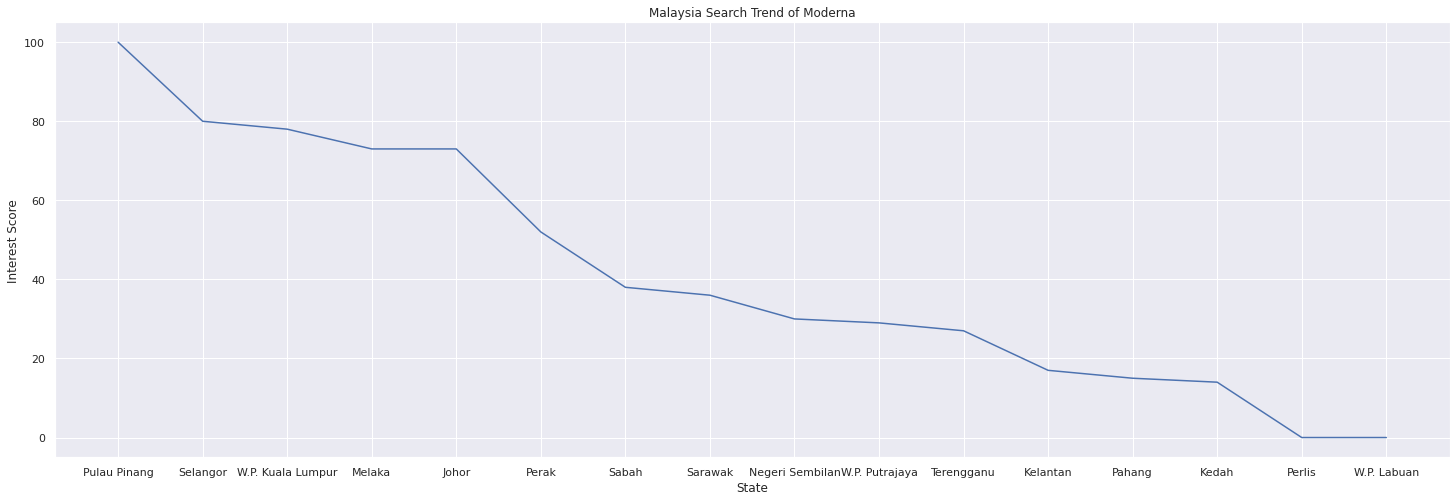

In [ ]:
sns.set(rc={'figure.figsize':(25,8)})
x = states_trends_moderna_df['State']
y = states_trends_moderna_df['Interest Score']
ax = sns.lineplot(x,y)
ax.set_title("Malaysia Search Trend of Moderna")
ax.set_xlabel("State")
ax.set_ylabel("Interest Score")

The graph above showed that Pulau Pinang and W.P. Labuan has searched the keyword "Moderna" the most and the least respectively.

**Pfizer**

In [ ]:
states_trends_pfizer_df =  pd.read_csv(states_trends_pfizer_dir)
states_trends_pfizer_df

State  Interest Score
0        Pulau Pinang             100
1            Selangor              93
2      W.P. Putrajaya              89
3     Negeri Sembilan              88
4   W.P. Kuala Lumpur              81
5               Sabah              79
6               Perak              79
7         W.P. Labuan              76
8               Johor              76
9               Kedah              71
10             Melaka              71
11            Sarawak              66
12             Pahang              65
13         Terengganu              65
14             Perlis              59
15           Kelantan              49

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0, 0.5, 'Interest Score')

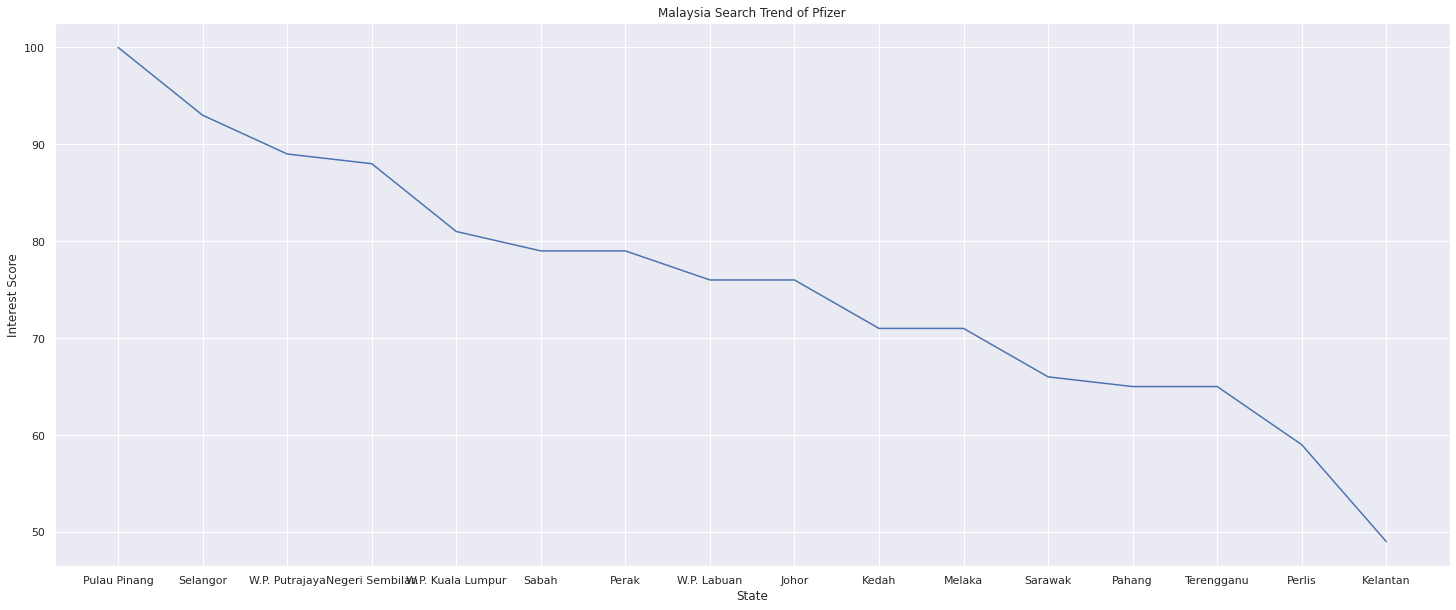

In [ ]:
sns.set(rc={'figure.figsize':(25,10)})
x = states_trends_pfizer_df['State']
y = states_trends_pfizer_df['Interest Score']
ax = sns.lineplot(x,y)
ax.set_title("Malaysia Search Trend of Pfizer")
ax.set_xlabel("State")
ax.set_ylabel("Interest Score")

The graph above showed that Pulau Pinang and Kelantan has searched the keyword "Pfizer" the most and the least respectively.

**Sinovac**

In [ ]:
states_trends_sinovac_df =  pd.read_csv(states_trends_sinovac_dir)
states_trends_sinovac_df

State  Interest Score
0            Selangor             100
1        Pulau Pinang              89
2   W.P. Kuala Lumpur              74
3             Sarawak              72
4              Melaka              72
5     Negeri Sembilan              67
6               Johor              62
7               Sabah              61
8               Perak              57
9          Terengganu              55
10              Kedah              54
11             Pahang              49
12     W.P. Putrajaya              46
13        W.P. Labuan              42
14           Kelantan              41
15             Perlis              30

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0, 0.5, 'Interest Score')

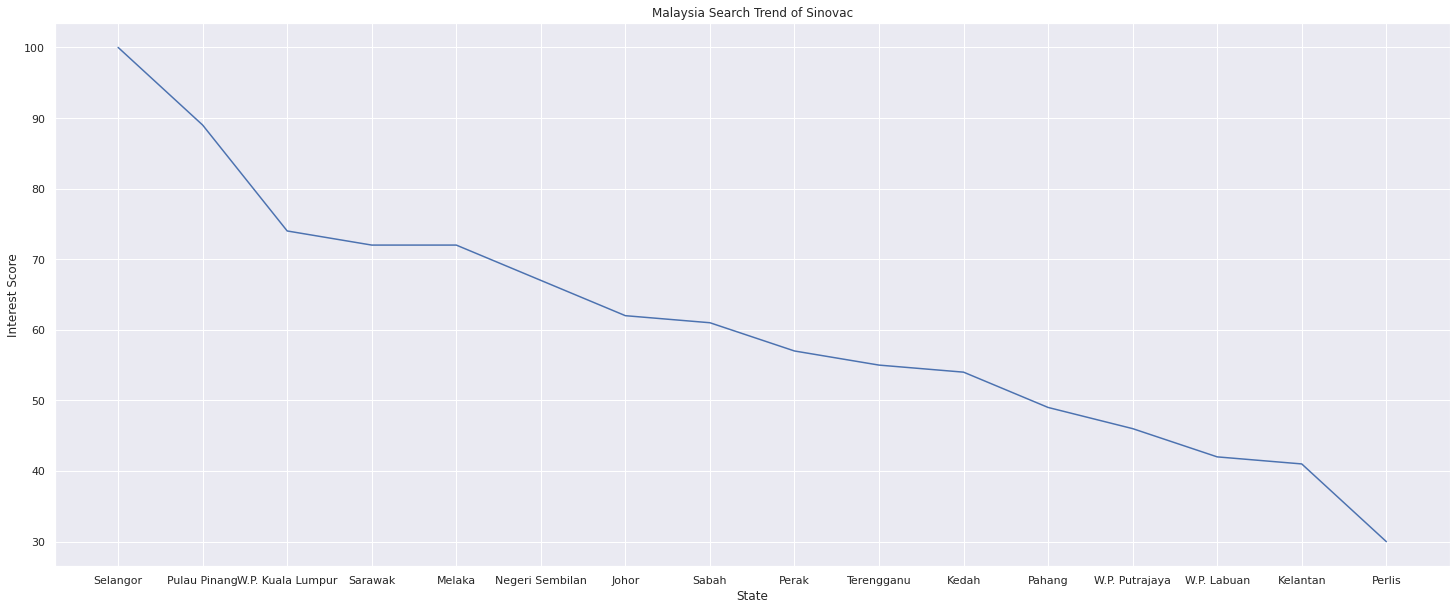

In [ ]:
sns.set(rc={'figure.figsize':(25,10)})
x = states_trends_sinovac_df['State']
y = states_trends_sinovac_df['Interest Score']
ax = sns.lineplot(x,y)
ax.set_title("Malaysia Search Trend of Sinovac")
ax.set_xlabel("State")
ax.set_ylabel("Interest Score")

**Symptoms**

In [ ]:
states_trends_symptoms_df =  pd.read_csv(states_trends_symptoms_dir)
states_trends_symptoms_df

State  Interest Score
0               Johor             100
1        Pulau Pinang              93
2     Negeri Sembilan              85
3             Sarawak              78
4               Perak              71
5               Kedah              67
6               Sabah              60
7              Pahang              60
8            Selangor              51
9              Melaka              49
10           Kelantan              49
11  W.P. Kuala Lumpur              47
12         Terengganu               9
13        W.P. Labuan               0
14     W.P. Putrajaya               0
15             Perlis               0

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0, 0.5, 'Interest Score')

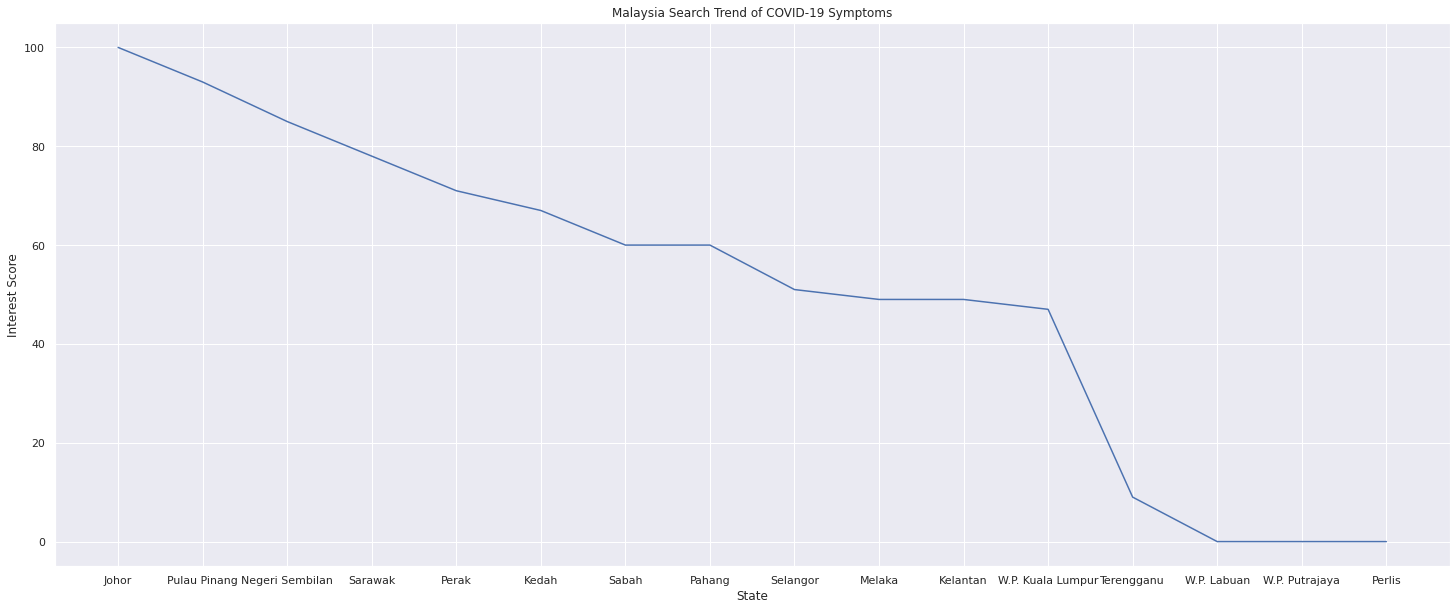

In [ ]:
sns.set(rc={'figure.figsize':(25,10)})
x = states_trends_symptoms_df['State']
y = states_trends_symptoms_df['Interest Score']
ax = sns.lineplot(x,y)
ax.set_title("Malaysia Search Trend of COVID-19 Symptoms")
ax.set_xlabel("State")
ax.set_ylabel("Interest Score")

The graph above showed that Johor and Perlis has searched the keyword "Covid Symptoms" the most and the least respectively

**Vaccine**

In [ ]:
states_trends_vaccine_df =  pd.read_csv(states_trends_vaccine_dir)
states_trends_vaccine_df

State  Interest Score
0            Selangor             100
1        Pulau Pinang              94
2   W.P. Kuala Lumpur              92
3               Johor              82
4     Negeri Sembilan              81
5             Sarawak              78
6              Melaka              78
7      W.P. Putrajaya              76
8              Pahang              75
9               Sabah              75
10              Kedah              74
11             Perlis              74
12              Perak              72
13           Kelantan              70
14         Terengganu              69
15        W.P. Labuan              50

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0, 0.5, 'Interest Score')

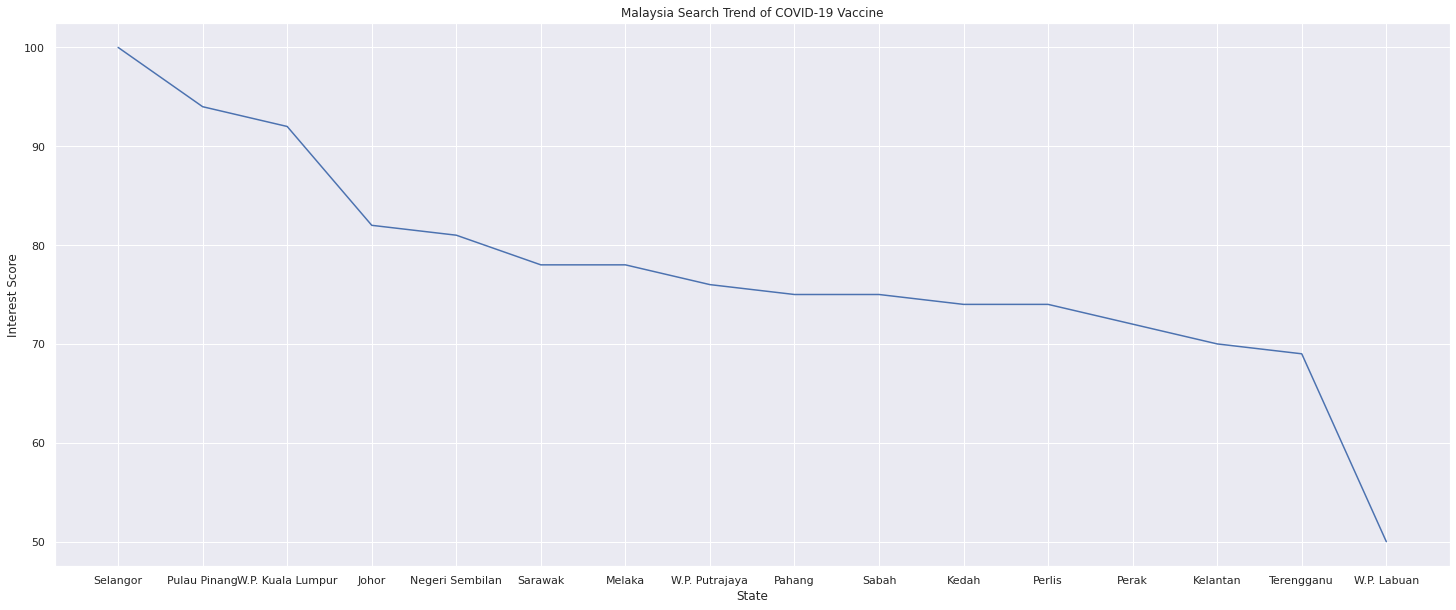

In [ ]:
sns.set(rc={'figure.figsize':(25,10)})
x = states_trends_vaccine_df['State']
y = states_trends_vaccine_df['Interest Score']
ax = sns.lineplot(x,y)
ax.set_title("Malaysia Search Trend of COVID-19 Vaccine")
ax.set_xlabel("State")
ax.set_ylabel("Interest Score")

The graph above showed that Selangor and W.P. Labuan has searched the keyword "COVID-19 Vaccine" the most and the least respectively.

**Total Interest Score by States**

In [ ]:
df_list = [states_trends_astrazeneca_df,states_trends_cansino_df, 
           states_trends_moderna_df, states_trends_pfizer_df,
           states_trends_sinovac_df, states_trends_symptoms_df, states_trends_vaccine_df]
new_interest_df = df_list[0]
for df_ in df_list[1:]:
    new_interest_df = new_interest_df.merge(df_, on='State')
new_interest_df


State  Interest Score_x  ...  Interest Score_y  Interest Score
0            Selangor               100  ...                51             100
1        Pulau Pinang                79  ...                93              94
2   W.P. Kuala Lumpur                77  ...                47              92
3      W.P. Putrajaya                64  ...                 0              76
4               Johor                52  ...               100              82
5             Sarawak                43  ...                78              78
6     Negeri Sembilan                40  ...                85              81
7               Perak                37  ...                71              72
8              Melaka                36  ...                49              78
9               Kedah                30  ...                67              74
10             Pahang                26  ...                60              75
11           Kelantan                26  ...                49              70
12              Sabah                26  ...                60              75
13         Terengganu                25  ...                 9              69
14             Perlis                20  ...                 0              74
15        W.P. Labuan                 8  ...                 0              50

[16 rows x 8 columns]

In [ ]:
new_interest_df.set_index('State')
new_interest_df['Total Interest Score'] = new_interest_df['Total Interest Score'] = new_interest_df.sum(axis=1)
new_interest_df

State  Interest Score_x  ...  Interest Score  Total Interest Score
0            Selangor               100  ...             100                   561
1        Pulau Pinang                79  ...              94                   600
2   W.P. Kuala Lumpur                77  ...              92                   502
3      W.P. Putrajaya                64  ...              76                   321
4               Johor                52  ...              82                   477
5             Sarawak                43  ...              78                   418
6     Negeri Sembilan                40  ...              81                   425
7               Perak                37  ...              72                   426
8              Melaka                36  ...              78                   400
9               Kedah                30  ...              74                   333
10             Pahang                26  ...              75                   318
11           Kelantan                26  ...              70                   276
12              Sabah                26  ...              75                   439
13         Terengganu                25  ...              69                   270
14             Perlis                20  ...              74                   183
15        W.P. Labuan                 8  ...              50                   176

[16 rows x 9 columns]

In [ ]:
total_interest_df = new_interest_df[['State','Total Interest Score']]
total_interest_df

State  Total Interest Score
0            Selangor                   561
1        Pulau Pinang                   600
2   W.P. Kuala Lumpur                   502
3      W.P. Putrajaya                   321
4               Johor                   477
5             Sarawak                   418
6     Negeri Sembilan                   425
7               Perak                   426
8              Melaka                   400
9               Kedah                   333
10             Pahang                   318
11           Kelantan                   276
12              Sabah                   439
13         Terengganu                   270
14             Perlis                   183
15        W.P. Labuan                   176

**State Cases (MOH)**

In [ ]:
full_start_date = "2020-10-19"
full_end_date = "2021-10-19"
full_state_case_df = pd.read_csv(state_case_dir)
after_start_date = full_state_case_df["date"] >= full_start_date
before_end_date = full_state_case_df["date"] <= full_end_date
between_two_dates = after_start_date & before_end_date
full_state_case_df = full_state_case_df.loc[between_two_dates]
full_state_case_df.head()

date            state  ...  cases_adult  cases_elderly
4288  2020-10-19            Johor  ...            2              0
4289  2020-10-19            Kedah  ...            2              0
4290  2020-10-19         Kelantan  ...            0              0
4291  2020-10-19           Melaka  ...           10              1
4292  2020-10-19  Negeri Sembilan  ...            3              0

[5 rows x 13 columns]

In [ ]:
full_state_case_df = full_state_case_df[['state','cases_new']]
full_state_case_df

state  cases_new
4288               Johor          2
4289               Kedah          3
4290            Kelantan          0
4291              Melaka         16
4292     Negeri Sembilan          4
...                  ...        ...
10139           Selangor        888
10140         Terengganu        281
10141  W.P. Kuala Lumpur        259
10142        W.P. Labuan          2
10143     W.P. Putrajaya         29

[5856 rows x 2 columns]

In [ ]:
total_state_case_df = full_state_case_df.groupby(['state'],as_index=False).agg({'cases_new': 'sum'})
total_state_case_df = total_state_case_df.rename(columns={'state': 'State', 'cases_new': 'Total Cases'})

In [ ]:
total_case_interest_df = pd.merge(total_state_case_df, total_interest_df, on=['State','State'])
total_case_interest_df = total_case_interest_df.sort_values(by=['Total Cases'],ascending=False)
total_case_interest_df

State  Total Cases  Total Interest Score
11           Selangor       697766                   561
10            Sarawak       232205                   418
0               Johor       211100                   477
9               Sabah       203813                   439
13  W.P. Kuala Lumpur       187730                   502
1               Kedah       142187                   333
8        Pulau Pinang       140164                   600
2            Kelantan       132427                   276
6               Perak       112060                   426
4     Negeri Sembilan        99547                   425
5              Pahang        72943                   318
12         Terengganu        65533                   270
3              Melaka        62484                   400
14        W.P. Labuan         9884                   176
15     W.P. Putrajaya         6575                   321
7              Perlis         4950                   183

In [ ]:
normalized_total_case_interest_df = total_case_interest_df.copy()
normalized_total_case_interest_df['Total Cases'] = normalized_total_case_interest_df['Total Cases'] /normalized_total_case_interest_df['Total Cases'].abs().max()
normalized_total_case_interest_df['Total Interest Score'] = normalized_total_case_interest_df['Total Interest Score'] /normalized_total_case_interest_df['Total Interest Score'].abs().max()
normalized_total_case_interest_df

State  Total Cases  Total Interest Score
11           Selangor     1.000000              0.935000
10            Sarawak     0.332783              0.696667
0               Johor     0.302537              0.795000
9               Sabah     0.292094              0.731667
13  W.P. Kuala Lumpur     0.269044              0.836667
1               Kedah     0.203775              0.555000
8        Pulau Pinang     0.200875              1.000000
2            Kelantan     0.189787              0.460000
6               Perak     0.160598              0.710000
4     Negeri Sembilan     0.142665              0.708333
5              Pahang     0.104538              0.530000
12         Terengganu     0.093918              0.450000
3              Melaka     0.089549              0.666667
14        W.P. Labuan     0.014165              0.293333
15     W.P. Putrajaya     0.009423              0.535000
7              Perlis     0.007094              0.305000

/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:3775: UserWarning: catplot is a figure-level function and does not accept target axes. You may wish to try pointplot
  warnings.warn(msg, UserWarning)


Text(0.5, 0.98, 'States: Cases vs Interest Score')

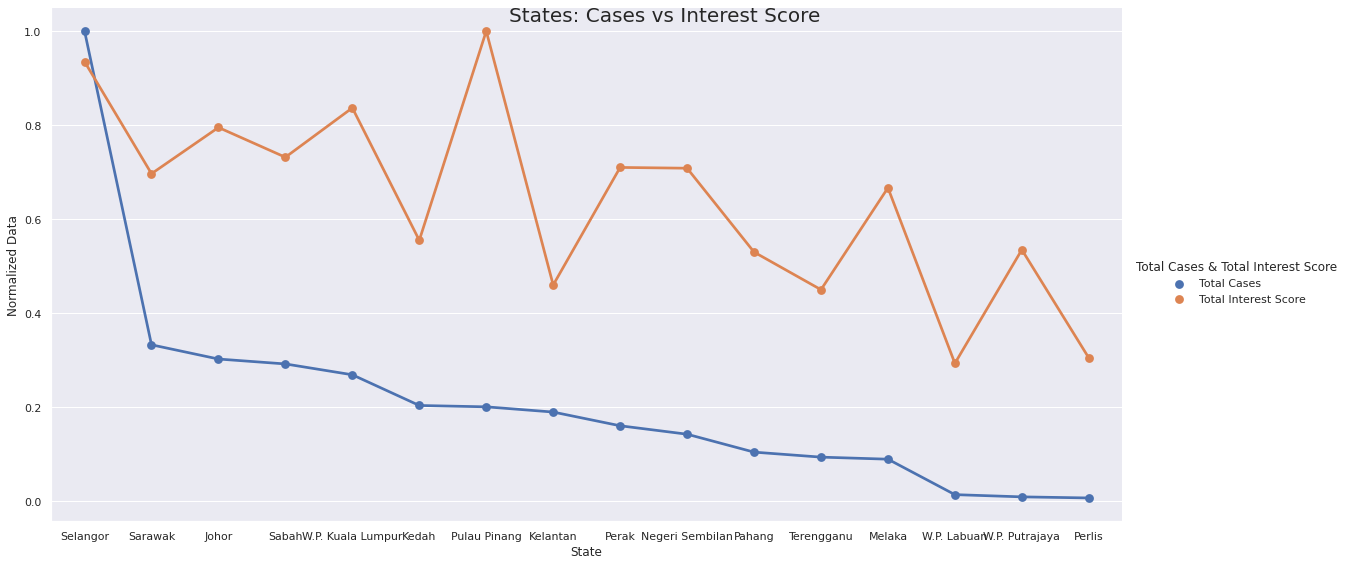

In [ ]:
df_melted = normalized_total_case_interest_df.melt("State",var_name="Total Cases & Total Interest Score",value_name="Normalized Data")
ax = sns.catplot(ax=ax, x="State", y="Normalized Data", hue="Total Cases & Total Interest Score", data=df_melted, ci=None, kind='point',height=8,aspect=2)
ax.fig.suptitle("States: Cases vs Interest Score",fontsize=20, fontdict={"weight": "bold"})

0.6285571402052665


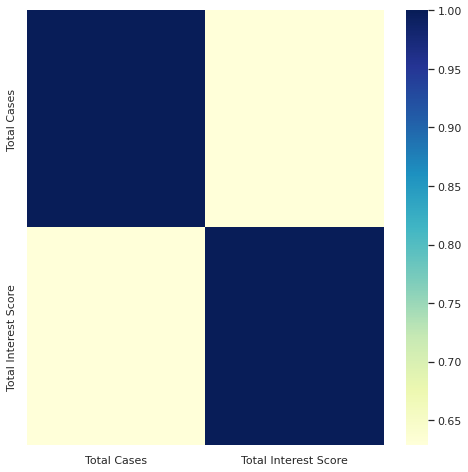

In [ ]:
correlation = normalized_total_case_interest_df['Total Cases'].corr(normalized_total_case_interest_df['Total Interest Score']) 
print(correlation)
corr = normalized_total_case_interest_df.corr()
fig, ax = plt.subplots(figsize=(8,8)) 
sns.heatmap(corr, xticklabels=corr.columns.values, yticklabels=corr.columns.values, cmap='YlGnBu', ax=ax)

Based on the graph above and correlation coefficient of 0.6285571402052665, the total cases and total interest score of each state have a moderate positive correlation. The higher the confirmed COVID-19 cases, the higher the interest score where people tend to search more about COVID-19.

In short, this section demonstrated basic exploration and analyzation on google trends data in Malaysia. The search trend of "coronavirus" and other keywords fluctuated over the one year span (20th Oct 2020 - 20th Oct 2021) due to various reasons. It is noticeable that interest score for "coronavirus" topped around the May of 2021 because of the pandemic situation started to worsen. The correlation between COVID-19 cases and people's interest towards COVID-19 is moderate positive. People in different states have different interest levels for different keywords, whichever is more related to themselves will be searched more. For example, Sabah topped the "Cansino" interest score while other states showed lower interest, because Cansino vaccines are mostly available and vaccinated in Sabah. This section demonstrated basic exploration and analyzation on google trends data.

# Machine Learning Techniques

## Clustering

### Question 8

In [ ]:
vaccines_type_df = malaysia_vaccination_df[['date','pfizer1','pfizer2','sinovac1','sinovac2','astra1','astra2','cansino']]
vaccines_type_df

date  pfizer1  pfizer2  sinovac1  sinovac2  astra1  astra2  cansino
127  2021-07-01    27326    47548    134660     38881   21397      11        0
128  2021-07-02    28216    30050    119798     40483   21983      15        0
129  2021-07-03    25931    38738    100096     40246   18604       7        0
130  2021-07-04    27203    42581     88786     37853   18925       6        0
131  2021-07-05    34624    53945    150095     65849   21638     699        0
..          ...      ...      ...       ...       ...     ...     ...      ...
214  2021-09-26   114532   111129      3568     21471     464   23722     1832
215  2021-09-27   168892   114196      4138     19670     327   23238      902
216  2021-09-28   166681   120713      3876     20434     351   23611     2485
217  2021-09-29   189673   112248      3812     21881     755   18717     1388
218  2021-09-30   164195   120356      4145     24158     268   20667     3815

[92 rows x 8 columns]

In [ ]:
vaccines_type_df['Pfizer'] = vaccines_type_df.loc[:, ('pfizer1', 'pfizer2')].sum(axis=1)
vaccines_type_df['Sinovac'] = vaccines_type_df.loc[:, ('sinovac1','sinovac2')].sum(axis=1)
vaccines_type_df['AstraZeneca'] = vaccines_type_df.loc[:, ('astra1','astra2')].sum(axis=1)
vaccines_type_df['Cansino'] = vaccines_type_df.loc[:, ('cansino')]
vaccines_type_df = vaccines_type_df[['Pfizer','Sinovac','AstraZeneca','Cansino']]
vaccines_type_df.reset_index(drop=True, inplace=True)
vaccines_type_df =(vaccines_type_df-vaccines_type_df.min())/(vaccines_type_df.max()-vaccines_type_df.min())
vaccines_type_df

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documen

Pfizer   Sinovac  AstraZeneca   Cansino
0   0.068162  0.512411     0.104578  0.000000
1   0.000000  0.467113     0.118743  0.000000
2   0.026279  0.399000     0.037428  0.000000
3   0.047272  0.352189     0.045111  0.000000
4   0.124368  0.657263     0.126882  0.000000
..       ...       ...          ...       ...
87  0.687016  0.005114     0.171272  0.241275
88  0.922706  0.000909     0.156363  0.118794
89  0.940379  0.002624     0.165894  0.327275
90  1.000000  0.007348     0.058099  0.182800
91  0.928711  0.016264     0.093223  0.502436

[92 rows x 4 columns]

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-package

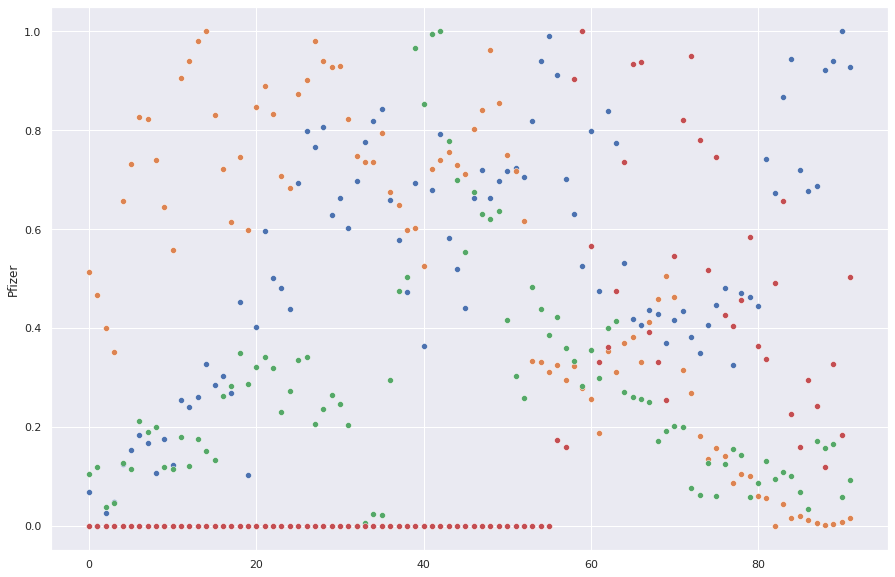

In [ ]:
# scatter plot
sns.set(rc={'figure.figsize':(15,10)})
cols = ['Pfizer', 'Sinovac', 'AstraZeneca', 'Cansino']
fig, ax = plt.subplots(1,1)
for col in cols:
    sns.scatterplot(vaccines_type_df.index, vaccines_type_df[col], ax=ax)

Optimal k:  2


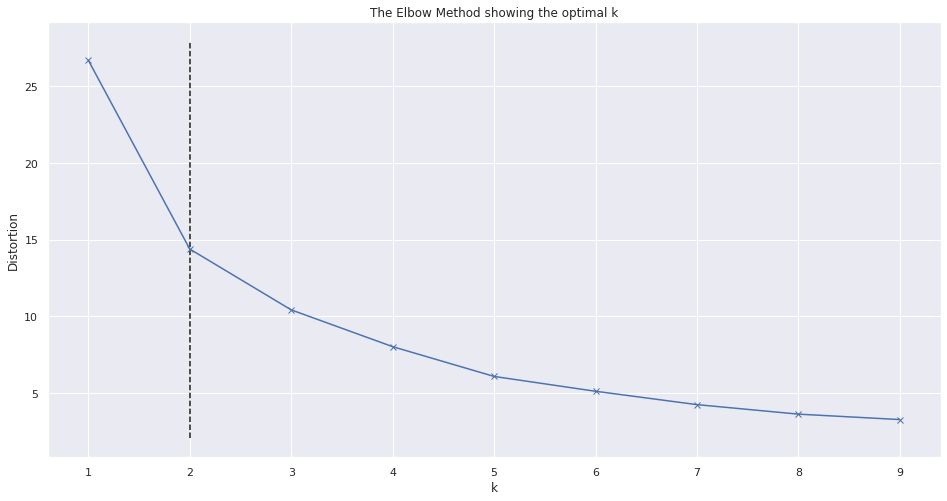

In [ ]:
from sklearn.preprocessing import StandardScaler 

ss = StandardScaler()
X = ss.fit_transform(vaccines_type_df)

distortions = []
K = range(1,10)
for k in K:
    kmeanModel = KMeans(n_clusters=k)
    kmeanModel.fit(vaccines_type_df)
    distortions.append(kmeanModel.inertia_)

from kneed import KneeLocator, DataGenerator as dg
x, y = dg.convex_decreasing()
kn = KneeLocator(x, y, curve='convex', direction='decreasing')
print('Optimal k: ',kn.knee)

plt.figure(figsize=(16,8))
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.vlines(kn.knee, plt.ylim()[0], plt.ylim()[1], linestyles='dashed')
plt.show()

The optimal K suggested is 2, so we set the number of cluster to 2 for K-means clustering.

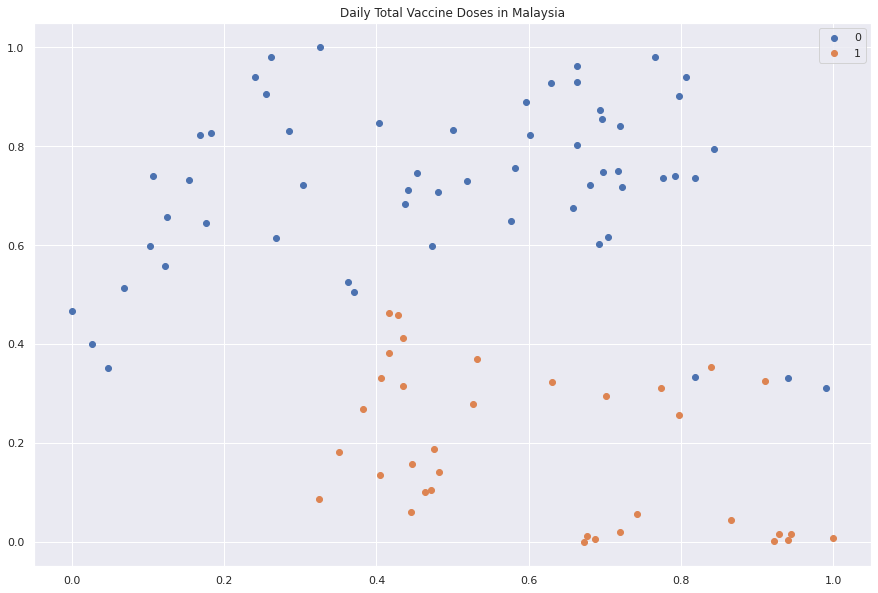

In [ ]:
from sklearn.cluster import KMeans
 
kmeans = KMeans(n_clusters=2, init='random')
label = kmeans.fit_predict(vaccines_type_df)
u_labels = np.unique(label)
plt.figure(figsize=(15,10))
for i in u_labels:
    plt.scatter(vaccines_type_df.iloc[label == i , 0] , vaccines_type_df.iloc[label == i , 1] , label = i)
plt.title('Daily Total Vaccine Doses in Malaysia')
plt.legend()
plt.show()

By applying the K-means clustering algorithm, the four types of vaccines with different total doses over the 3 months are classified into two groups. One group is the group with higher total doses, another group is the lower total doses group. We can observe that there are some vaccines having lower total doses compared to other vaccines, although it is already September 2021. This could be indicating a supply and demand problem for specific type of vaccine. The reasons behind it could be the differences in the vaccines' popularity and publicity effect. For example, there were more people talking good about Pfizer and the government recently used Pfizer the most for vaccination whereas AstraZeneca was said to be more likely to cause side effects and blood clots, so less people wanted to take it.

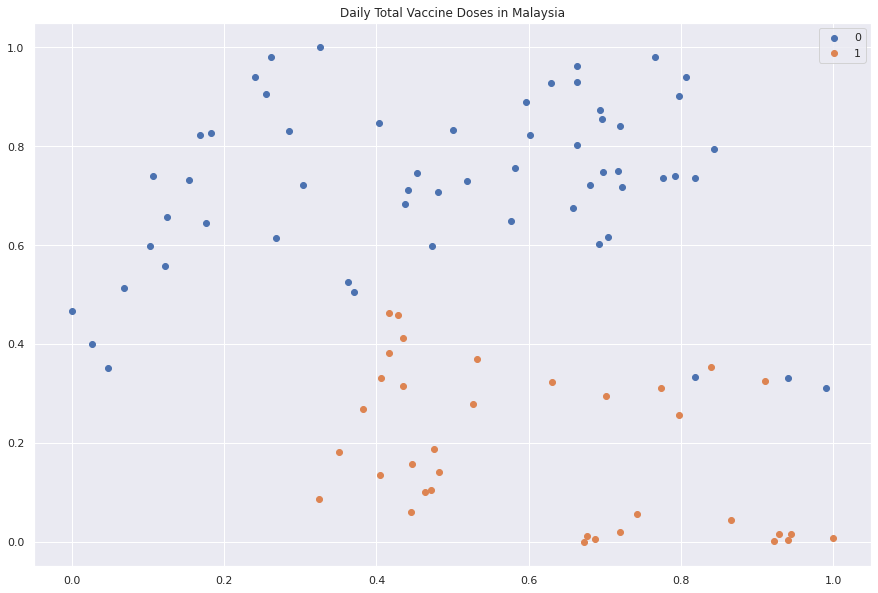

In [ ]:
from sklearn.cluster import KMeans
 
kmeans = KMeans(n_clusters=2, init='random')
label = kmeans.fit_predict(vaccines_type_df)
u_labels = np.unique(label)
plt.figure(figsize=(15,10))
for i in u_labels:
    plt.scatter(vaccines_type_df.iloc[label == i , 0] , vaccines_type_df.iloc[label == i , 1] , label = i)
plt.title('Daily Total Vaccine Doses in Malaysia')
plt.legend()
plt.show()

By applying the K-means clustering algorithm, the four types of vaccines with different total doses over the 3 months are classified into two groups. One group is the group with higher total doses, another group is the lower total doses group. We can observe that there are some vaccines having lower total doses compared to other vaccines, although it is already September 2021. This could be indicating a supply and demand problem for specific type of vaccine. The reasons behind it could be the differences in the vaccines' popularity and publicity effect. For example, there were more people talking good about Pfizer and the government recently used Pfizer the most for vaccination whereas AstraZeneca was said to be more likely to cause side effects and blood clots, so less people wanted to take it.

### Question 9

In [ ]:
cumm_vacc = malaysia_vaccination_df[['date','cumul']]
daily_case = malaysia_case_df[['date','cases_new']]

In [ ]:
daily_cumvacc_df = pd.merge(cumm_vacc, daily_case, on=['date','date'])
daily_cumvacc_df = daily_cumvacc_df.drop(columns=['date'])
daily_cumvacc_df

cumul  cases_new
0    8544412       6988
1    8784959       6982
2    9008583       6658
3    9223937       6045
4    9550792       6387
..       ...        ...
87  43219191      13104
88  43550651      10959
89  43888885      11332
90  44237486      12434
91  44575282      12735

[92 rows x 2 columns]

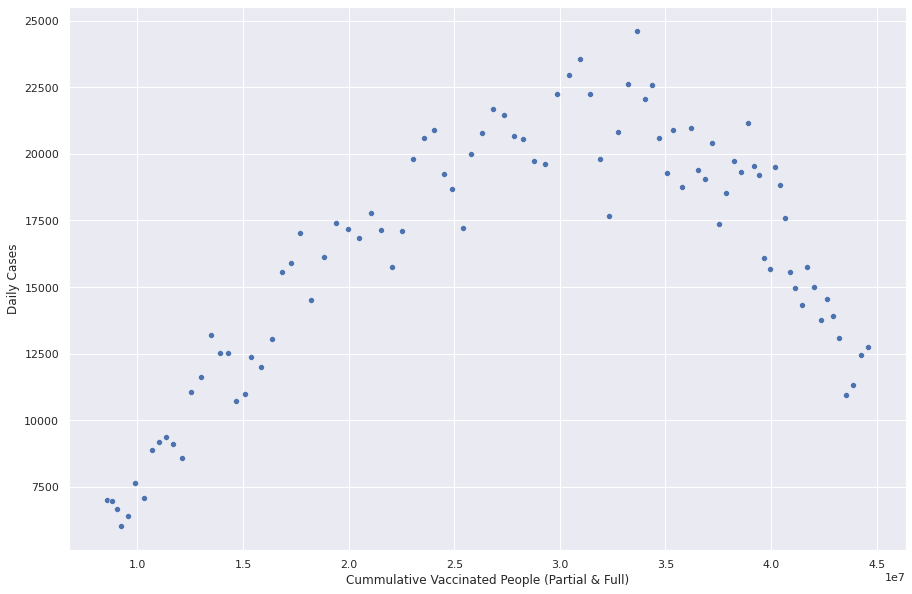

In [ ]:
daily_cumvacc_df = daily_cumvacc_df.rename(columns={'cumul': 'Cummulative Vaccinated People (Partial & Full)', 'cases_new': 'Daily Cases'})
sns.set(rc={'figure.figsize':(15,10)})
sns.scatterplot(data=daily_cumvacc_df, x="Cummulative Vaccinated People (Partial & Full)", y="Daily Cases")

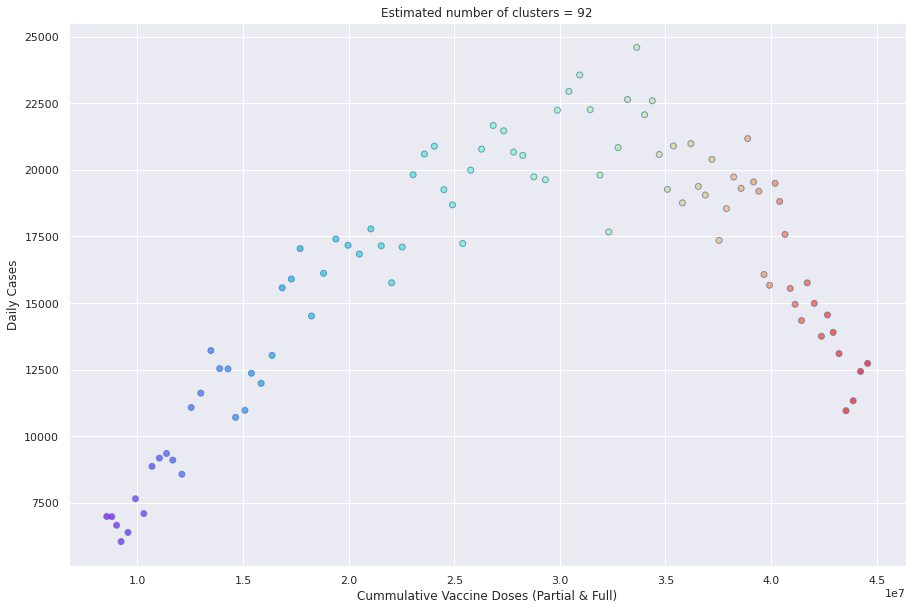

In [ ]:
from sklearn.cluster import AffinityPropagation

af = AffinityPropagation(damping=0.7,preference=-50)
clustering = af.fit(daily_cumvacc_df)
cluster_centers_indices = af.cluster_centers_indices_
n_clusters_ = len(cluster_centers_indices)
plt.scatter(daily_cumvacc_df.iloc[:,0], daily_cumvacc_df.iloc[:,1], c=clustering.labels_, cmap='rainbow', alpha=0.7, edgecolors='b')
plt.title(f'Estimated number of clusters = {n_clusters_}')
plt.xlabel('Cummulative Vaccine Doses (Partial & Full)')
plt.ylabel('Daily Cases')
plt.show()


By applying affinity propagation algorithm on the cummulative vaccine doses and daily cases in Malaysia over the three months, the estimated number of clusters is 6. With the graph shown above is a concave shape of points plotted, we can induced that the six clusters are: 
1. Very low cummulative vaccine doses & very low daily cases (Purple)
2. Low cummulative vaccine doses & low daily cases (Blue, light blue)
3. Moderate cummulative vaccine doses & moderate daily cases (Aqua blue)
4. High cummulative vaccine doses & very high daily cases (Green)
5. High cummulative vaccine doses & moderate daily cases (Yellow, orange)
6. Very high cummulative vaccine doses & low daily cases (Red)

The first cluster indicated a pandemic situation where the daily cases remained low and steady although the cummulative vaccine doses is not high. The second, third and fourth cluster indicated the climbing trend of both cummulative vaccine doses and daily cases, which means the vaccines effects have not shown yet and there might be outbreaks of COVID-19 happening at that time. The fifth cluster indicated the start of the daily cases decline trend where the vaccine can be said to be effective and have suppressed the pandemic a bit. The sixth cluster indicated the drastic drop of daily cases from its peak as the cummulative vaccine doses is very high.

In short, the vaccines are effective but require sometime to show its affects. Hence, we should continue the vaccinations.

## Classification 

We have built two classification model to classify vaccine type based on side-effects and classify R-naught level based on R-naught values in Malaysia

#### Question 10

In [ ]:
start_date = vax_aefi_df["date"] >= "2021-04-01"
vax_aefi_df = vax_aefi_df.loc[start_date]
vax_aefi_df.drop(['date'],axis=1,inplace=True)
col = ['daily_total',	'daily_serious_npra',	'daily_nonserious',	'daily_nonserious_npra', 'daily_nonserious_mysj_dose1',	'daily_nonserious_mysj_dose2']
vax_aefi_df.drop(col,axis=1,inplace=True)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


### Feature Selection

The  feature  selection  technique  used  on  classifyingvaccine type is Recursive Feature Elimination (RFE).It is a wrapper methods but internally running filtering methods.  After trying different set offeatures,  we  have  decided  to  select  15  important  features  from  30  feature using RFE to increase the classifier’s performance

In [ ]:
def ranking(ranks, names, order=1):
    minmax = MinMaxScaler()
    ranks = minmax.fit_transform(order*np.array([ranks]).T).T[0]
    ranks = map(lambda x: round(x,2), ranks)
    return dict(zip(names, ranks))

In [ ]:
X = np.array(vax_aefi_df.loc[:, vax_aefi_df.columns != 'vaxtype'])
y = np.array(vax_aefi_df.loc[:, vax_aefi_df.columns == 'vaxtype'])
X = vax_aefi_df.drop(["vaxtype"], 1)
colnames = X.columns
# report which features were selected by RFE
from sklearn.datasets import make_classification
from sklearn.feature_selection import RFE
from sklearn.tree import DecisionTreeClassifier
# define dataset
X, y = make_classification(n_samples=1000, n_features=24, n_informative=5, n_redundant=5, random_state=1)
# define RFE
rfe = RFE(estimator=DecisionTreeClassifier(), n_features_to_select=15)
# fit RFE
rfe.fit(X, y)
# summarize all features
for i in range(X.shape[1]):
  if rfe.support_[i] == True:
	  print('Column: %s, Selected %s, Rank: %.3f' % (colnames[i], rfe.support_[i], rfe.ranking_[i]))

Column: d1_site_pain, Selected True, Rank: 1.000
Column: d1_site_swelling, Selected True, Rank: 1.000
Column: d1_site_redness, Selected True, Rank: 1.000
Column: d1_tiredness, Selected True, Rank: 1.000
Column: d1_vomiting, Selected True, Rank: 1.000
Column: d1_chills, Selected True, Rank: 1.000
Column: d1_rash, Selected True, Rank: 1.000
Column: d2_site_pain, Selected True, Rank: 1.000
Column: d2_site_swelling, Selected True, Rank: 1.000
Column: d2_site_redness, Selected True, Rank: 1.000
Column: d2_tiredness, Selected True, Rank: 1.000
Column: d2_headache, Selected True, Rank: 1.000
Column: d2_weakness, Selected True, Rank: 1.000
Column: d2_fever, Selected True, Rank: 1.000
Column: d2_chills, Selected True, Rank: 1.000


Text(0.5, 1.0, 'RFE Features Ranking')

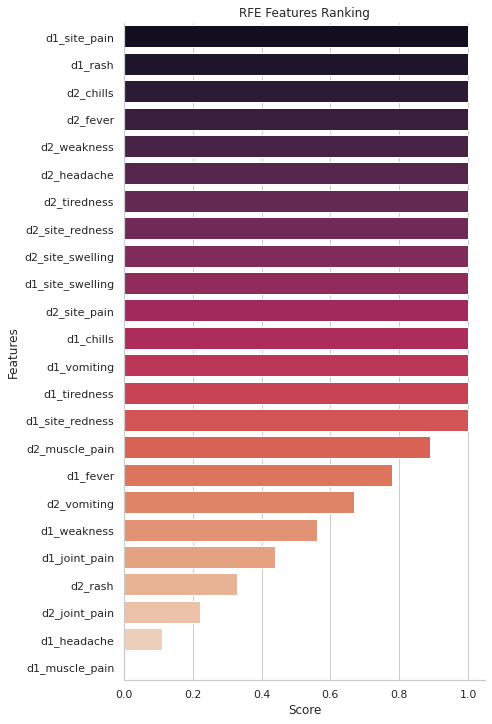

In [ ]:
rfe_score = ranking(list(map(float, rfe.ranking_)), colnames, order=-1)
rfe_score = pd.DataFrame(list(rfe_score.items()), columns=['Features', 'Score'])
rfe_score = rfe_score.sort_values("Score", ascending = False)
sns.set(style='whitegrid')
sns_rfe_plot = sns.catplot(x="Score", y="Features", data = rfe_score[:], kind = "bar", 
               height=10, aspect=.7, palette='rocket')
plt.title("RFE Features Ranking")

In [ ]:
selected_feat = ['d1_site_pain', 'd1_site_swelling','d1_joint_pain','d1_weakness', 'd1_fever','d1_vomiting','d1_rash', 'd2_site_pain', 'd2_site_swelling', 'd2_site_redness', 'd2_tiredness', 'd2_headache', 'd2_weakness','d2_fever', 'd2_chills']


### SMOTE

Before performing oversampling on the data, we first check on the data value counts to see whether it is balanced or imbalanced.  Below shows the data distribution  for  all  three  vaccine  type:  Sinovac,  Pfizer  and  Astrazeneca  before performing oversampling tenchique using SMOTE and after balancing the dataset.  In this stage, the data has already been split into train and test setin a ratio of 7:3 and is ready for modelling the classifier and make prediction.

sinovac        201
pfizer         201
astrazeneca    167
Name: vaxtype, dtype: int64

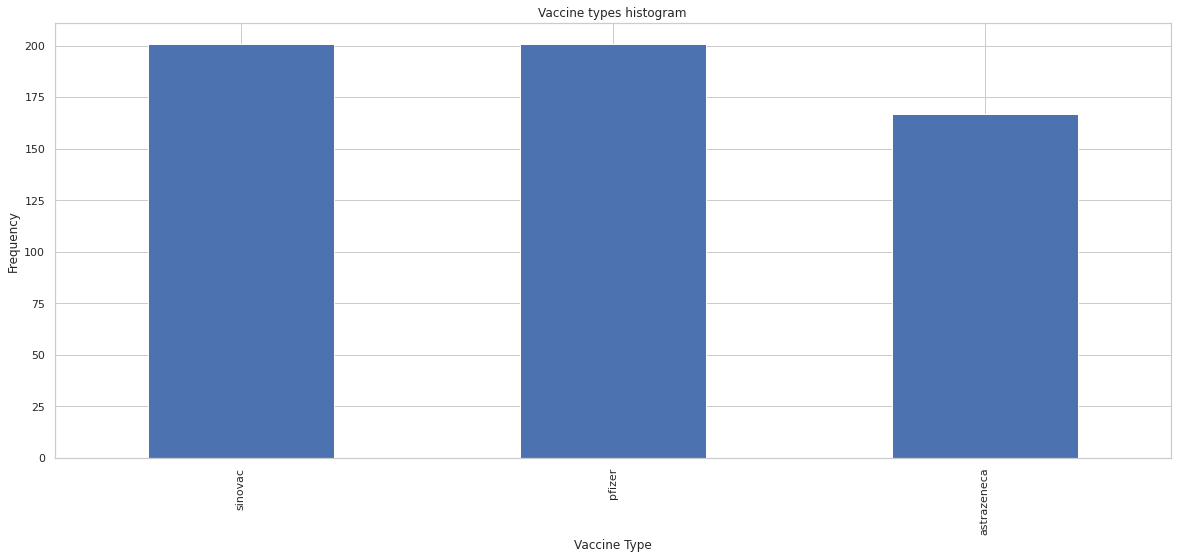

In [ ]:
pd.value_counts(vax_aefi_df['vaxtype']).plot.bar()
plt.title('Vaccine types histogram')
plt.xlabel('Vaccine Type')
plt.ylabel('Frequency')
vax_aefi_df['vaxtype'].value_counts()

In [ ]:
X = np.array(vax_aefi_df[selected_feat])
y = np.array(vax_aefi_df.loc[:, vax_aefi_df.columns == 'vaxtype'])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

print("Before OverSampling, counts of label 'sinovac': {}".format(sum(y_train=='sinovac')))
print("Before OverSampling, counts of label 'pfizer': {}".format(sum(y_train=='pfizer')))
print("Before OverSampling, counts of label 'astrazeneca': {} \n".format(sum(y_train=='astrazeneca')))

sm = SMOTE(random_state=2)
X_train_res, y_train_res = sm.fit_resample(X_train, y_train.ravel())

print('After OverSampling, the shape of train_X: {}'.format(X_train_res.shape))
print('After OverSampling, the shape of train_y: {} \n'.format(y_train_res.shape))

print("After OverSampling, counts of label 'sinovac': {}".format(sum(y_train_res=='sinovac')))
print("After OverSampling, counts of label 'pfizer': {}".format(sum(y_train_res=='pfizer')))
print("After OverSampling, counts of label 'astrazeneca': {}".format(sum(y_train_res=='astrazeneca')))


Before OverSampling, counts of label 'sinovac': [133]
Before OverSampling, counts of label 'pfizer': [149]
Before OverSampling, counts of label 'astrazeneca': [116] 

After OverSampling, the shape of train_X: (447, 15)
After OverSampling, the shape of train_y: (447,) 

After OverSampling, counts of label 'sinovac': 149
After OverSampling, counts of label 'pfizer': 149
After OverSampling, counts of label 'astrazeneca': 149


/usr/local/lib/python3.7/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/loca

Text(0, 0.5, 'Frequency')

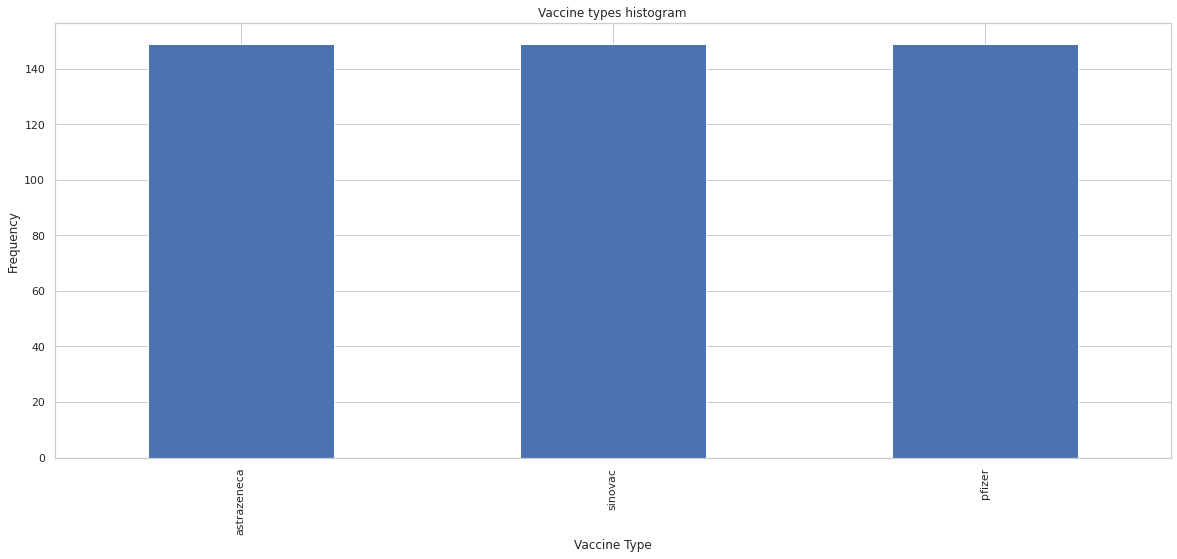

In [ ]:
pd.value_counts(y_train_res).plot.bar()
plt.title('Vaccine types histogram')
plt.xlabel('Vaccine Type')
plt.ylabel('Frequency')

### Classifier

In [ ]:
logreg = LogisticRegression() #solver best 'S' curve
logreg.fit(X_train_res, y_train_res)
y_pred = logreg.predict(X_test)
## Evaluate the performance of the trained model

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [ ]:
result = pd.DataFrame()
result = pd.DataFrame(X_test,columns = selected_feat)
result['y_test'] = y_test.ravel()
result['y_pred'] = y_pred
result.head()

d1_site_pain  d1_site_swelling  ...       y_test       y_pred
0          1266               332  ...  astrazeneca  astrazeneca
1           314                39  ...      sinovac      sinovac
2           513                68  ...      sinovac      sinovac
3          1284               117  ...      sinovac      sinovac
4             2                 0  ...      sinovac      sinovac

[5 rows x 17 columns]

In [ ]:
print('Precision= {:.2f}'.format(precision_score(y_test, y_pred, average="weighted")))
print('Recall= {:.2f}'. format(recall_score(y_test, y_pred, average="weighted")))
print('F1= {:.2f}'. format(f1_score(y_test, y_pred, average="weighted")))
print('Accuracy= {:.2f}'. format(accuracy_score(y_test, y_pred)))

Precision= 0.96
Recall= 0.96
F1= 0.96
Accuracy= 0.96


The classifier chosen is logistic regression classifier.  Using Logistic regression, the model is able to classify on test dataset and achieving 0.96 accuracy on the predicted results.  The accuracy is better than Decision Tree (0.83), K-nearest neigh-bors (KNN) (0.94) and Naive Bayes Classifier (0.65).  Overall, the LogisticRegression classifier did a good job to predicting vaccine type based on the side effects

### Question 11

We used the self-collected dataset containing R-naught values for each statein Malaysia from .  The classifier is expected to predict R-naught levels for Malaysia based on R-naught value of each state.  The classify results is inthree categories which are ’Low’, ’Medium’, ’High’.  Within the three classifier, Logistic Regression, Gaussian Naive Bayes and Decision Tree, DecisionTree  is  classifying  the  most  accurate  R-naught  level  on  the  test  set.   We compared the accuracy with and without oversampling using SMOTE and the accuracy after performing SMOTE is reached up to 87% while before SMOTE is lower than 0.82

In [ ]:
def getBinsRange(df):  
        data = df['Malaysia'].values
        # First quartile (Q1)
        Q1 = np.percentile(data, 25, interpolation = 'midpoint')
        # Second quartile (Q2)
        Q2 = np.percentile(data, 50, interpolation = 'midpoint')
        # Third quartile (Q3)
        Q3 = np.percentile(data, 75, interpolation = 'midpoint')

        return [np.min(data),(Q1 + Q2)/2, (Q2 + Q3)/2,np.inf]
        
labels = ['Low','Medium','High']
r_naught_df_copy = r_naught_df.copy()

r_naught_df_copy['Malaysia_Category'] = (
    pd.cut(
        r_naught_df_copy['Malaysia'].values, bins=getBinsRange(r_naught_df_copy),labels=labels, include_lowest=True)
)
r_naught_df_copy = r_naught_df_copy._convert(numeric=True)
r_naught_df_copy = r_naught_df_copy.replace(np.nan,0)
r_naught_df_copy.set_index('date', inplace=True)
X = r_naught_df_copy.drop(['Malaysia','Malaysia_Category'], axis=1)  #predict newcases
y = r_naught_df_copy['Malaysia_Category']

### SMOTE 

In [ ]:
sm = SMOTE(random_state=42)

X_sm, y_sm = sm.fit_resample(X, y)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


### Classifier

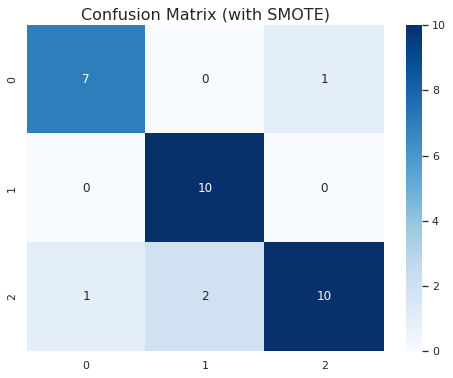

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_sm, y_sm, test_size=0.3, random_state=1)
clf = DecisionTreeClassifier(criterion="entropy", max_depth=5, splitter='random') #pruning the tree by setting the depth
clf = clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)
result = pd.DataFrame()
result = pd.DataFrame(X_test)
result['y_test'] = y_test.ravel()
result['y_pred'] = y_pred
result.head()

cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
plt.title('Confusion Matrix (with SMOTE)', size=16)
sns.heatmap(cm, annot=True, cmap='Blues')

In [ ]:
print('Precision= {:.2f}'.format(precision_score(y_test, y_pred, average="weighted")))
print('Recall= {:.2f}'. format(recall_score(y_test, y_pred, average="weighted")))
print('F1= {:.2f}'. format(f1_score(y_test, y_pred, average="weighted")))
print('Accuracy= {:.2f}'. format(accuracy_score(y_test, y_pred)))

Precision= 0.88
Recall= 0.87
F1= 0.87
Accuracy= 0.87


### Question 12

## Regression

### Question 13

For Question 13, we are interested to find out how regression machine learning algorithm perform on predicting the R-Naught Value based on the states' r-naught value and a joint-dataset with malaysia_cases and malaysia_deaths datasets. It would be helpful if the model successfully predict the R-naught, if it is high then it will be more vigilant towards Covid-19.

In [ ]:
r_naught_df_copy = r_naught_df.copy()
r_naught_df_copy = r_naught_df_copy._convert(numeric=True)
r_naught_df_copy = r_naught_df_copy.replace(np.nan, 0)
r_naught_df_copy.set_index('date', inplace=True)
X = r_naught_df_copy.drop(['Malaysia'], axis=1)  # predict newcases
y = r_naught_df_copy['Malaysia']


def model_evaluation(model, X, y):
    kfold = model_selection.KFold(n_splits=10, random_state=7, shuffle=True)
    results = model_selection.cross_val_score(
        model, X, y, cv=kfold, scoring='neg_mean_absolute_error')
    mae = results.mean()
    results = model_selection.cross_val_score(
        model, X, y, cv=kfold, scoring='neg_mean_squared_error')
    mse = results.mean()
    results = model_selection.cross_val_score(
        model, X, y, cv=kfold, scoring='r2')
    r2 = results.mean()
    return mae, mse, r2



#### Without Feature Selection

In [ ]:
mae_list = []
mse_list = []
r2_list = []

model = LinearRegression()
mae, mse, r2 = model_evaluation(model, X, y)
mae_list.append(mae)
mse_list.append(mse)
r2_list.append(r2)

model = DecisionTreeRegressor(max_depth=2)
mae, mse, r2 = model_evaluation(model, X, y)
mae_list.append(mae)
mse_list.append(mse)
r2_list.append(r2)    

model = Lasso(alpha=1.0)
mae, mse, r2 = model_evaluation(model, X, y)
mae_list.append(mae)
mse_list.append(mse)
r2_list.append(r2)

model = SVR()
mae, mse, r2 = model_evaluation(model, X, y)
mae_list.append(mae)
mse_list.append(mse)
r2_list.append(r2)

model = RandomForestRegressor(max_depth=2)
mae, mse, r2 = model_evaluation(model, X, y)
mae_list.append(mae)
mse_list.append(mse)
r2_list.append(r2)
model_list = ['Linear Regression','Decision Tree Regression', 'Lasso Regression', 'SVR Regression', 'Random Forest Regression']
d = {'Regression Algorithm':model_list,'MAE': mae_list, 'MSE': mse_list, 'R2':r2_list}
pd.DataFrame(data=d)

Regression Algorithm       MAE       MSE        R2
0         Linear Regression -0.020855 -0.000852  0.799050
1  Decision Tree Regression -0.024360 -0.000946  0.778462
2          Lasso Regression -0.066425 -0.006493 -0.192467
3            SVR Regression -0.037840 -0.002197  0.544872
4  Random Forest Regression -0.020566 -0.000655  0.860576

Based on the above evaluation metrics, it can be seen that the Lasson regression perform the worst and the random forest regression perform the best on guessing the accurate R-naught value. Therefore, for following prediction, we will be sticking to the random forest regression algorithm.

In [ ]:
model = RandomForestRegressor(max_depth=2)
model.fit(X.iloc[:-30,:], y[:-30])
y_pred = model.predict(X.iloc[-30:])

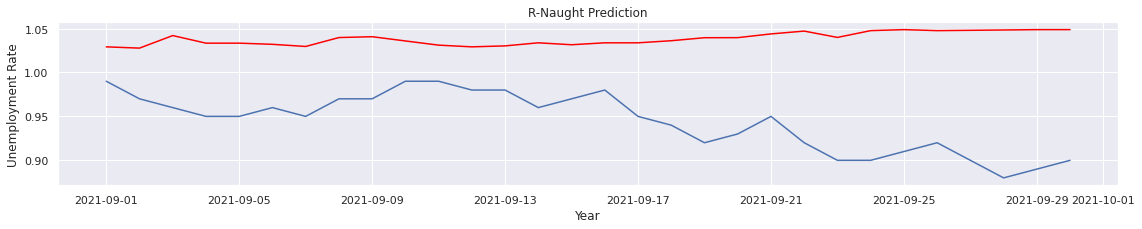

In [ ]:
plt.figure(figsize=(19,3))
plt.plot(X.index[-30:], y_pred, color="red", label="Predicted R Naught")
plt.plot(X.index[-30:], y[-30:], label="Actual R Naught")

plt.title('R-Naught Prediction')
plt.xlabel('Year')
plt.ylabel('Unemployment Rate')
plt.show()

From the above graph, it can be told that even though the model fits the data quite well but still unable to correctly predict the r-naught value. In the following sections, we will be trying with a joint dataset and test with different methods to increase the accuracy

#### With Feature Selection

In [ ]:
# feature selection
def select_features(X_train, y_train, X_test):
	# configure to select a subset of features
	fs = SelectKBest(score_func=f_regression, k=10)
	# learn relationship from training data
	fs.fit(X_train, y_train)
	# transform train input data
	X_train_fs = fs.transform(X_train)
	# transform test input data
	X_test_fs = fs.transform(X_test)
	return X_train_fs, X_test_fs, fs

In [ ]:
r_naught_df_copy = r_naught_df.copy()
malaysia_case_df_copy = malaysia_case_df.copy()

r_naught_df_copy = r_naught_df_copy._convert(numeric=True)
r_naught_df_copy = r_naught_df_copy.replace(np.nan, 0)
r_naught_df_copy.set_index('date', inplace=True)
malaysia_case_df_copy.set_index('date', inplace=True)
r_naught_df_copy['cases_new'] = malaysia_case_df_copy['cases_new']
X = r_naught_df_copy.drop(['Malaysia'], axis=1)  # predict newcases
y = r_naught_df_copy['Malaysia']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)
X_train_fs, X_test_fs, fs = select_features(X_train, y_train, X_test)

model = RandomForestRegressor(max_depth=2)
model.fit(X_train_fs, y_train)
# evaluate the model
yhat = model.predict(X_test_fs)
# evaluate predictions
# mae, mse, r2 = model_evaluation(model, X_train_fs, y_train)
mae = mean_absolute_error(y_test, yhat)
print('MAE: %.3f' % mae)
mae = mean_squared_error(y_test, yhat)
print('MSE: %.3f' % mae)
mae = r2_score(y_test, yhat)
print('r2: %.3f' % mae)

MAE: 0.017
MSE: 0.001
r2: 0.909


From the above result, we can conclude that the feature selection can help to increase the accuracy and lowering the error. Therefore, we will use the same method to try on a joint dataset to test the performance.

### Question 14

#### Joint Dataset New Cases and R-Naught

In [ ]:
r_naught_df_copy = r_naught_df.copy()
malaysia_case_df_copy = malaysia_case_df.copy()

r_naught_df_copy = r_naught_df_copy._convert(numeric=True)
r_naught_df_copy = r_naught_df_copy.replace(np.nan, 0)
r_naught_df_copy.set_index('date', inplace=True)
malaysia_case_df_copy.set_index('date', inplace=True)

r_naught_df_copy['cases_new'] = malaysia_case_df_copy['cases_new']

X = r_naught_df_copy.drop(['Malaysia'], axis=1)  # predict newcases
y = r_naught_df_copy['Malaysia']

In [ ]:
mae_list = []
mse_list = []
r2_list = []

model = LinearRegression()
mae, mse, r2 = model_evaluation(model, X, y)
mae_list.append(mae)
mse_list.append(mse)
r2_list.append(r2)

model = DecisionTreeRegressor(max_depth=2)
mae, mse, r2 = model_evaluation(model, X, y)
mae_list.append(mae)
mse_list.append(mse)
r2_list.append(r2)    

model = Lasso(alpha=1.0)
mae, mse, r2 = model_evaluation(model, X, y)
mae_list.append(mae)
mse_list.append(mse)
r2_list.append(r2)

model = SVR()
mae, mse, r2 = model_evaluation(model, X, y)
mae_list.append(mae)
mse_list.append(mse)
r2_list.append(r2)

model = RandomForestRegressor(max_depth=2)
mae, mse, r2 = model_evaluation(model, X, y)
mae_list.append(mae)
mse_list.append(mse)
r2_list.append(r2)
model_list = ['Linear Regression','Decision Tree Regression', 'Lasso Regression', 'SVR Regression', 'Random Forest Regression']
d = {'Regression Algorithm':model_list,'MAE': mae_list, 'MSE': mse_list, 'R2':r2_list}
pd.DataFrame(data=d)

Regression Algorithm       MAE       MSE        R2
0         Linear Regression -0.020340 -0.000729  0.827356
1  Decision Tree Regression -0.024222 -0.000943  0.778860
2          Lasso Regression -0.064287 -0.006363 -0.196149
3            SVR Regression -0.068238 -0.006904 -0.266481
4  Random Forest Regression -0.020373 -0.000645  0.858741

After adding the new cases data, we noticed there few changes in the metrics score, most of the error score has increased and R squared score has decreeased. Among them, SVR regression having the most drastical changes as its R squared value frop from 0.545 to -0.266.

### Question 15

In [ ]:
def create_LSTM_model(X_train):
  regressor = Sequential()
  regressor.add(LSTM(units = 50, return_sequences = True, input_shape = (X_train.shape[1], 1)))
  regressor.add(Dropout(rate = 0.2))
  regressor.add(LSTM(units = 150, return_sequences = False, input_shape = (X_train.shape[1], 1)))
  regressor.add(Dropout(rate = 0.2))
  regressor.add(Dense(1))

  return regressor

def Run_LSTM(training_set, df, is_cases):
  sc = MinMaxScaler(feature_range = (0, 1))
  training_set_scaled = sc.fit_transform(training_set)

  X_train = []
  y_train = []
  for i in range(30, len(training_set_scaled)):
      X_train.append(training_set_scaled[i-30: i, 0])
      y_train.append(training_set_scaled[i, 0])

  X_train, y_train = np.array(X_train), np.array(y_train)

  X_train = np.reshape(X_train, newshape = (X_train.shape[0], X_train.shape[1], 1))
  regressor = create_LSTM_model(X_train)
  regressor.compile(loss='mean_squared_error', optimizer='adam')
  regressor.fit(X_train, y_train, epochs=100, batch_size=32, verbose=2)
  
  dataset_test = df.iloc[-30:, :]
  dataset_train = df.iloc[:-30, :]
  if is_cases:
    dataset_total = pd.concat((dataset_train['cases_new'], dataset_test['cases_new']),axis = 0)
  else:
    dataset_total = pd.concat((dataset_train['deaths_new'], dataset_test['deaths_new']),axis = 0)
  inputs = dataset_total[len(dataset_total) - len(dataset_test) - 30:].values
  inputs = inputs.reshape(-1, 1)
  inputs = inputs.astype(float)
  inputs = sc.transform(inputs)

  X_test = []
  y_test = []
  for i in range(30, len(inputs)):
      X_test.append(inputs[i-30: i, 0])
      y_test.append(inputs[i, 0])

  X_test, y_test = np.array(X_test), np.array(y_test)
  X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
  y_test = np.reshape(y_test, (y_test.shape[0], 1))
  predict_value = regressor.predict(X_test)
  #inverse the scaled value
  # your codes
  predicted_values = sc.inverse_transform(predict_value)
  real_values= sc.inverse_transform(y_test)
  return predicted_values,real_values


#### Malaysia New Case Prediction

Corona Virus Disease 2019 (COVID-19) has spread swiftly to countries all over the world. Because there is no viable cure to this disease, hence, it is important to predict the future cases so that relevant departments can plan ahead and take action immediately. To predict the future trend of covid, we have predicted the trend with a LSTM model and the result shows the future cases in Malaysia will be decreasing. 


Epoch 1/100
1/1 - 3s - loss: 0.5460
Epoch 2/100
1/1 - 0s - loss: 0.3659
Epoch 3/100
1/1 - 0s - loss: 0.2181
Epoch 4/100
1/1 - 0s - loss: 0.0848
Epoch 5/100
1/1 - 0s - loss: 0.0150
Epoch 6/100
1/1 - 0s - loss: 0.1155
Epoch 7/100
1/1 - 0s - loss: 0.0951
Epoch 8/100
1/1 - 0s - loss: 0.0317
Epoch 9/100
1/1 - 0s - loss: 0.0097
Epoch 10/100
1/1 - 0s - loss: 0.0210
Epoch 11/100
1/1 - 0s - loss: 0.0293
Epoch 12/100
1/1 - 0s - loss: 0.0436
Epoch 13/100
1/1 - 0s - loss: 0.0471
Epoch 14/100
1/1 - 0s - loss: 0.0387
Epoch 15/100
1/1 - 0s - loss: 0.0284
Epoch 16/100
1/1 - 0s - loss: 0.0211
Epoch 17/100
1/1 - 0s - loss: 0.0176
Epoch 18/100
1/1 - 0s - loss: 0.0119
Epoch 19/100
1/1 - 0s - loss: 0.0112
Epoch 20/100
1/1 - 0s - loss: 0.0150
Epoch 21/100
1/1 - 0s - loss: 0.0183
Epoch 22/100
1/1 - 0s - loss: 0.0211
Epoch 23/100
1/1 - 0s - loss: 0.0234
Epoch 24/100
1/1 - 0s - loss: 0.0157
Epoch 25/100
1/1 - 0s - loss: 0.0154
Epoch 26/100
1/1 - 0s - loss: 0.0139
Epoch 27/100
1/1 - 0s - loss: 0.0137
Epoch 28/1

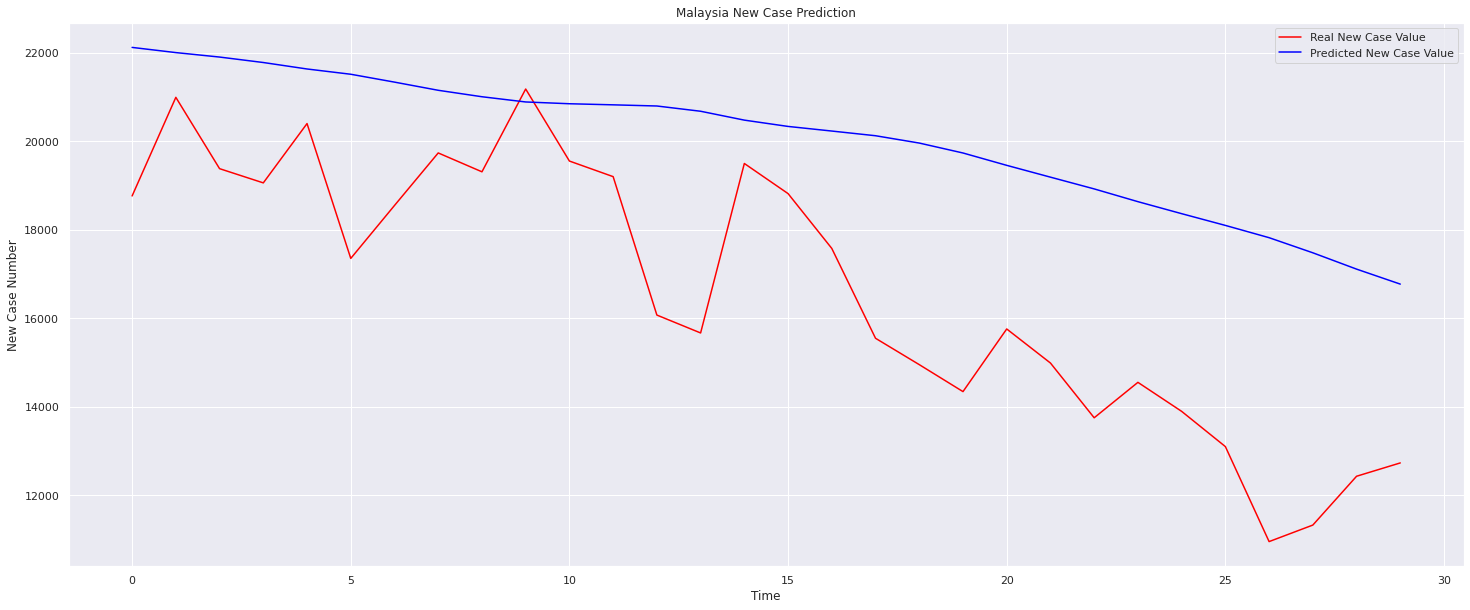

In [ ]:
##visualize the prediction and real price
training_set = malaysia_case_df.iloc[:-30, 1:2].values
predicted_values, real_values = Run_LSTM(training_set,malaysia_case_df, True)
plt.plot(real_values, color = 'red', label = 'Real New Case Value')
plt.plot(predicted_values, color = 'blue', label = 'Predicted New Case Value')

plt.title('Malaysia New Case Prediction')
plt.xlabel('Time')
plt.ylabel('New Case Number')
plt.legend()
plt.show()
  

The graph shows the prediction is approximately accurate as it follows the trend of the actual cases trend. 


#### Malaysia New Deaths Prediction

The increase in the number of confirmed cases of covid is not necessarily the only reason for the increase in the number of deaths. There may be many problems in country's healthcare system that have not yet been discovered. Therefore, we are also obligated to analyze and predict the number of deaths in the future in order to discover potential problems and be prepared for it. For this purpose, we have trained a LSTM model for the prediction. As the result, the death number for Covid 19 is decreasing along with the decreasing of Covid 19 daily cases.


In [ ]:
malaysia_death_df_copy = malaysia_death_df.copy()
malaysia_death_df_copy.set_index('date', inplace=True)

Epoch 1/100
45/45 - 7s - loss: 0.0054
Epoch 2/100
45/45 - 3s - loss: 0.0054
Epoch 3/100
45/45 - 3s - loss: 0.0052
Epoch 4/100
45/45 - 3s - loss: 0.0050
Epoch 5/100
45/45 - 3s - loss: 0.0051
Epoch 6/100
45/45 - 3s - loss: 0.0050
Epoch 7/100
45/45 - 3s - loss: 0.0051
Epoch 8/100
45/45 - 3s - loss: 0.0052
Epoch 9/100
45/45 - 3s - loss: 0.0051
Epoch 10/100
45/45 - 3s - loss: 0.0051
Epoch 11/100
45/45 - 3s - loss: 0.0051
Epoch 12/100
45/45 - 3s - loss: 0.0050
Epoch 13/100
45/45 - 3s - loss: 0.0049
Epoch 14/100
45/45 - 3s - loss: 0.0050
Epoch 15/100
45/45 - 3s - loss: 0.0050
Epoch 16/100
45/45 - 3s - loss: 0.0049
Epoch 17/100
45/45 - 3s - loss: 0.0049
Epoch 18/100
45/45 - 3s - loss: 0.0049
Epoch 19/100
45/45 - 3s - loss: 0.0049
Epoch 20/100
45/45 - 3s - loss: 0.0051
Epoch 21/100
45/45 - 3s - loss: 0.0049
Epoch 22/100
45/45 - 3s - loss: 0.0049
Epoch 23/100
45/45 - 3s - loss: 0.0048
Epoch 24/100
45/45 - 3s - loss: 0.0049
Epoch 25/100
45/45 - 3s - loss: 0.0048
Epoch 26/100
45/45 - 3s - loss: 0.

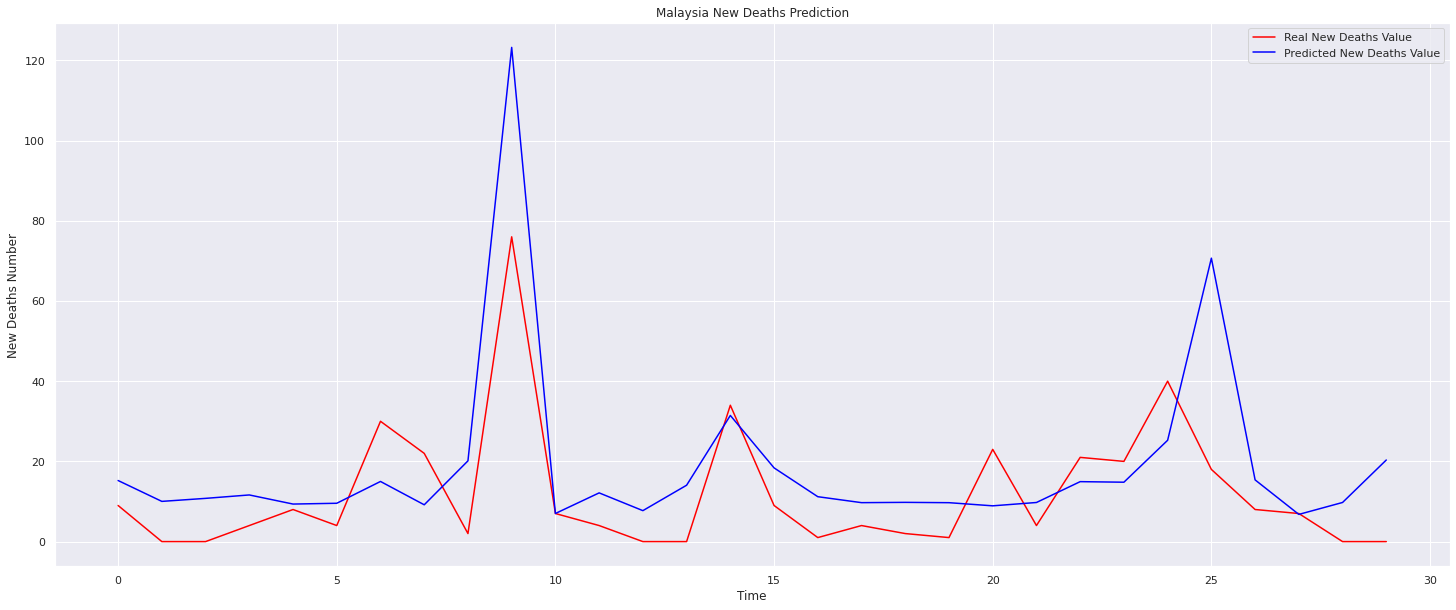

In [ ]:
training_set = malaysia_death_df_copy.iloc[:-30, 1:2].values

predicted_values, real_values = Run_LSTM(training_set,malaysia_death_df_copy, False)
plt.plot(real_values, color = 'red', label = 'Real New Deaths Value')
plt.plot(predicted_values, color = 'blue', label = 'Predicted New Deaths Value')
# plt.ylim(np.amin(np.concatenate([predicted_values, real_values])),np.amax(np.concatenate([predicted_values, real_values])))

plt.title('Malaysia New Deaths Prediction')
plt.xlabel('Time')
plt.ylabel('New Deaths Number')
plt.legend()
plt.show()

The graph shows the prediction is approximately accurate as it follows the trend of the actual deaths number trend. 